In [1]:
import pandas as pd
import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
torch.cuda.is_available()

True

In [3]:
from utils import plot_confusion_matrix
from dataset import read_dataset, prepare_dataset
from models import RNNModel, ComplexRNNModel
from constants import BASIC_TRAINING_COLS, FORCE_CLASS_COLS, MASS_CLASS_COLS
from training import evaluate, training_loop

# MASS TRAINING (max so far 52%)

## Read dataset and preprocess it

In [4]:
all_trials = read_dataset("passive_trials.h5")
train_loader, val_loader = prepare_dataset(all_trials, MASS_CLASS_COLS, normalise=True, batch_size=128, test_size=0.3)

In [5]:
Y = []
for x,y in train_loader:
    
    Y.extend(list(y))

counts = np.unique(Y, return_counts=True)[1]

In [6]:
print("Majority class: ", np.max(counts) / np.sum(counts))

Majority class:  0.35446428571428573


## Define model, loss and optimizer

In [7]:
np.random.seed(0)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

input_dim = len(BASIC_TRAINING_COLS)    # input dimension
first_hidden_dim = 12  # hidden layer dimension
second_hidden_dim = 6     # number of hidden layers
output_dim = 3   # output dimension

model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model = model.cuda()

error = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train model and plot loss and accuracy

In [8]:
epoch_losses, epoch_accuracies = training_loop(model, optimizer, error, train_loader, val_loader, num_epochs=1000)

  0%|          | 1/1000 [00:01<20:56,  1.26s/it]

1.1002046134736803 33.75


  0%|          | 2/1000 [00:02<20:58,  1.26s/it]

1.0988455083635118 36.666666666666664


  0%|          | 3/1000 [00:03<21:24,  1.29s/it]

1.0965186225043402 38.333333333333336


  0%|          | 4/1000 [00:05<21:43,  1.31s/it]

1.095966551038954 37.083333333333336


  0%|          | 5/1000 [00:06<21:56,  1.32s/it]

1.095109913084242 38.333333333333336


  1%|          | 6/1000 [00:07<22:06,  1.33s/it]

1.093829141722785 38.333333333333336


  1%|          | 7/1000 [00:09<22:13,  1.34s/it]

1.093052691883511 38.541666666666664


  1%|          | 8/1000 [00:10<22:16,  1.35s/it]

1.0910654067993164 38.75


  1%|          | 9/1000 [00:12<22:16,  1.35s/it]

1.0897291368908353 38.333333333333336


  1%|          | 10/1000 [00:13<22:17,  1.35s/it]

1.0864531993865967 37.708333333333336


  1%|          | 11/1000 [00:14<22:19,  1.35s/it]

1.0843121343188815 37.916666666666664


  1%|          | 12/1000 [00:16<22:19,  1.36s/it]

1.0812350908915203 37.5


  1%|▏         | 13/1000 [00:17<22:19,  1.36s/it]

1.0789497958289251 38.958333333333336


  1%|▏         | 14/1000 [00:18<22:15,  1.35s/it]

1.0727908213933308 40.208333333333336


  2%|▏         | 15/1000 [00:20<22:15,  1.36s/it]

1.0675639311472576 39.791666666666664


  2%|▏         | 16/1000 [00:21<22:14,  1.36s/it]

1.061774002181159 38.541666666666664


  2%|▏         | 17/1000 [00:22<22:14,  1.36s/it]

1.0554365714391072 38.75


  2%|▏         | 18/1000 [00:24<22:14,  1.36s/it]

1.0470692449145846 39.375


  2%|▏         | 19/1000 [00:25<22:12,  1.36s/it]

1.0399505098660786 38.75


  2%|▏         | 20/1000 [00:26<22:12,  1.36s/it]

1.0321622689565022 39.791666666666664


  2%|▏         | 21/1000 [00:28<22:13,  1.36s/it]

1.0216582483715482 39.583333333333336


  2%|▏         | 22/1000 [00:29<22:12,  1.36s/it]

1.0123630695872836 39.166666666666664


  2%|▏         | 23/1000 [00:31<22:11,  1.36s/it]

1.0038190815183852 39.791666666666664


  2%|▏         | 24/1000 [00:32<22:08,  1.36s/it]

0.996390269862281 40.0


  2%|▎         | 25/1000 [00:33<22:06,  1.36s/it]

0.9876905481020609 40.208333333333336


  3%|▎         | 26/1000 [00:35<22:06,  1.36s/it]

0.9780498014556037 40.208333333333336


  3%|▎         | 27/1000 [00:36<22:06,  1.36s/it]

0.9719758960935805 41.25


  3%|▎         | 28/1000 [00:37<22:02,  1.36s/it]

0.9645057850413852 41.875


  3%|▎         | 29/1000 [00:39<21:58,  1.36s/it]

0.9547532002131144 40.625


  3%|▎         | 30/1000 [00:40<21:57,  1.36s/it]

0.9516874353090922 41.041666666666664


  3%|▎         | 31/1000 [00:41<21:58,  1.36s/it]

0.9499495757950677 40.0


  3%|▎         | 32/1000 [00:43<21:57,  1.36s/it]

0.9452328549491035 40.208333333333336


  3%|▎         | 33/1000 [00:44<21:56,  1.36s/it]

0.9372064338790046 40.416666666666664


  3%|▎         | 34/1000 [00:46<21:54,  1.36s/it]

0.9219530953301324 40.0


  4%|▎         | 35/1000 [00:47<21:53,  1.36s/it]

0.9185114171769884 40.416666666666664


  4%|▎         | 36/1000 [00:48<21:49,  1.36s/it]

0.9229403866661919 41.458333333333336


  4%|▎         | 37/1000 [00:50<21:49,  1.36s/it]

0.9109461373753018 42.083333333333336


  4%|▍         | 38/1000 [00:51<21:45,  1.36s/it]

0.9067256185743544 41.458333333333336


  4%|▍         | 39/1000 [00:52<21:41,  1.35s/it]

0.8968233399920993 41.458333333333336


  4%|▍         | 40/1000 [00:54<21:40,  1.35s/it]

0.8927764892578125 41.458333333333336


  4%|▍         | 41/1000 [00:55<21:41,  1.36s/it]

0.893874982992808 42.5


  4%|▍         | 42/1000 [00:56<21:42,  1.36s/it]

0.8853976792759366 42.5


  4%|▍         | 43/1000 [00:58<21:40,  1.36s/it]

0.8856757813029819 43.125


  4%|▍         | 44/1000 [00:59<21:38,  1.36s/it]

0.8799099524815878 43.125


  4%|▍         | 45/1000 [01:00<21:35,  1.36s/it]

0.8766438696119521 41.875


  5%|▍         | 46/1000 [01:02<21:34,  1.36s/it]

0.8687025838428073 42.083333333333336


  5%|▍         | 47/1000 [01:03<21:34,  1.36s/it]

0.8539866010348002 42.291666666666664


  5%|▍         | 48/1000 [01:05<21:34,  1.36s/it]

0.8612207240528531 42.083333333333336


  5%|▍         | 49/1000 [01:06<21:28,  1.36s/it]

0.8497747580210367 42.083333333333336


  5%|▌         | 50/1000 [01:07<21:24,  1.35s/it]

0.8451232645246718 42.708333333333336


  5%|▌         | 51/1000 [01:09<21:19,  1.35s/it]

0.8537557986047533 39.583333333333336


  5%|▌         | 52/1000 [01:10<21:21,  1.35s/it]

0.85765407482783 40.625


  5%|▌         | 53/1000 [01:11<21:19,  1.35s/it]

0.8428852690590752 40.625


  5%|▌         | 54/1000 [01:13<21:15,  1.35s/it]

0.8334439198176066 41.458333333333336


  6%|▌         | 55/1000 [01:14<21:14,  1.35s/it]

0.8486497468418546 42.083333333333336


  6%|▌         | 56/1000 [01:15<21:13,  1.35s/it]

0.8363185922304789 42.708333333333336


  6%|▌         | 57/1000 [01:17<21:16,  1.35s/it]

0.8298623429404365 41.666666666666664


  6%|▌         | 58/1000 [01:18<21:17,  1.36s/it]

0.8316149910291036 40.833333333333336


  6%|▌         | 59/1000 [01:19<21:16,  1.36s/it]

0.8213814761903551 40.208333333333336


  6%|▌         | 60/1000 [01:21<21:12,  1.35s/it]

0.8226379619704353 40.0


  6%|▌         | 61/1000 [01:22<21:12,  1.36s/it]

0.82163139184316 41.666666666666664


  6%|▌         | 62/1000 [01:23<21:09,  1.35s/it]

0.8124560912450155 40.833333333333336


  6%|▋         | 63/1000 [01:25<21:07,  1.35s/it]

0.8045826289388869 40.416666666666664


  6%|▋         | 64/1000 [01:26<21:06,  1.35s/it]

0.8008885052469041 40.833333333333336


  6%|▋         | 65/1000 [01:28<21:03,  1.35s/it]

0.7975498901473151 40.416666666666664


  7%|▋         | 66/1000 [01:29<21:00,  1.35s/it]

0.798741963174608 40.208333333333336


  7%|▋         | 67/1000 [01:30<20:57,  1.35s/it]

0.7908386521869235 41.666666666666664


  7%|▋         | 68/1000 [01:31<19:55,  1.28s/it]

0.7905841006173028 41.25


  7%|▋         | 69/1000 [01:33<19:42,  1.27s/it]

0.7942937811215719 40.833333333333336


  7%|▋         | 70/1000 [01:34<19:46,  1.28s/it]

0.7786645094553629 40.625


  7%|▋         | 71/1000 [01:35<20:03,  1.30s/it]

0.7811616990301344 40.625


  7%|▋         | 72/1000 [01:37<20:17,  1.31s/it]

0.7746526400248209 41.458333333333336


  7%|▋         | 73/1000 [01:38<19:16,  1.25s/it]

0.7668697900242276 41.666666666666664


  7%|▋         | 74/1000 [01:39<19:31,  1.26s/it]

0.7677636477682326 40.625


  8%|▊         | 75/1000 [01:40<18:37,  1.21s/it]

0.7669621772236295 40.416666666666664


  8%|▊         | 76/1000 [01:41<18:53,  1.23s/it]

0.7644612855381436 40.625


  8%|▊         | 77/1000 [01:43<19:22,  1.26s/it]

0.7623976601494683 40.208333333333336


  8%|▊         | 78/1000 [01:44<19:40,  1.28s/it]

0.7657344142595927 41.041666666666664


  8%|▊         | 79/1000 [01:45<19:56,  1.30s/it]

0.7437337107128568 41.25


  8%|▊         | 80/1000 [01:47<20:07,  1.31s/it]

0.7439275847540961 40.625


  8%|▊         | 81/1000 [01:48<20:08,  1.31s/it]

0.7534790436426798 40.833333333333336


  8%|▊         | 82/1000 [01:49<20:12,  1.32s/it]

0.7402636143896315 40.416666666666664


  8%|▊         | 83/1000 [01:51<20:18,  1.33s/it]

0.7414639393488566 39.583333333333336


  8%|▊         | 84/1000 [01:52<20:16,  1.33s/it]

0.7452400922775269 39.375


  8%|▊         | 85/1000 [01:53<20:18,  1.33s/it]

0.7370982302559747 39.791666666666664


  9%|▊         | 86/1000 [01:55<20:20,  1.34s/it]

0.7545216083526611 39.583333333333336


  9%|▊         | 87/1000 [01:56<20:25,  1.34s/it]

0.7448598278893365 41.666666666666664


  9%|▉         | 88/1000 [01:57<20:24,  1.34s/it]

0.7384110159344144 42.916666666666664


  9%|▉         | 89/1000 [01:59<20:28,  1.35s/it]

0.7663208180003696 40.625


  9%|▉         | 90/1000 [02:00<20:29,  1.35s/it]

0.7472696834140353 40.625


  9%|▉         | 91/1000 [02:01<20:30,  1.35s/it]

0.7354224787818061 41.25


  9%|▉         | 92/1000 [02:03<20:29,  1.35s/it]

0.7378692295816209 41.875


  9%|▉         | 93/1000 [02:04<20:28,  1.35s/it]

0.7328587108188205 41.25


  9%|▉         | 94/1000 [02:05<20:21,  1.35s/it]

0.7206517259279887 40.416666666666664


 10%|▉         | 95/1000 [02:07<20:21,  1.35s/it]

0.7281462550163269 41.041666666666664


 10%|▉         | 96/1000 [02:08<20:19,  1.35s/it]

0.720335496796502 41.041666666666664


 10%|▉         | 97/1000 [02:10<20:17,  1.35s/it]

0.7192685736550225 40.833333333333336


 10%|▉         | 98/1000 [02:11<20:17,  1.35s/it]

0.7075258758332994 41.458333333333336


 10%|▉         | 99/1000 [02:12<20:13,  1.35s/it]

0.7110050121943156 40.625


 10%|█         | 100/1000 [02:14<20:13,  1.35s/it]

0.7336951891581217 40.833333333333336


 10%|█         | 101/1000 [02:15<20:12,  1.35s/it]

0.7218452095985413 41.875


 10%|█         | 102/1000 [02:16<20:14,  1.35s/it]

0.7182873752382066 41.458333333333336


 10%|█         | 103/1000 [02:18<20:15,  1.36s/it]

0.7010343935754564 42.083333333333336


 10%|█         | 104/1000 [02:19<20:15,  1.36s/it]

0.7068773640526665 41.25


 10%|█         | 105/1000 [02:20<20:10,  1.35s/it]

0.7124804986847771 40.833333333333336


 11%|█         | 106/1000 [02:22<20:12,  1.36s/it]

0.6997520195113288 40.833333333333336


 11%|█         | 107/1000 [02:23<20:12,  1.36s/it]

0.7117436859342787 40.833333333333336


 11%|█         | 108/1000 [02:24<20:09,  1.36s/it]

0.707114040851593 41.458333333333336


 11%|█         | 109/1000 [02:26<20:04,  1.35s/it]

0.7019241253534952 42.5


 11%|█         | 110/1000 [02:27<20:02,  1.35s/it]

0.7035364641083611 42.083333333333336


 11%|█         | 111/1000 [02:28<20:03,  1.35s/it]

0.6948478619257609 41.875


 11%|█         | 112/1000 [02:30<20:05,  1.36s/it]

0.6968057221836514 41.666666666666664


 11%|█▏        | 113/1000 [02:31<20:05,  1.36s/it]

0.6962080929014418 42.708333333333336


 11%|█▏        | 114/1000 [02:33<20:01,  1.36s/it]

0.6887990037600199 41.875


 12%|█▏        | 115/1000 [02:34<19:59,  1.35s/it]

0.6857574184735616 40.416666666666664


 12%|█▏        | 116/1000 [02:35<19:58,  1.36s/it]

0.6804738243420919 41.458333333333336


 12%|█▏        | 117/1000 [02:37<19:57,  1.36s/it]

0.6717477573288811 42.291666666666664


 12%|█▏        | 118/1000 [02:38<19:56,  1.36s/it]

0.6731855471928915 42.083333333333336


 12%|█▏        | 119/1000 [02:39<19:53,  1.36s/it]

0.673903054661221 42.291666666666664


 12%|█▏        | 120/1000 [02:41<19:52,  1.35s/it]

0.6688285205099318 41.666666666666664


 12%|█▏        | 121/1000 [02:42<19:52,  1.36s/it]

0.6828771697150336 43.125


 12%|█▏        | 122/1000 [02:43<19:50,  1.36s/it]

0.6678858598073324 42.708333333333336


 12%|█▏        | 123/1000 [02:45<18:57,  1.30s/it]

0.6655684444639418 41.666666666666664


 12%|█▏        | 124/1000 [02:46<19:00,  1.30s/it]

0.6722056667009989 41.041666666666664


 12%|█▎        | 125/1000 [02:47<19:05,  1.31s/it]

0.6632514927122328 41.666666666666664


 13%|█▎        | 126/1000 [02:49<19:06,  1.31s/it]

0.6641173892550998 42.5


 13%|█▎        | 127/1000 [02:50<19:13,  1.32s/it]

0.6640855206383599 42.291666666666664


 13%|█▎        | 128/1000 [02:51<18:50,  1.30s/it]

0.6499628557099236 42.5


 13%|█▎        | 129/1000 [02:52<17:50,  1.23s/it]

0.660494863986969 41.875


 13%|█▎        | 130/1000 [02:53<17:53,  1.23s/it]

0.6574573053254021 42.083333333333336


 13%|█▎        | 131/1000 [02:55<18:25,  1.27s/it]

0.655660543176863 42.5


 13%|█▎        | 132/1000 [02:56<18:44,  1.30s/it]

0.6614415115780301 42.083333333333336


 13%|█▎        | 133/1000 [02:57<18:58,  1.31s/it]

0.6458553539382087 43.125


 13%|█▎        | 134/1000 [02:59<19:06,  1.32s/it]

0.6580000652207268 43.125


 14%|█▎        | 135/1000 [03:00<19:13,  1.33s/it]

0.646363377571106 41.666666666666664


 14%|█▎        | 136/1000 [03:02<19:20,  1.34s/it]

0.6455597943729825 41.875


 14%|█▎        | 137/1000 [03:03<19:23,  1.35s/it]

0.6488008035553826 42.708333333333336


 14%|█▍        | 138/1000 [03:04<19:20,  1.35s/it]

0.640909751256307 42.291666666666664


 14%|█▍        | 139/1000 [03:06<19:15,  1.34s/it]

0.6436789764298333 42.5


 14%|█▍        | 140/1000 [03:07<19:15,  1.34s/it]

0.6332594090037875 42.708333333333336


 14%|█▍        | 141/1000 [03:08<19:19,  1.35s/it]

0.6399440897835625 42.916666666666664


 14%|█▍        | 142/1000 [03:10<19:17,  1.35s/it]

0.6348627673255073 42.708333333333336


 14%|█▍        | 143/1000 [03:11<19:17,  1.35s/it]

0.6329224639468722 42.291666666666664


 14%|█▍        | 144/1000 [03:12<19:16,  1.35s/it]

0.6299656430880228 42.5


 14%|█▍        | 145/1000 [03:14<19:14,  1.35s/it]

0.6415818863444858 42.708333333333336


 15%|█▍        | 146/1000 [03:15<19:14,  1.35s/it]

0.6422208812501695 42.5


 15%|█▍        | 147/1000 [03:16<19:11,  1.35s/it]

0.6292567385567559 41.875


 15%|█▍        | 148/1000 [03:18<19:08,  1.35s/it]

0.6407408979203966 42.083333333333336


 15%|█▍        | 149/1000 [03:19<19:06,  1.35s/it]

0.6361947721905179 41.041666666666664


 15%|█▌        | 150/1000 [03:20<19:03,  1.34s/it]

0.6722819805145264 41.25


 15%|█▌        | 151/1000 [03:22<19:04,  1.35s/it]

0.6624188158247206 42.5


 15%|█▌        | 152/1000 [03:23<19:01,  1.35s/it]

0.642410569720798 42.5


 15%|█▌        | 153/1000 [03:24<18:59,  1.35s/it]

0.6349525054295858 41.666666666666664


 15%|█▌        | 154/1000 [03:26<18:58,  1.35s/it]

0.6371035575866699 42.083333333333336


 16%|█▌        | 155/1000 [03:27<18:56,  1.35s/it]

0.6294695867432488 41.875


 16%|█▌        | 156/1000 [03:29<18:58,  1.35s/it]

0.6162631577915616 41.875


 16%|█▌        | 157/1000 [03:30<18:56,  1.35s/it]

0.6132720642619662 43.125


 16%|█▌        | 158/1000 [03:31<18:54,  1.35s/it]

0.6107384562492371 43.75


 16%|█▌        | 159/1000 [03:33<18:49,  1.34s/it]

0.6221425731976827 43.125


 16%|█▌        | 160/1000 [03:34<18:47,  1.34s/it]

0.6098103821277618 42.916666666666664


 16%|█▌        | 161/1000 [03:35<18:33,  1.33s/it]

0.6180110176404318 41.666666666666664


 16%|█▌        | 162/1000 [03:37<18:37,  1.33s/it]

0.6116816070344713 42.291666666666664


 16%|█▋        | 163/1000 [03:38<18:39,  1.34s/it]

0.6094002293215858 42.5


 16%|█▋        | 164/1000 [03:39<18:41,  1.34s/it]

0.6030620733896891 42.708333333333336


 16%|█▋        | 165/1000 [03:41<18:44,  1.35s/it]

0.611857102976905 41.875


 17%|█▋        | 166/1000 [03:42<18:42,  1.35s/it]

0.6136976546711392 42.708333333333336


 17%|█▋        | 167/1000 [03:43<18:14,  1.31s/it]

0.6043126450644599 41.875


 17%|█▋        | 168/1000 [03:44<18:02,  1.30s/it]

0.6164388623502519 42.5


 17%|█▋        | 169/1000 [03:46<18:13,  1.32s/it]

0.6101977626482645 42.291666666666664


 17%|█▋        | 170/1000 [03:47<18:20,  1.33s/it]

0.6335868901676602 42.083333333333336


 17%|█▋        | 171/1000 [03:48<18:26,  1.33s/it]

0.6114939649899801 42.291666666666664


 17%|█▋        | 172/1000 [03:50<18:27,  1.34s/it]

0.624341779285007 42.5


 17%|█▋        | 173/1000 [03:51<18:28,  1.34s/it]

0.6175986892647214 42.916666666666664


 17%|█▋        | 174/1000 [03:53<18:28,  1.34s/it]

0.6185336907704672 42.708333333333336


 18%|█▊        | 175/1000 [03:54<18:30,  1.35s/it]

0.6027286582522922 42.083333333333336


 18%|█▊        | 176/1000 [03:55<18:26,  1.34s/it]

0.6116864151424832 42.708333333333336


 18%|█▊        | 177/1000 [03:57<18:29,  1.35s/it]

0.6074395245975919 42.916666666666664


 18%|█▊        | 178/1000 [03:58<18:32,  1.35s/it]

0.5894240174028609 41.875


 18%|█▊        | 179/1000 [03:59<18:30,  1.35s/it]

0.590369251039293 42.708333333333336


 18%|█▊        | 180/1000 [04:01<18:30,  1.35s/it]

0.596774697303772 42.083333333333336


 18%|█▊        | 181/1000 [04:02<18:20,  1.34s/it]

0.582264072365231 42.291666666666664


 18%|█▊        | 182/1000 [04:03<18:17,  1.34s/it]

0.5888260669178433 42.916666666666664


 18%|█▊        | 183/1000 [04:05<18:16,  1.34s/it]

0.59090499414338 44.375


 18%|█▊        | 184/1000 [04:06<18:14,  1.34s/it]

0.5846582286887698 42.916666666666664


 18%|█▊        | 185/1000 [04:07<18:16,  1.35s/it]

0.5965711408191257 42.5


 19%|█▊        | 186/1000 [04:09<18:10,  1.34s/it]

0.6281285683314005 44.166666666666664


 19%|█▊        | 187/1000 [04:10<18:07,  1.34s/it]

0.8084213071399264 42.916666666666664


 19%|█▉        | 188/1000 [04:11<18:08,  1.34s/it]

0.8571337858835856 44.375


 19%|█▉        | 189/1000 [04:13<18:08,  1.34s/it]

0.8306480977270339 42.916666666666664


 19%|█▉        | 190/1000 [04:14<17:58,  1.33s/it]

0.8007704350683424 42.291666666666664


 19%|█▉        | 191/1000 [04:15<17:23,  1.29s/it]

0.7715132501390245 42.291666666666664


 19%|█▉        | 192/1000 [04:17<17:37,  1.31s/it]

0.7507698933283488 43.541666666666664


 19%|█▉        | 193/1000 [04:18<17:29,  1.30s/it]

0.7543675435913934 43.541666666666664


 19%|█▉        | 194/1000 [04:19<16:54,  1.26s/it]

0.7280168135960897 43.958333333333336


 20%|█▉        | 195/1000 [04:20<17:03,  1.27s/it]

0.7268766562143961 43.75


 20%|█▉        | 196/1000 [04:22<17:18,  1.29s/it]

0.7163030107816061 43.125


 20%|█▉        | 197/1000 [04:23<17:27,  1.30s/it]

0.7133822109964159 43.125


 20%|█▉        | 198/1000 [04:24<17:32,  1.31s/it]

0.688869297504425 43.958333333333336


 20%|█▉        | 199/1000 [04:26<17:41,  1.33s/it]

0.6974076959821913 44.375


 20%|██        | 200/1000 [04:27<17:47,  1.33s/it]

0.6974018414815267 44.583333333333336


 20%|██        | 201/1000 [04:28<17:46,  1.34s/it]

0.6879934800995721 45.0


 20%|██        | 202/1000 [04:30<17:47,  1.34s/it]

0.6755256983968947 45.0


 20%|██        | 203/1000 [04:31<17:48,  1.34s/it]

0.6819980409410265 43.958333333333336


 20%|██        | 204/1000 [04:32<17:45,  1.34s/it]

0.6732807490560744 43.125


 20%|██        | 205/1000 [04:34<17:45,  1.34s/it]

0.6823500792185465 43.333333333333336


 21%|██        | 206/1000 [04:35<17:45,  1.34s/it]

0.670804500579834 44.166666666666664


 21%|██        | 207/1000 [04:36<17:47,  1.35s/it]

0.6730012893676758 44.375


 21%|██        | 208/1000 [04:38<17:45,  1.35s/it]

0.674687557750278 44.791666666666664


 21%|██        | 209/1000 [04:39<17:42,  1.34s/it]

0.6664686799049377 45.208333333333336


 21%|██        | 210/1000 [04:40<17:44,  1.35s/it]

0.6584228608343337 45.833333333333336


 21%|██        | 211/1000 [04:42<17:45,  1.35s/it]

0.6615304748217264 45.625


 21%|██        | 212/1000 [04:43<17:44,  1.35s/it]

0.655889179971483 45.833333333333336


 21%|██▏       | 213/1000 [04:45<17:41,  1.35s/it]

0.6642132533921136 45.625


 21%|██▏       | 214/1000 [04:46<17:38,  1.35s/it]

0.6471384829945035 46.041666666666664


 22%|██▏       | 215/1000 [04:47<17:36,  1.35s/it]

0.6383413010173373 45.833333333333336


 22%|██▏       | 216/1000 [04:49<17:30,  1.34s/it]

0.6442821025848389 45.416666666666664


 22%|██▏       | 217/1000 [04:50<17:24,  1.33s/it]

0.6433990995089213 45.833333333333336


 22%|██▏       | 218/1000 [04:51<17:24,  1.34s/it]

0.6351969308323331 46.875


 22%|██▏       | 219/1000 [04:53<17:20,  1.33s/it]

0.6417136523458693 46.25


 22%|██▏       | 220/1000 [04:54<17:21,  1.34s/it]

0.6418045163154602 45.833333333333336


 22%|██▏       | 221/1000 [04:55<17:25,  1.34s/it]

0.6359086036682129 45.833333333333336


 22%|██▏       | 222/1000 [04:57<17:27,  1.35s/it]

0.6436121662457784 46.041666666666664


 22%|██▏       | 223/1000 [04:58<17:06,  1.32s/it]

0.6351013514730666 45.833333333333336


 22%|██▏       | 224/1000 [04:59<17:12,  1.33s/it]

0.6306639777289497 45.416666666666664


 22%|██▎       | 225/1000 [05:01<17:15,  1.34s/it]

0.6408914724985758 45.208333333333336


 23%|██▎       | 226/1000 [05:02<17:18,  1.34s/it]

0.6394586364428202 44.583333333333336


 23%|██▎       | 227/1000 [05:03<17:19,  1.34s/it]

0.6395473082860311 45.208333333333336


 23%|██▎       | 228/1000 [05:05<17:20,  1.35s/it]

0.6326330966419644 45.208333333333336


 23%|██▎       | 229/1000 [05:06<17:16,  1.34s/it]

0.6202160451147292 44.791666666666664


 23%|██▎       | 230/1000 [05:07<17:16,  1.35s/it]

0.6262109345859952 45.416666666666664


 23%|██▎       | 231/1000 [05:09<17:14,  1.34s/it]

0.6291586690478854 45.0


 23%|██▎       | 232/1000 [05:10<17:15,  1.35s/it]

0.6372685564888848 45.0


 23%|██▎       | 233/1000 [05:11<17:14,  1.35s/it]

0.6199739111794366 45.416666666666664


 23%|██▎       | 234/1000 [05:13<17:16,  1.35s/it]

0.634437256389194 45.833333333333336


 24%|██▎       | 235/1000 [05:14<17:14,  1.35s/it]

0.6165888508160909 46.041666666666664


 24%|██▎       | 236/1000 [05:15<17:11,  1.35s/it]

0.6211726797951592 46.25


 24%|██▎       | 237/1000 [05:17<17:06,  1.35s/it]

0.6093459328015646 46.458333333333336


 24%|██▍       | 238/1000 [05:18<17:06,  1.35s/it]

0.6139483451843262 46.458333333333336


 24%|██▍       | 239/1000 [05:19<16:37,  1.31s/it]

0.6180880467096964 46.666666666666664


 24%|██▍       | 240/1000 [05:20<15:38,  1.23s/it]

0.612125297387441 45.833333333333336


 24%|██▍       | 241/1000 [05:21<14:56,  1.18s/it]

0.6127313839064704 46.041666666666664


 24%|██▍       | 242/1000 [05:22<14:24,  1.14s/it]

0.6121867232852511 45.416666666666664


 24%|██▍       | 243/1000 [05:24<14:03,  1.11s/it]

0.619996084107293 45.208333333333336


 24%|██▍       | 244/1000 [05:25<13:48,  1.10s/it]

0.6226853794521756 45.833333333333336


 24%|██▍       | 245/1000 [05:26<13:38,  1.08s/it]

0.611873123380873 46.041666666666664


 25%|██▍       | 246/1000 [05:27<13:37,  1.08s/it]

0.6274625460306803 45.416666666666664


 25%|██▍       | 247/1000 [05:28<13:30,  1.08s/it]

0.6229411827193366 45.0


 25%|██▍       | 248/1000 [05:29<13:26,  1.07s/it]

0.618267814318339 45.208333333333336


 25%|██▍       | 249/1000 [05:30<13:23,  1.07s/it]

0.6106571157773336 45.416666666666664


 25%|██▌       | 250/1000 [05:31<13:59,  1.12s/it]

0.6088014079464806 45.208333333333336


 25%|██▌       | 251/1000 [05:32<13:46,  1.10s/it]

0.6077291634347703 46.041666666666664


 25%|██▌       | 252/1000 [05:33<13:34,  1.09s/it]

0.6089663108189901 46.666666666666664


 25%|██▌       | 253/1000 [05:34<13:26,  1.08s/it]

0.6134350630972121 46.458333333333336


 25%|██▌       | 254/1000 [05:35<13:19,  1.07s/it]

0.5943994190957811 46.25


 26%|██▌       | 255/1000 [05:36<13:13,  1.07s/it]

0.6020406782627106 45.833333333333336


 26%|██▌       | 256/1000 [05:38<13:32,  1.09s/it]

0.6021275122960409 45.625


 26%|██▌       | 257/1000 [05:39<13:45,  1.11s/it]

0.6020470956961314 45.833333333333336


 26%|██▌       | 258/1000 [05:40<13:32,  1.10s/it]

0.6010130378935072 46.25


 26%|██▌       | 259/1000 [05:41<13:01,  1.05s/it]

0.5942032568984561 46.875


 26%|██▌       | 260/1000 [05:42<12:48,  1.04s/it]

0.5934737821420034 46.875


 26%|██▌       | 261/1000 [05:43<12:30,  1.02s/it]

0.602855427397622 47.5


 26%|██▌       | 262/1000 [05:44<12:26,  1.01s/it]

0.5886782440874312 47.083333333333336


 26%|██▋       | 263/1000 [05:45<12:12,  1.01it/s]

0.5994256834189097 47.291666666666664


 26%|██▋       | 264/1000 [05:46<12:23,  1.01s/it]

0.6001204119788276 47.5


 26%|██▋       | 265/1000 [05:47<13:25,  1.10s/it]

0.598667687839932 46.875


 27%|██▋       | 266/1000 [05:48<13:13,  1.08s/it]

0.5832409229543474 46.875


 27%|██▋       | 267/1000 [05:49<13:06,  1.07s/it]

0.5984631346331702 47.5


 27%|██▋       | 268/1000 [05:50<12:59,  1.06s/it]

0.5937361386087205 47.916666666666664


 27%|██▋       | 269/1000 [05:51<12:55,  1.06s/it]

0.5914086931281619 47.291666666666664


 27%|██▋       | 270/1000 [05:52<12:51,  1.06s/it]

0.5860642029179467 46.875


 27%|██▋       | 271/1000 [05:53<12:55,  1.06s/it]

0.6101646423339844 45.833333333333336


 27%|██▋       | 272/1000 [05:54<12:52,  1.06s/it]

0.5995055900679694 46.458333333333336


 27%|██▋       | 273/1000 [05:55<12:59,  1.07s/it]

0.5882533225748274 46.25


 27%|██▋       | 274/1000 [05:57<13:00,  1.08s/it]

0.5917464130454593 46.041666666666664


 28%|██▊       | 275/1000 [05:58<13:25,  1.11s/it]

0.6017979284127554 46.458333333333336


 28%|██▊       | 276/1000 [05:59<13:15,  1.10s/it]

0.6077156563599905 46.666666666666664


 28%|██▊       | 277/1000 [06:00<12:44,  1.06s/it]

0.602720148033566 46.458333333333336


 28%|██▊       | 278/1000 [06:01<13:30,  1.12s/it]

0.5939004421234131 46.458333333333336


 28%|██▊       | 279/1000 [06:02<13:10,  1.10s/it]

0.5867111417982314 46.041666666666664


 28%|██▊       | 280/1000 [06:03<12:42,  1.06s/it]

0.5811683336893717 46.458333333333336


 28%|██▊       | 281/1000 [06:04<12:36,  1.05s/it]

0.5893092188570235 46.666666666666664


 28%|██▊       | 282/1000 [06:05<12:28,  1.04s/it]

0.5844046506616805 46.666666666666664


 28%|██▊       | 283/1000 [06:06<12:13,  1.02s/it]

0.5924161540137397 46.666666666666664


 28%|██▊       | 284/1000 [06:07<12:01,  1.01s/it]

0.5824019345972273 46.875


 28%|██▊       | 285/1000 [06:08<11:56,  1.00s/it]

0.5895032385985056 47.708333333333336


 29%|██▊       | 286/1000 [06:09<12:40,  1.07s/it]

0.5894909070597755 47.083333333333336


 29%|██▊       | 287/1000 [06:11<13:41,  1.15s/it]

0.5762249893612332 46.25


 29%|██▉       | 288/1000 [06:12<13:36,  1.15s/it]

0.5882468654049767 46.041666666666664


 29%|██▉       | 289/1000 [06:13<13:29,  1.14s/it]

0.585701220565372 45.625


 29%|██▉       | 290/1000 [06:14<13:28,  1.14s/it]

0.5834712154335446 45.208333333333336


 29%|██▉       | 291/1000 [06:15<13:24,  1.13s/it]

0.5825273162788815 46.041666666666664


 29%|██▉       | 292/1000 [06:16<13:10,  1.12s/it]

0.5829167266686758 46.875


 29%|██▉       | 293/1000 [06:17<12:58,  1.10s/it]

0.5759319530593024 47.083333333333336


 29%|██▉       | 294/1000 [06:18<12:48,  1.09s/it]

0.5777309967411889 47.291666666666664


 30%|██▉       | 295/1000 [06:19<12:38,  1.08s/it]

0.5689287417464786 46.458333333333336


 30%|██▉       | 296/1000 [06:20<12:32,  1.07s/it]

0.5827146106296115 46.041666666666664


 30%|██▉       | 297/1000 [06:22<12:38,  1.08s/it]

0.5677675836616092 47.5


 30%|██▉       | 298/1000 [06:23<13:09,  1.12s/it]

0.584986988041136 46.666666666666664


 30%|██▉       | 299/1000 [06:24<13:24,  1.15s/it]

0.577153871456782 46.041666666666664


 30%|███       | 300/1000 [06:25<13:50,  1.19s/it]

0.5953093734052446 45.833333333333336


 30%|███       | 301/1000 [06:27<14:20,  1.23s/it]

0.5795186592472924 45.416666666666664


 30%|███       | 302/1000 [06:28<14:44,  1.27s/it]

0.5910581913259294 45.208333333333336


 30%|███       | 303/1000 [06:29<14:27,  1.24s/it]

0.5858508381578658 45.416666666666664


 30%|███       | 304/1000 [06:30<14:38,  1.26s/it]

0.570792900191413 45.625


 30%|███       | 305/1000 [06:32<14:27,  1.25s/it]

0.5807706614335378 45.833333333333336


 31%|███       | 306/1000 [06:33<14:07,  1.22s/it]

0.5881581339571211 45.208333333333336


 31%|███       | 307/1000 [06:34<14:10,  1.23s/it]

0.5815313359101614 45.833333333333336


 31%|███       | 308/1000 [06:35<14:16,  1.24s/it]

0.5727697445286645 45.416666666666664


 31%|███       | 309/1000 [06:37<14:44,  1.28s/it]

0.560045580069224 46.041666666666664


 31%|███       | 310/1000 [06:38<15:04,  1.31s/it]

0.58256752954589 45.416666666666664


 31%|███       | 311/1000 [06:39<14:37,  1.27s/it]

0.579682833618588 45.416666666666664


 31%|███       | 312/1000 [06:40<14:08,  1.23s/it]

0.5813312398062812 44.791666666666664


 31%|███▏      | 313/1000 [06:41<13:38,  1.19s/it]

0.5733851028813256 46.041666666666664


 31%|███▏      | 314/1000 [06:43<13:21,  1.17s/it]

0.5600060191419389 45.625


 32%|███▏      | 315/1000 [06:44<13:33,  1.19s/it]

0.5612995988792844 46.041666666666664


 32%|███▏      | 316/1000 [06:45<14:12,  1.25s/it]

0.5508580737643771 45.833333333333336


 32%|███▏      | 317/1000 [06:47<14:40,  1.29s/it]

0.5673233303758833 46.041666666666664


 32%|███▏      | 318/1000 [06:48<14:03,  1.24s/it]

0.5668971472316318 46.041666666666664


 32%|███▏      | 319/1000 [06:49<13:59,  1.23s/it]

0.5686355332533518 46.041666666666664


 32%|███▏      | 320/1000 [06:50<13:40,  1.21s/it]

0.5692223674721189 46.25


 32%|███▏      | 321/1000 [06:51<13:21,  1.18s/it]

0.5799906121359931 46.041666666666664


 32%|███▏      | 322/1000 [06:52<13:28,  1.19s/it]

0.6093740363915762 47.5


 32%|███▏      | 323/1000 [06:54<13:15,  1.18s/it]

0.6015596356656816 47.083333333333336


 32%|███▏      | 324/1000 [06:55<13:08,  1.17s/it]

0.5905811819765303 46.875


 32%|███▎      | 325/1000 [06:56<13:17,  1.18s/it]

0.587309738000234 46.25


 33%|███▎      | 326/1000 [06:57<13:10,  1.17s/it]

0.5784164898925357 46.458333333333336


 33%|███▎      | 327/1000 [06:58<12:52,  1.15s/it]

0.5905338227748871 46.666666666666664


 33%|███▎      | 328/1000 [06:59<12:37,  1.13s/it]

0.5655779672993554 46.875


 33%|███▎      | 329/1000 [07:00<12:19,  1.10s/it]

0.5659615960386064 46.25


 33%|███▎      | 330/1000 [07:01<12:38,  1.13s/it]

0.5605304406748878 46.041666666666664


 33%|███▎      | 331/1000 [07:03<12:24,  1.11s/it]

0.5621903472476535 46.25


 33%|███▎      | 332/1000 [07:04<12:03,  1.08s/it]

0.5696306990252601 46.041666666666664


 33%|███▎      | 333/1000 [07:05<12:12,  1.10s/it]

0.5487904846668243 46.25


 33%|███▎      | 334/1000 [07:06<12:20,  1.11s/it]

0.5528563989533318 46.458333333333336


 34%|███▎      | 335/1000 [07:07<12:23,  1.12s/it]

0.5427258147133721 45.833333333333336


 34%|███▎      | 336/1000 [07:08<12:20,  1.12s/it]

0.5415314237276713 46.25


 34%|███▎      | 337/1000 [07:09<12:21,  1.12s/it]

0.5502405762672424 46.666666666666664


 34%|███▍      | 338/1000 [07:10<12:16,  1.11s/it]

0.5535495181878408 47.083333333333336


 34%|███▍      | 339/1000 [07:11<12:18,  1.12s/it]

0.5666731794675192 47.083333333333336


 34%|███▍      | 340/1000 [07:13<12:12,  1.11s/it]

0.5505791273381975 46.875


 34%|███▍      | 341/1000 [07:14<12:10,  1.11s/it]

0.547955615652932 46.458333333333336


 34%|███▍      | 342/1000 [07:15<12:10,  1.11s/it]

0.5449918972121345 46.458333333333336


 34%|███▍      | 343/1000 [07:16<12:44,  1.16s/it]

0.5412734051545461 47.083333333333336


 34%|███▍      | 344/1000 [07:17<13:18,  1.22s/it]

0.5542263785998026 46.666666666666664


 34%|███▍      | 345/1000 [07:19<13:35,  1.24s/it]

0.5474706921312544 46.875


 35%|███▍      | 346/1000 [07:20<13:48,  1.27s/it]

0.5413515898916457 46.666666666666664


 35%|███▍      | 347/1000 [07:21<13:49,  1.27s/it]

0.5407021244366964 47.291666666666664


 35%|███▍      | 348/1000 [07:23<13:48,  1.27s/it]

0.5463617708947923 47.291666666666664


 35%|███▍      | 349/1000 [07:24<13:46,  1.27s/it]

0.547379344701767 46.458333333333336


 35%|███▌      | 350/1000 [07:25<14:01,  1.29s/it]

0.5398755835162269 46.666666666666664


 35%|███▌      | 351/1000 [07:27<14:13,  1.32s/it]

0.5258290436532762 46.458333333333336


 35%|███▌      | 352/1000 [07:28<14:21,  1.33s/it]

0.5493383242024316 46.666666666666664


 35%|███▌      | 353/1000 [07:29<14:27,  1.34s/it]

0.5392966767152151 46.875


 35%|███▌      | 354/1000 [07:31<14:27,  1.34s/it]

0.5461353361606598 48.125


 36%|███▌      | 355/1000 [07:32<14:13,  1.32s/it]

0.5516380667686462 47.291666666666664


 36%|███▌      | 356/1000 [07:33<13:27,  1.25s/it]

0.536985284752316 47.083333333333336


 36%|███▌      | 357/1000 [07:34<12:57,  1.21s/it]

0.5378190279006958 47.083333333333336


 36%|███▌      | 358/1000 [07:35<12:45,  1.19s/it]

0.5460804237259759 47.083333333333336


 36%|███▌      | 359/1000 [07:36<12:52,  1.20s/it]

0.5454570121235318 46.041666666666664


 36%|███▌      | 360/1000 [07:38<12:47,  1.20s/it]

0.5425303942627377 45.833333333333336


 36%|███▌      | 361/1000 [07:39<13:05,  1.23s/it]

0.5304756893051995 46.041666666666664


 36%|███▌      | 362/1000 [07:40<12:59,  1.22s/it]

0.53179688917266 46.041666666666664


 36%|███▋      | 363/1000 [07:42<13:20,  1.26s/it]

0.5394071903493669 46.875


 36%|███▋      | 364/1000 [07:43<13:30,  1.27s/it]

0.5469697978761461 46.458333333333336


 36%|███▋      | 365/1000 [07:44<13:21,  1.26s/it]

0.5281338029437594 46.666666666666664


 37%|███▋      | 366/1000 [07:45<13:15,  1.25s/it]

0.5371501280201806 46.666666666666664


 37%|███▋      | 367/1000 [07:46<13:01,  1.23s/it]

0.5332265959845649 46.875


 37%|███▋      | 368/1000 [07:48<12:36,  1.20s/it]

0.5292638076676263 46.875


 37%|███▋      | 369/1000 [07:49<12:14,  1.16s/it]

0.5340703924496969 47.291666666666664


 37%|███▋      | 370/1000 [07:50<11:57,  1.14s/it]

0.5342508123980628 46.666666666666664


 37%|███▋      | 371/1000 [07:51<11:50,  1.13s/it]

0.5382727218998803 46.25


 37%|███▋      | 372/1000 [07:52<11:38,  1.11s/it]

0.5340437657303281 47.291666666666664


 37%|███▋      | 373/1000 [07:53<11:31,  1.10s/it]

0.5327783889240689 46.875


 37%|███▋      | 374/1000 [07:54<11:24,  1.09s/it]

0.5282741553253598 46.25


 38%|███▊      | 375/1000 [07:55<11:21,  1.09s/it]

0.535677946276135 45.833333333333336


 38%|███▊      | 376/1000 [07:56<11:25,  1.10s/it]

0.5247156884935167 45.0


 38%|███▊      | 377/1000 [07:57<11:24,  1.10s/it]

0.5414500700102912 45.416666666666664


 38%|███▊      | 378/1000 [07:59<11:30,  1.11s/it]

0.5644007523854574 45.625


 38%|███▊      | 379/1000 [08:00<11:27,  1.11s/it]

0.5391118327776591 46.25


 38%|███▊      | 380/1000 [08:01<11:19,  1.10s/it]

0.53056800365448 45.625


 38%|███▊      | 381/1000 [08:02<11:17,  1.09s/it]

0.5382083488835229 45.208333333333336


 38%|███▊      | 382/1000 [08:03<11:13,  1.09s/it]

0.5347632765769958 45.625


 38%|███▊      | 383/1000 [08:04<11:12,  1.09s/it]

0.5295796990394592 46.25


 38%|███▊      | 384/1000 [08:05<11:07,  1.08s/it]

0.5360002285904355 45.833333333333336


 38%|███▊      | 385/1000 [08:06<11:08,  1.09s/it]

0.5224356585078769 46.25


 39%|███▊      | 386/1000 [08:07<11:05,  1.08s/it]

0.5308370159731971 46.25


 39%|███▊      | 387/1000 [08:08<11:03,  1.08s/it]

0.5213572217358483 46.25


 39%|███▉      | 388/1000 [08:09<11:06,  1.09s/it]

0.5192070835166507 46.458333333333336


 39%|███▉      | 389/1000 [08:11<11:09,  1.10s/it]

0.5094556113084158 46.458333333333336


 39%|███▉      | 390/1000 [08:12<11:04,  1.09s/it]

0.5064118107159933 46.666666666666664


 39%|███▉      | 391/1000 [08:13<11:01,  1.09s/it]

0.5355940461158752 46.041666666666664


 39%|███▉      | 392/1000 [08:14<10:56,  1.08s/it]

0.5207900471157498 45.625


 39%|███▉      | 393/1000 [08:15<10:53,  1.08s/it]

0.5238330827818977 45.625


 39%|███▉      | 394/1000 [08:16<10:51,  1.07s/it]

0.5241836607456207 45.833333333333336


 40%|███▉      | 395/1000 [08:17<10:50,  1.08s/it]

0.5360618001884885 45.625


 40%|███▉      | 396/1000 [08:18<10:54,  1.08s/it]

0.5179668035772111 46.458333333333336


 40%|███▉      | 397/1000 [08:19<10:55,  1.09s/it]

0.5180919931994544 46.666666666666664


 40%|███▉      | 398/1000 [08:20<10:51,  1.08s/it]

0.5296701490879059 46.458333333333336


 40%|███▉      | 399/1000 [08:21<10:49,  1.08s/it]

0.5195809834533267 45.833333333333336


 40%|████      | 400/1000 [08:22<10:54,  1.09s/it]

0.5171491702397665 45.416666666666664


 40%|████      | 401/1000 [08:23<10:49,  1.08s/it]

0.5222758816348182 45.833333333333336


 40%|████      | 402/1000 [08:25<10:50,  1.09s/it]

0.5057151880529192 46.041666666666664


 40%|████      | 403/1000 [08:26<10:48,  1.09s/it]

0.5089258021778531 46.458333333333336


 40%|████      | 404/1000 [08:27<10:44,  1.08s/it]

0.5181454883681403 46.25


 40%|████      | 405/1000 [08:28<10:42,  1.08s/it]

0.5179091294606527 46.666666666666664


 41%|████      | 406/1000 [08:29<10:43,  1.08s/it]

0.49956830011473763 46.25


 41%|████      | 407/1000 [08:30<10:39,  1.08s/it]

0.5164289673169454 46.666666666666664


 41%|████      | 408/1000 [08:31<10:37,  1.08s/it]

0.5067570606867472 46.25


 41%|████      | 409/1000 [08:32<10:40,  1.08s/it]

0.507454021109475 45.208333333333336


 41%|████      | 410/1000 [08:33<10:36,  1.08s/it]

0.5235483977529738 45.833333333333336


 41%|████      | 411/1000 [08:34<10:31,  1.07s/it]

0.504716114865409 45.625


 41%|████      | 412/1000 [08:35<10:30,  1.07s/it]

0.5162542627917396 45.0


 41%|████▏     | 413/1000 [08:36<10:29,  1.07s/it]

0.5145190556844076 46.25


 41%|████▏     | 414/1000 [08:37<10:30,  1.08s/it]

0.5058387584156461 46.041666666666664


 42%|████▏     | 415/1000 [08:39<10:33,  1.08s/it]

0.507056325674057 46.25


 42%|████▏     | 416/1000 [08:40<10:31,  1.08s/it]

0.5094728767871857 45.833333333333336


 42%|████▏     | 417/1000 [08:41<10:27,  1.08s/it]

0.5028152333365546 46.041666666666664


 42%|████▏     | 418/1000 [08:42<10:25,  1.07s/it]

0.5063536531395383 46.666666666666664


 42%|████▏     | 419/1000 [08:43<10:23,  1.07s/it]

0.5065810647275713 46.041666666666664


 42%|████▏     | 420/1000 [08:44<10:25,  1.08s/it]

0.5168174703915914 46.25


 42%|████▏     | 421/1000 [08:45<10:27,  1.08s/it]

0.5190780328379737 46.458333333333336


 42%|████▏     | 422/1000 [08:46<10:24,  1.08s/it]

0.5084547963407304 46.25


 42%|████▏     | 423/1000 [08:47<10:25,  1.08s/it]

0.5180973841084374 46.666666666666664


 42%|████▏     | 424/1000 [08:48<10:30,  1.09s/it]

0.5186266203721365 46.875


 42%|████▎     | 425/1000 [08:49<10:30,  1.10s/it]

0.522960407866372 46.666666666666664


 43%|████▎     | 426/1000 [08:51<10:25,  1.09s/it]

0.5065571632650163 47.5


 43%|████▎     | 427/1000 [08:52<10:21,  1.08s/it]

0.49432921409606934 47.083333333333336


 43%|████▎     | 428/1000 [08:53<10:20,  1.09s/it]

0.4911939303080241 46.875


 43%|████▎     | 429/1000 [08:54<10:21,  1.09s/it]

0.4990172154373593 46.875


 43%|████▎     | 430/1000 [08:55<10:18,  1.08s/it]

0.4995800422297584 46.458333333333336


 43%|████▎     | 431/1000 [08:56<10:17,  1.09s/it]

0.495504273308648 45.833333333333336


 43%|████▎     | 432/1000 [08:57<10:15,  1.08s/it]

0.5136585401164161 46.875


 43%|████▎     | 433/1000 [08:58<10:13,  1.08s/it]

0.5188468992710114 46.458333333333336


 43%|████▎     | 434/1000 [08:59<10:11,  1.08s/it]

0.5041099124484592 46.875


 44%|████▎     | 435/1000 [09:00<10:11,  1.08s/it]

0.5140336056550344 47.708333333333336


 44%|████▎     | 436/1000 [09:01<10:07,  1.08s/it]

0.5057137939665053 46.666666666666664


 44%|████▎     | 437/1000 [09:02<10:04,  1.07s/it]

0.5023646619584825 46.875


 44%|████▍     | 438/1000 [09:03<10:06,  1.08s/it]

0.496399935748842 47.083333333333336


 44%|████▍     | 439/1000 [09:05<10:04,  1.08s/it]

0.5095392531818814 46.25


 44%|████▍     | 440/1000 [09:06<10:05,  1.08s/it]

0.5181174675623575 46.041666666666664


 44%|████▍     | 441/1000 [09:07<10:02,  1.08s/it]

0.5033944050470988 46.875


 44%|████▍     | 442/1000 [09:08<10:03,  1.08s/it]

0.510296858019299 46.666666666666664


 44%|████▍     | 443/1000 [09:09<10:01,  1.08s/it]

0.503747198316786 46.25


 44%|████▍     | 444/1000 [09:10<09:58,  1.08s/it]

0.4917164047559102 46.875


 44%|████▍     | 445/1000 [09:11<09:56,  1.07s/it]

0.5051925149228838 47.083333333333336


 45%|████▍     | 446/1000 [09:12<09:57,  1.08s/it]

0.49063655734062195 45.833333333333336


 45%|████▍     | 447/1000 [09:13<09:55,  1.08s/it]

0.5037020279301537 46.666666666666664


 45%|████▍     | 448/1000 [09:14<09:55,  1.08s/it]

0.4904523856110043 46.875


 45%|████▍     | 449/1000 [09:15<09:51,  1.07s/it]

0.49467119243409896 46.458333333333336


 45%|████▌     | 450/1000 [09:16<09:48,  1.07s/it]

0.48855840497546726 46.041666666666664


 45%|████▌     | 451/1000 [09:17<09:52,  1.08s/it]

0.4849523107210795 46.041666666666664


 45%|████▌     | 452/1000 [09:19<09:54,  1.08s/it]

0.4975357585483127 45.416666666666664


 45%|████▌     | 453/1000 [09:20<09:49,  1.08s/it]

0.4872751732667287 45.416666666666664


 45%|████▌     | 454/1000 [09:21<09:47,  1.08s/it]

0.49817973044183517 45.625


 46%|████▌     | 455/1000 [09:22<09:54,  1.09s/it]

0.4960690273178948 46.041666666666664


 46%|████▌     | 456/1000 [09:23<09:49,  1.08s/it]

0.4805943965911865 45.625


 46%|████▌     | 457/1000 [09:24<09:44,  1.08s/it]

0.48985212047894794 46.041666666666664


 46%|████▌     | 458/1000 [09:25<09:50,  1.09s/it]

0.4906632734669579 45.833333333333336


 46%|████▌     | 459/1000 [09:26<09:46,  1.08s/it]

0.48564623130692375 46.25


 46%|████▌     | 460/1000 [09:27<09:42,  1.08s/it]

0.47727028528849286 46.458333333333336


 46%|████▌     | 461/1000 [09:28<09:39,  1.08s/it]

0.49751631750000846 45.833333333333336


 46%|████▌     | 462/1000 [09:29<09:38,  1.07s/it]

0.47975732882817584 46.041666666666664


 46%|████▋     | 463/1000 [09:30<09:39,  1.08s/it]

0.4812907444106208 45.833333333333336


 46%|████▋     | 464/1000 [09:32<09:37,  1.08s/it]

0.4977487160099877 45.833333333333336


 46%|████▋     | 465/1000 [09:33<09:36,  1.08s/it]

0.4846547179751926 46.041666666666664


 47%|████▋     | 466/1000 [09:34<09:33,  1.07s/it]

0.4957623846001095 46.25


 47%|████▋     | 467/1000 [09:35<09:32,  1.07s/it]

0.49226858218510944 46.666666666666664


 47%|████▋     | 468/1000 [09:36<09:35,  1.08s/it]

0.4799611336655087 46.25


 47%|████▋     | 469/1000 [09:37<09:30,  1.08s/it]

0.47580982910262215 46.25


 47%|████▋     | 470/1000 [09:38<09:27,  1.07s/it]

0.48488492767016095 46.25


 47%|████▋     | 471/1000 [09:39<09:25,  1.07s/it]

0.47159245279100204 46.458333333333336


 47%|████▋     | 472/1000 [09:40<09:27,  1.07s/it]

0.46749873293770683 46.458333333333336


 47%|████▋     | 473/1000 [09:41<09:24,  1.07s/it]

0.48797982600000167 45.416666666666664


 47%|████▋     | 474/1000 [09:42<09:21,  1.07s/it]

0.476899203326967 46.041666666666664


 48%|████▊     | 475/1000 [09:43<09:26,  1.08s/it]

0.5095129807790121 46.25


 48%|████▊     | 476/1000 [09:44<09:27,  1.08s/it]

0.523277203241984 46.666666666666664


 48%|████▊     | 477/1000 [09:46<09:24,  1.08s/it]

0.5084093742900424 46.041666666666664


 48%|████▊     | 478/1000 [09:47<09:21,  1.08s/it]

0.5095078150431315 45.833333333333336


 48%|████▊     | 479/1000 [09:48<09:18,  1.07s/it]

0.5047837528917525 46.25


 48%|████▊     | 480/1000 [09:49<09:16,  1.07s/it]

0.5031147632333968 45.416666666666664


 48%|████▊     | 481/1000 [09:50<09:19,  1.08s/it]

0.5001064373387231 46.041666666666664


 48%|████▊     | 482/1000 [09:51<09:20,  1.08s/it]

0.5012895431783464 46.041666666666664


 48%|████▊     | 483/1000 [09:52<09:24,  1.09s/it]

0.49443217780854964 46.041666666666664


 48%|████▊     | 484/1000 [09:53<09:19,  1.08s/it]

0.4990829990969764 46.875


 48%|████▊     | 485/1000 [09:54<09:16,  1.08s/it]

0.4846522874302334 46.458333333333336


 49%|████▊     | 486/1000 [09:55<09:13,  1.08s/it]

0.48873241080178154 46.458333333333336


 49%|████▊     | 487/1000 [09:56<09:17,  1.09s/it]

0.47696640094121295 45.625


 49%|████▉     | 488/1000 [09:57<09:15,  1.08s/it]

0.4754060010115306 45.208333333333336


 49%|████▉     | 489/1000 [09:58<09:16,  1.09s/it]

0.5282091465261247 45.625


 49%|████▉     | 490/1000 [10:00<09:14,  1.09s/it]

0.5296016699737973 45.416666666666664


 49%|████▉     | 491/1000 [10:01<09:12,  1.09s/it]

0.49585724208090043 45.208333333333336


 49%|████▉     | 492/1000 [10:02<09:12,  1.09s/it]

0.4919760359658135 45.416666666666664


 49%|████▉     | 493/1000 [10:03<09:12,  1.09s/it]

0.4975656204753452 45.416666666666664


 49%|████▉     | 494/1000 [10:04<09:11,  1.09s/it]

0.4907391568024953 46.458333333333336


 50%|████▉     | 495/1000 [10:05<09:09,  1.09s/it]

0.49141770270135665 46.875


 50%|████▉     | 496/1000 [10:06<09:05,  1.08s/it]

0.48509149418936837 47.291666666666664


 50%|████▉     | 497/1000 [10:07<09:02,  1.08s/it]

0.4848845336172316 47.291666666666664


 50%|████▉     | 498/1000 [10:08<08:59,  1.07s/it]

0.4763292570908864 47.291666666666664


 50%|████▉     | 499/1000 [10:09<08:58,  1.07s/it]

0.4585750102996826 46.041666666666664


 50%|█████     | 500/1000 [10:10<08:57,  1.07s/it]

0.48740945590866935 46.666666666666664


 50%|█████     | 501/1000 [10:11<08:55,  1.07s/it]

0.4783349533875783 46.458333333333336


 50%|█████     | 502/1000 [10:13<08:56,  1.08s/it]

0.4712783661153581 46.041666666666664


 50%|█████     | 503/1000 [10:14<08:57,  1.08s/it]

0.4786241551240285 46.25


 50%|█████     | 504/1000 [10:15<08:55,  1.08s/it]

0.56478061609798 45.833333333333336


 50%|█████     | 505/1000 [10:16<08:56,  1.08s/it]

0.5841821465227339 47.5


 51%|█████     | 506/1000 [10:17<08:56,  1.09s/it]

0.5663170913855234 47.916666666666664


 51%|█████     | 507/1000 [10:18<08:55,  1.09s/it]

0.5504522820313772 47.083333333333336


 51%|█████     | 508/1000 [10:19<08:53,  1.09s/it]

0.5194824735323588 46.666666666666664


 51%|█████     | 509/1000 [10:20<08:50,  1.08s/it]

0.5233412616782718 46.25


 51%|█████     | 510/1000 [10:21<08:47,  1.08s/it]

0.5202377239863077 45.416666666666664


 51%|█████     | 511/1000 [10:22<08:44,  1.07s/it]

0.5055509938134087 46.041666666666664


 51%|█████     | 512/1000 [10:23<08:42,  1.07s/it]

0.515947335296207 46.458333333333336


 51%|█████▏    | 513/1000 [10:24<08:41,  1.07s/it]

0.5110179947482215 46.666666666666664


 51%|█████▏    | 514/1000 [10:25<08:40,  1.07s/it]

0.491273346874449 47.291666666666664


 52%|█████▏    | 515/1000 [10:27<08:41,  1.08s/it]

0.5079870654477013 46.875


 52%|█████▏    | 516/1000 [10:28<08:39,  1.07s/it]

0.5009684761365255 46.666666666666664


 52%|█████▏    | 517/1000 [10:29<08:39,  1.07s/it]

0.4938143524858687 46.041666666666664


 52%|█████▏    | 518/1000 [10:30<08:37,  1.07s/it]

0.4826221697860294 46.458333333333336


 52%|█████▏    | 519/1000 [10:31<08:35,  1.07s/it]

0.5174123677942488 47.5


 52%|█████▏    | 520/1000 [10:32<08:33,  1.07s/it]

0.503387537267473 47.291666666666664


 52%|█████▏    | 521/1000 [10:33<08:44,  1.09s/it]

0.4926847683058845 46.666666666666664


 52%|█████▏    | 522/1000 [10:34<08:39,  1.09s/it]

0.5014675557613373 46.875


 52%|█████▏    | 523/1000 [10:35<08:35,  1.08s/it]

0.48097434308793807 47.5


 52%|█████▏    | 524/1000 [10:36<08:31,  1.08s/it]

0.4848724404970805 46.875


 52%|█████▎    | 525/1000 [10:37<08:28,  1.07s/it]

0.4753725694285499 46.458333333333336


 53%|█████▎    | 526/1000 [10:38<08:30,  1.08s/it]

0.4913899368709988 46.875


 53%|█████▎    | 527/1000 [10:39<08:28,  1.08s/it]

0.47536293665568036 47.291666666666664


 53%|█████▎    | 528/1000 [10:41<08:26,  1.07s/it]

0.4824579589896732 47.708333333333336


 53%|█████▎    | 529/1000 [10:42<08:24,  1.07s/it]

0.47822796636157566 48.125


 53%|█████▎    | 530/1000 [10:43<08:22,  1.07s/it]

0.4733629458480411 46.666666666666664


 53%|█████▎    | 531/1000 [10:44<08:22,  1.07s/it]

0.4816784891817305 46.458333333333336


 53%|█████▎    | 532/1000 [10:45<08:25,  1.08s/it]

0.4709787004523807 46.875


 53%|█████▎    | 533/1000 [10:46<08:26,  1.08s/it]

0.4853830933570862 47.291666666666664


 53%|█████▎    | 534/1000 [10:47<08:23,  1.08s/it]

0.48116301496823627 47.083333333333336


 54%|█████▎    | 535/1000 [10:48<08:23,  1.08s/it]

0.4746818807390001 46.875


 54%|█████▎    | 536/1000 [10:49<08:22,  1.08s/it]

0.4704376260439555 47.5


 54%|█████▎    | 537/1000 [10:50<08:21,  1.08s/it]

0.48914873268869186 47.291666666666664


 54%|█████▍    | 538/1000 [10:51<08:19,  1.08s/it]

0.4882377154297299 48.75


 54%|█████▍    | 539/1000 [10:52<08:16,  1.08s/it]

0.4786962734328376 48.333333333333336


 54%|█████▍    | 540/1000 [10:53<08:14,  1.08s/it]

0.4971781273682912 46.875


 54%|█████▍    | 541/1000 [10:55<08:13,  1.08s/it]

0.5137433972623613 47.291666666666664


 54%|█████▍    | 542/1000 [10:56<08:12,  1.07s/it]

0.48456402950816685 47.5


 54%|█████▍    | 543/1000 [10:57<08:09,  1.07s/it]

0.48147357172436184 46.875


 54%|█████▍    | 544/1000 [10:58<08:12,  1.08s/it]

0.47893816894955105 47.708333333333336


 55%|█████▍    | 545/1000 [10:59<08:11,  1.08s/it]

0.5069868829515245 47.083333333333336


 55%|█████▍    | 546/1000 [11:00<08:08,  1.07s/it]

0.5940062403678894 46.25


 55%|█████▍    | 547/1000 [11:01<08:06,  1.07s/it]

0.6121775044335259 46.25


 55%|█████▍    | 548/1000 [11:02<08:04,  1.07s/it]

0.6142705811394585 46.458333333333336


 55%|█████▍    | 549/1000 [11:03<08:04,  1.07s/it]

0.5679503977298737 46.666666666666664


 55%|█████▌    | 550/1000 [11:04<08:02,  1.07s/it]

0.5803551144070096 46.041666666666664


 55%|█████▌    | 551/1000 [11:05<08:01,  1.07s/it]

0.5719443360964457 46.458333333333336


 55%|█████▌    | 552/1000 [11:06<07:59,  1.07s/it]

0.5507712794674767 47.5


 55%|█████▌    | 553/1000 [11:07<07:59,  1.07s/it]

0.5470700926250882 46.666666666666664


 55%|█████▌    | 554/1000 [11:09<07:57,  1.07s/it]

0.5282529791196188 46.666666666666664


 56%|█████▌    | 555/1000 [11:10<07:59,  1.08s/it]

0.5569398899873098 48.125


 56%|█████▌    | 556/1000 [11:11<08:00,  1.08s/it]

0.5152111583285861 47.708333333333336


 56%|█████▌    | 557/1000 [11:12<07:56,  1.08s/it]

0.5214067068364885 48.75


 56%|█████▌    | 558/1000 [11:13<07:54,  1.07s/it]

0.5069864491621653 48.75


 56%|█████▌    | 559/1000 [11:14<07:51,  1.07s/it]

0.4986492196718852 48.75


 56%|█████▌    | 560/1000 [11:15<07:53,  1.08s/it]

0.4942695101102193 48.75


 56%|█████▌    | 561/1000 [11:16<07:52,  1.08s/it]

0.5029710133870443 48.541666666666664


 56%|█████▌    | 562/1000 [11:17<07:54,  1.08s/it]

0.4946432378556993 48.125


 56%|█████▋    | 563/1000 [11:18<07:53,  1.08s/it]

0.521074695719613 47.708333333333336


 56%|█████▋    | 564/1000 [11:19<07:50,  1.08s/it]

0.5357357594701979 46.458333333333336


 56%|█████▋    | 565/1000 [11:20<07:52,  1.09s/it]

0.5717367198732164 45.625


 57%|█████▋    | 566/1000 [11:21<07:49,  1.08s/it]

0.5927026205592685 43.958333333333336


 57%|█████▋    | 567/1000 [11:23<07:47,  1.08s/it]

0.6955128775702583 43.125


 57%|█████▋    | 568/1000 [11:24<07:46,  1.08s/it]

0.7220598657925924 44.375


 57%|█████▋    | 569/1000 [11:25<07:45,  1.08s/it]

0.6962741547160678 45.416666666666664


 57%|█████▋    | 570/1000 [11:26<07:42,  1.08s/it]

0.6954905258284675 46.041666666666664


 57%|█████▋    | 571/1000 [11:27<07:42,  1.08s/it]

0.6597282555368211 46.041666666666664


 57%|█████▋    | 572/1000 [11:28<07:41,  1.08s/it]

0.6343016359541152 47.708333333333336


 57%|█████▋    | 573/1000 [11:29<07:39,  1.08s/it]

0.6509314907921685 47.916666666666664


 57%|█████▋    | 574/1000 [11:30<07:38,  1.08s/it]

0.6389677855703566 47.5


 57%|█████▊    | 575/1000 [11:31<07:40,  1.08s/it]

0.6277137067582872 48.125


 58%|█████▊    | 576/1000 [11:32<07:38,  1.08s/it]

0.6226827568478055 48.541666666666664


 58%|█████▊    | 577/1000 [11:33<07:37,  1.08s/it]

0.6030632125006782 48.541666666666664


 58%|█████▊    | 578/1000 [11:34<07:37,  1.09s/it]

0.5889095862706503 48.125


 58%|█████▊    | 579/1000 [11:36<07:34,  1.08s/it]

0.5988170703252157 48.333333333333336


 58%|█████▊    | 580/1000 [11:37<07:33,  1.08s/it]

0.5740795599089729 48.541666666666664


 58%|█████▊    | 581/1000 [11:38<07:31,  1.08s/it]

0.5702797737386491 48.75


 58%|█████▊    | 582/1000 [11:39<07:32,  1.08s/it]

0.5634970631864336 48.333333333333336


 58%|█████▊    | 583/1000 [11:40<07:33,  1.09s/it]

0.5619447694884406 47.708333333333336


 58%|█████▊    | 584/1000 [11:41<07:35,  1.09s/it]

0.5542464421855079 47.5


 58%|█████▊    | 585/1000 [11:42<07:32,  1.09s/it]

0.5521555874082777 47.5


 59%|█████▊    | 586/1000 [11:43<07:35,  1.10s/it]

0.5556249386734433 47.291666666666664


 59%|█████▊    | 587/1000 [11:44<07:36,  1.10s/it]

0.5590491692225138 47.916666666666664


 59%|█████▉    | 588/1000 [11:45<07:35,  1.11s/it]

0.5407638318008847 48.125


 59%|█████▉    | 589/1000 [11:46<07:30,  1.10s/it]

0.5301742023891873 48.125


 59%|█████▉    | 590/1000 [11:48<07:33,  1.11s/it]

0.5474736789862314 47.708333333333336


 59%|█████▉    | 591/1000 [11:49<07:27,  1.09s/it]

0.5309038029776679 48.125


 59%|█████▉    | 592/1000 [11:50<07:24,  1.09s/it]

0.5322535634040833 48.75


 59%|█████▉    | 593/1000 [11:51<07:27,  1.10s/it]

0.5320250988006592 47.5


 59%|█████▉    | 594/1000 [11:52<07:22,  1.09s/it]

0.5270905958281623 48.541666666666664


 60%|█████▉    | 595/1000 [11:53<07:20,  1.09s/it]

0.5416823459996117 47.916666666666664


 60%|█████▉    | 596/1000 [11:54<07:20,  1.09s/it]

0.5306564999951257 47.291666666666664


 60%|█████▉    | 597/1000 [11:55<07:17,  1.09s/it]

0.5345018141799502 47.5


 60%|█████▉    | 598/1000 [11:56<07:19,  1.09s/it]

0.5444433523548974 47.083333333333336


 60%|█████▉    | 599/1000 [11:57<07:15,  1.09s/it]

0.5544123748938242 47.291666666666664


 60%|██████    | 600/1000 [11:58<07:20,  1.10s/it]

0.5242666304111481 46.875


 60%|██████    | 601/1000 [12:00<07:26,  1.12s/it]

0.5283117492993673 47.916666666666664


 60%|██████    | 602/1000 [12:01<07:43,  1.16s/it]

0.5376755264070299 47.083333333333336


 60%|██████    | 603/1000 [12:02<08:02,  1.21s/it]

0.5750303003523085 48.125


 60%|██████    | 604/1000 [12:04<08:17,  1.26s/it]

0.5728857451015048 48.125


 60%|██████    | 605/1000 [12:05<08:23,  1.27s/it]

0.5667413108878665 48.75


 61%|██████    | 606/1000 [12:06<08:17,  1.26s/it]

0.5685393512248993 48.333333333333336


 61%|██████    | 607/1000 [12:07<08:17,  1.27s/it]

0.5492438971996307 47.916666666666664


 61%|██████    | 608/1000 [12:09<08:05,  1.24s/it]

0.5419984261194865 47.916666666666664


 61%|██████    | 609/1000 [12:10<08:02,  1.24s/it]

0.5488487614525689 47.291666666666664


 61%|██████    | 610/1000 [12:11<07:52,  1.21s/it]

0.5440833734141456 48.333333333333336


 61%|██████    | 611/1000 [12:12<07:44,  1.19s/it]

0.5494937433136834 48.541666666666664


 61%|██████    | 612/1000 [12:13<07:38,  1.18s/it]

0.5607054829597473 47.916666666666664


 61%|██████▏   | 613/1000 [12:14<07:32,  1.17s/it]

0.5412018497784933 47.5


 61%|██████▏   | 614/1000 [12:16<07:27,  1.16s/it]

0.5272583531008826 47.916666666666664


 62%|██████▏   | 615/1000 [12:17<07:23,  1.15s/it]

0.5572121640046438 47.5


 62%|██████▏   | 616/1000 [12:18<07:16,  1.14s/it]

0.7839944428867764 45.416666666666664


 62%|██████▏   | 617/1000 [12:19<07:10,  1.12s/it]

0.8440998925103081 46.041666666666664


 62%|██████▏   | 618/1000 [12:20<07:05,  1.11s/it]

0.854993118180169 45.625


 62%|██████▏   | 619/1000 [12:21<07:10,  1.13s/it]

0.8373519645796882 46.458333333333336


 62%|██████▏   | 620/1000 [12:22<07:12,  1.14s/it]

0.8074590100182427 46.666666666666664


 62%|██████▏   | 621/1000 [12:23<07:08,  1.13s/it]

0.8156493703524271 47.083333333333336


 62%|██████▏   | 622/1000 [12:25<07:01,  1.12s/it]

0.797943737771776 47.5


 62%|██████▏   | 623/1000 [12:26<06:56,  1.11s/it]

0.786995079782274 47.291666666666664


 62%|██████▏   | 624/1000 [12:27<06:53,  1.10s/it]

0.7673207190301683 47.083333333333336


 62%|██████▎   | 625/1000 [12:28<06:59,  1.12s/it]

0.7741028534041511 47.083333333333336


 63%|██████▎   | 626/1000 [12:29<06:55,  1.11s/it]

0.7650186088350084 47.708333333333336


 63%|██████▎   | 627/1000 [12:30<07:00,  1.13s/it]

0.7597795128822327 48.333333333333336


 63%|██████▎   | 628/1000 [12:31<07:03,  1.14s/it]

0.7718569040298462 47.916666666666664


 63%|██████▎   | 629/1000 [12:32<07:05,  1.15s/it]

0.7481193674935235 47.708333333333336


 63%|██████▎   | 630/1000 [12:34<06:59,  1.13s/it]

0.7484199669626024 48.125


 63%|██████▎   | 631/1000 [12:35<06:52,  1.12s/it]

0.7267464598019918 48.333333333333336


 63%|██████▎   | 632/1000 [12:36<06:58,  1.14s/it]

0.7524175776375664 47.916666666666664


 63%|██████▎   | 633/1000 [12:37<07:00,  1.15s/it]

0.7277053859498765 47.708333333333336


 63%|██████▎   | 634/1000 [12:38<06:57,  1.14s/it]

0.7316418886184692 47.916666666666664


 64%|██████▎   | 635/1000 [12:39<06:56,  1.14s/it]

0.7281038496229384 47.916666666666664


 64%|██████▎   | 636/1000 [12:40<06:54,  1.14s/it]

0.7300625907050239 47.708333333333336


 64%|██████▎   | 637/1000 [12:42<06:54,  1.14s/it]

0.742810395028856 48.125


 64%|██████▍   | 638/1000 [12:43<06:50,  1.13s/it]

0.7174512479040358 48.541666666666664


 64%|██████▍   | 639/1000 [12:44<06:44,  1.12s/it]

0.7215526368882921 48.541666666666664


 64%|██████▍   | 640/1000 [12:45<06:44,  1.12s/it]

0.7118708027733697 48.958333333333336


 64%|██████▍   | 641/1000 [12:46<06:50,  1.14s/it]

0.7275891701380411 48.75


 64%|██████▍   | 642/1000 [12:47<06:57,  1.16s/it]

0.713148812452952 47.708333333333336


 64%|██████▍   | 643/1000 [12:49<07:05,  1.19s/it]

0.7135197652710809 48.958333333333336


 64%|██████▍   | 644/1000 [12:50<07:18,  1.23s/it]

0.7202048103014628 48.541666666666664


 64%|██████▍   | 645/1000 [12:51<07:19,  1.24s/it]

0.7094404432508681 48.75


 65%|██████▍   | 646/1000 [12:52<07:33,  1.28s/it]

0.7100233634312948 48.333333333333336


 65%|██████▍   | 647/1000 [12:54<07:40,  1.31s/it]

0.7145391503969828 47.916666666666664


 65%|██████▍   | 648/1000 [12:55<07:22,  1.26s/it]

0.701197968588935 47.291666666666664


 65%|██████▍   | 649/1000 [12:56<07:18,  1.25s/it]

0.7048539254400465 47.916666666666664


 65%|██████▌   | 650/1000 [12:57<07:17,  1.25s/it]

0.6906818151473999 47.5


 65%|██████▌   | 651/1000 [12:59<07:03,  1.21s/it]

0.703492263952891 47.5


 65%|██████▌   | 652/1000 [13:00<06:57,  1.20s/it]

0.6962720619307624 47.708333333333336


 65%|██████▌   | 653/1000 [13:01<06:55,  1.20s/it]

0.6917607121997409 46.875


 65%|██████▌   | 654/1000 [13:02<06:47,  1.18s/it]

0.6920536425378587 47.708333333333336


 66%|██████▌   | 655/1000 [13:03<06:53,  1.20s/it]

0.6834345195028517 47.916666666666664


 66%|██████▌   | 656/1000 [13:05<07:11,  1.25s/it]

0.6798115836249458 47.916666666666664


 66%|██████▌   | 657/1000 [13:06<07:23,  1.29s/it]

0.711318572362264 48.333333333333336


 66%|██████▌   | 658/1000 [13:07<07:30,  1.32s/it]

0.7241178486082289 48.541666666666664


 66%|██████▌   | 659/1000 [13:09<07:35,  1.33s/it]

0.6994298762745328 47.083333333333336


 66%|██████▌   | 660/1000 [13:10<07:34,  1.34s/it]

0.6835227608680725 47.291666666666664


 66%|██████▌   | 661/1000 [13:11<07:14,  1.28s/it]

0.6955130696296692 47.916666666666664


 66%|██████▌   | 662/1000 [13:12<06:53,  1.22s/it]

0.6865892542733086 47.916666666666664


 66%|██████▋   | 663/1000 [13:14<06:57,  1.24s/it]

0.6949909064504836 46.875


 66%|██████▋   | 664/1000 [13:15<06:52,  1.23s/it]

0.674072610007392 46.666666666666664


 66%|██████▋   | 665/1000 [13:16<06:44,  1.21s/it]

0.6957905888557434 47.291666666666664


 67%|██████▋   | 666/1000 [13:17<06:35,  1.18s/it]

0.6958708100848727 47.083333333333336


 67%|██████▋   | 667/1000 [13:18<06:30,  1.17s/it]

0.682270712322659 47.291666666666664


 67%|██████▋   | 668/1000 [13:20<06:30,  1.18s/it]

0.6678531103663974 47.5


 67%|██████▋   | 669/1000 [13:21<06:29,  1.18s/it]

0.6750558482276069 48.125


 67%|██████▋   | 670/1000 [13:22<06:26,  1.17s/it]

0.6732613311873542 48.541666666666664


 67%|██████▋   | 671/1000 [13:23<06:26,  1.17s/it]

0.6867564386791654 48.333333333333336


 67%|██████▋   | 672/1000 [13:24<06:16,  1.15s/it]

0.6636255780855814 47.916666666666664


 67%|██████▋   | 673/1000 [13:25<06:14,  1.15s/it]

0.6665326025750902 48.125


 67%|██████▋   | 674/1000 [13:26<06:20,  1.17s/it]

0.6658550037278069 48.125


 68%|██████▊   | 675/1000 [13:28<06:15,  1.15s/it]

0.6684914761119418 47.083333333333336


 68%|██████▊   | 676/1000 [13:29<06:07,  1.13s/it]

0.6801604893472459 47.083333333333336


 68%|██████▊   | 677/1000 [13:30<06:03,  1.13s/it]

0.6731803284751045 47.291666666666664


 68%|██████▊   | 678/1000 [13:31<05:58,  1.11s/it]

0.6603873835669624 47.708333333333336


 68%|██████▊   | 679/1000 [13:32<06:03,  1.13s/it]

0.6679757502343919 47.083333333333336


 68%|██████▊   | 680/1000 [13:33<06:06,  1.15s/it]

0.6638820171356201 46.875


 68%|██████▊   | 681/1000 [13:34<06:08,  1.15s/it]

0.6592324707243178 47.083333333333336


 68%|██████▊   | 682/1000 [13:36<06:29,  1.22s/it]

0.6647240453296237 47.291666666666664


 68%|██████▊   | 683/1000 [13:37<06:43,  1.27s/it]

0.6480740772353278 46.458333333333336


 68%|██████▊   | 684/1000 [13:39<06:51,  1.30s/it]

0.6445967223909166 45.625


 68%|██████▊   | 685/1000 [13:40<06:59,  1.33s/it]

0.6383609374364217 45.625


 69%|██████▊   | 686/1000 [13:41<07:02,  1.35s/it]

0.6640601886643304 46.25


 69%|██████▊   | 687/1000 [13:43<07:05,  1.36s/it]

0.6461587482028537 46.458333333333336


 69%|██████▉   | 688/1000 [13:44<06:54,  1.33s/it]

0.6400778558519151 46.25


 69%|██████▉   | 689/1000 [13:45<06:37,  1.28s/it]

0.6499894923634 45.833333333333336


 69%|██████▉   | 690/1000 [13:46<06:19,  1.22s/it]

0.6426958839098612 46.666666666666664


 69%|██████▉   | 691/1000 [13:47<06:07,  1.19s/it]

0.632393459479014 46.875


 69%|██████▉   | 692/1000 [13:48<05:59,  1.17s/it]

0.6399445533752441 46.666666666666664


 69%|██████▉   | 693/1000 [13:50<05:50,  1.14s/it]

0.6519345773590935 47.083333333333336


 69%|██████▉   | 694/1000 [13:51<05:43,  1.12s/it]

0.6378986371888055 47.5


 70%|██████▉   | 695/1000 [13:52<05:39,  1.11s/it]

0.633073972331153 47.5


 70%|██████▉   | 696/1000 [13:53<05:37,  1.11s/it]

0.6333565645747714 46.875


 70%|██████▉   | 697/1000 [13:54<05:36,  1.11s/it]

0.6433029638396369 47.291666666666664


 70%|██████▉   | 698/1000 [13:55<05:30,  1.10s/it]

0.6264287630716959 47.291666666666664


 70%|██████▉   | 699/1000 [13:56<05:31,  1.10s/it]

0.6188842389318678 47.291666666666664


 70%|███████   | 700/1000 [13:57<05:26,  1.09s/it]

0.6226685444513956 46.666666666666664


 70%|███████   | 701/1000 [13:58<05:28,  1.10s/it]

0.6375057631068759 46.875


 70%|███████   | 702/1000 [13:59<05:29,  1.11s/it]

0.6270976099703047 46.25


 70%|███████   | 703/1000 [14:01<05:29,  1.11s/it]

0.6309881077872382 46.666666666666664


 70%|███████   | 704/1000 [14:02<05:37,  1.14s/it]

0.6066531307167478 46.666666666666664


 70%|███████   | 705/1000 [14:03<05:38,  1.15s/it]

0.6270669831169976 46.25


 71%|███████   | 706/1000 [14:04<05:42,  1.17s/it]

0.6181095971001519 46.666666666666664


 71%|███████   | 707/1000 [14:05<05:56,  1.22s/it]

0.6186590062247382 47.291666666666664


 71%|███████   | 708/1000 [14:07<06:03,  1.24s/it]

0.6210441125763787 47.5


 71%|███████   | 709/1000 [14:08<06:02,  1.25s/it]

0.6230526698960198 47.5


 71%|███████   | 710/1000 [14:09<05:50,  1.21s/it]

0.6311817765235901 47.083333333333336


 71%|███████   | 711/1000 [14:10<05:48,  1.20s/it]

0.6334040893448724 46.875


 71%|███████   | 712/1000 [14:11<05:43,  1.19s/it]

0.6167782015270658 46.875


 71%|███████▏  | 713/1000 [14:13<05:40,  1.19s/it]

0.6200355158911811 47.083333333333336


 71%|███████▏  | 714/1000 [14:14<05:30,  1.16s/it]

0.62702567047543 47.916666666666664


 72%|███████▏  | 715/1000 [14:15<05:25,  1.14s/it]

0.6319325764973959 47.083333333333336


 72%|███████▏  | 716/1000 [14:16<05:18,  1.12s/it]

0.6347126232253181 46.875


 72%|███████▏  | 717/1000 [14:17<05:17,  1.12s/it]

0.6309164497587416 47.5


 72%|███████▏  | 718/1000 [14:18<05:12,  1.11s/it]

0.6278917127185397 47.083333333333336


 72%|███████▏  | 719/1000 [14:19<05:08,  1.10s/it]

0.616906742254893 47.083333333333336


 72%|███████▏  | 720/1000 [14:20<05:05,  1.09s/it]

0.6185181008444892 47.291666666666664


 72%|███████▏  | 721/1000 [14:21<05:03,  1.09s/it]

0.6282088922129737 47.291666666666664


 72%|███████▏  | 722/1000 [14:22<05:02,  1.09s/it]

0.6158344149589539 47.5


 72%|███████▏  | 723/1000 [14:24<04:59,  1.08s/it]

0.6134640740023719 47.291666666666664


 72%|███████▏  | 724/1000 [14:25<05:01,  1.09s/it]

0.6188432408703698 47.916666666666664


 72%|███████▎  | 725/1000 [14:26<04:58,  1.08s/it]

0.6109488473998176 47.916666666666664


 73%|███████▎  | 726/1000 [14:27<04:56,  1.08s/it]

0.5975633362929026 47.5


 73%|███████▎  | 727/1000 [14:28<04:54,  1.08s/it]

0.6054866446389092 46.875


 73%|███████▎  | 728/1000 [14:29<04:55,  1.09s/it]

0.611467010445065 47.291666666666664


 73%|███████▎  | 729/1000 [14:30<04:54,  1.09s/it]

0.6118271946907043 47.291666666666664


 73%|███████▎  | 730/1000 [14:31<04:51,  1.08s/it]

0.6098351213667128 47.083333333333336


 73%|███████▎  | 731/1000 [14:32<04:50,  1.08s/it]

0.6053176952732934 47.083333333333336


 73%|███████▎  | 732/1000 [14:33<04:49,  1.08s/it]

0.6138787600729201 48.125


 73%|███████▎  | 733/1000 [14:34<04:47,  1.08s/it]

0.6007091767258115 47.708333333333336


 73%|███████▎  | 734/1000 [14:35<04:45,  1.07s/it]

0.6005868249469333 47.291666666666664


 74%|███████▎  | 735/1000 [14:36<04:44,  1.07s/it]

0.5902590056260427 47.916666666666664


 74%|███████▎  | 736/1000 [14:38<04:42,  1.07s/it]

0.5977881583902571 47.708333333333336


 74%|███████▎  | 737/1000 [14:39<04:42,  1.07s/it]

0.5978669557306502 47.291666666666664


 74%|███████▍  | 738/1000 [14:40<04:43,  1.08s/it]

0.6123719977007972 47.708333333333336


 74%|███████▍  | 739/1000 [14:41<04:40,  1.08s/it]

0.5838205317656199 47.291666666666664


 74%|███████▍  | 740/1000 [14:42<04:40,  1.08s/it]

0.6129675673113929 47.083333333333336


 74%|███████▍  | 741/1000 [14:43<04:40,  1.08s/it]

0.5884840488433838 46.666666666666664


 74%|███████▍  | 742/1000 [14:44<04:38,  1.08s/it]

0.5899860428439246 46.875


 74%|███████▍  | 743/1000 [14:45<04:36,  1.08s/it]

0.5960090723302629 47.291666666666664


 74%|███████▍  | 744/1000 [14:46<04:34,  1.07s/it]

0.6123010019461314 47.5


 74%|███████▍  | 745/1000 [14:47<04:33,  1.07s/it]

0.5828459759553274 47.5


 75%|███████▍  | 746/1000 [14:48<04:33,  1.08s/it]

0.5893231365415785 47.708333333333336


 75%|███████▍  | 747/1000 [14:49<04:31,  1.07s/it]

0.5899908708201514 47.708333333333336


 75%|███████▍  | 748/1000 [14:50<04:30,  1.07s/it]

0.5848428772555457 47.708333333333336


 75%|███████▍  | 749/1000 [14:52<04:30,  1.08s/it]

0.5762685835361481 47.083333333333336


 75%|███████▌  | 750/1000 [14:53<04:35,  1.10s/it]

0.5808911157978905 47.083333333333336


 75%|███████▌  | 751/1000 [14:54<04:52,  1.18s/it]

0.5852708518505096 47.291666666666664


 75%|███████▌  | 752/1000 [14:55<04:57,  1.20s/it]

0.5925834874312083 47.708333333333336


 75%|███████▌  | 753/1000 [14:57<04:59,  1.21s/it]

0.5752347475952573 47.5


 75%|███████▌  | 754/1000 [14:58<05:00,  1.22s/it]

0.5690690378348032 47.5


 76%|███████▌  | 755/1000 [14:59<04:49,  1.18s/it]

0.5816980070537991 47.5


 76%|███████▌  | 756/1000 [15:00<04:40,  1.15s/it]

0.5862478613853455 47.5


 76%|███████▌  | 757/1000 [15:01<04:33,  1.12s/it]

0.5897320409615835 47.291666666666664


 76%|███████▌  | 758/1000 [15:02<04:28,  1.11s/it]

0.5740043057335747 47.083333333333336


 76%|███████▌  | 759/1000 [15:03<04:26,  1.10s/it]

0.5858427219920688 47.5


 76%|███████▌  | 760/1000 [15:04<04:24,  1.10s/it]

0.579575111468633 46.875


 76%|███████▌  | 761/1000 [15:05<04:22,  1.10s/it]

0.5833972526921166 47.5


 76%|███████▌  | 762/1000 [15:06<04:18,  1.09s/it]

0.5795629521210989 48.541666666666664


 76%|███████▋  | 763/1000 [15:08<04:30,  1.14s/it]

0.5911241008175744 48.125


 76%|███████▋  | 764/1000 [15:09<04:39,  1.19s/it]

0.5693231423695883 47.5


 76%|███████▋  | 765/1000 [15:10<04:33,  1.16s/it]

0.5829344656732347 47.708333333333336


 77%|███████▋  | 766/1000 [15:11<04:28,  1.15s/it]

0.5749370223946042 47.291666666666664


 77%|███████▋  | 767/1000 [15:12<04:21,  1.12s/it]

0.5749275883038839 46.875


 77%|███████▋  | 768/1000 [15:13<04:18,  1.11s/it]

0.5699385967519548 47.5


 77%|███████▋  | 769/1000 [15:14<04:14,  1.10s/it]

0.5885136756632063 48.541666666666664


 77%|███████▋  | 770/1000 [15:16<04:11,  1.09s/it]

0.5873111652003394 48.333333333333336


 77%|███████▋  | 771/1000 [15:17<04:08,  1.08s/it]

0.5743918915589651 48.541666666666664


 77%|███████▋  | 772/1000 [15:18<04:06,  1.08s/it]

0.5743739008903503 48.541666666666664


 77%|███████▋  | 773/1000 [15:19<04:05,  1.08s/it]

0.5805943144692315 47.291666666666664


 77%|███████▋  | 774/1000 [15:20<04:04,  1.08s/it]

0.5812856124507056 47.291666666666664


 78%|███████▊  | 775/1000 [15:21<04:03,  1.08s/it]

0.57199736767345 47.291666666666664


 78%|███████▊  | 776/1000 [15:22<04:01,  1.08s/it]

0.5735259188546075 47.916666666666664


 78%|███████▊  | 777/1000 [15:23<04:00,  1.08s/it]

0.5708931022220187 47.291666666666664


 78%|███████▊  | 778/1000 [15:24<03:59,  1.08s/it]

0.5712512830893198 47.916666666666664


 78%|███████▊  | 779/1000 [15:25<03:57,  1.08s/it]

0.5616686907079484 47.5


 78%|███████▊  | 780/1000 [15:26<03:55,  1.07s/it]

0.5751240187221103 48.333333333333336


 78%|███████▊  | 781/1000 [15:27<03:54,  1.07s/it]

0.5703843302196927 48.125


 78%|███████▊  | 782/1000 [15:28<03:53,  1.07s/it]

0.5478335122267405 48.125


 78%|███████▊  | 783/1000 [15:29<03:52,  1.07s/it]

0.5623230735460917 48.125


 78%|███████▊  | 784/1000 [15:31<03:51,  1.07s/it]

0.5472234123282962 47.5


 78%|███████▊  | 785/1000 [15:32<03:49,  1.07s/it]

0.5567501419120364 47.083333333333336


 79%|███████▊  | 786/1000 [15:33<03:49,  1.07s/it]

0.5598358876175351 47.708333333333336


 79%|███████▊  | 787/1000 [15:34<03:48,  1.07s/it]

0.5762223270204332 47.5


 79%|███████▉  | 788/1000 [15:35<03:46,  1.07s/it]

0.560991969373491 47.083333333333336


 79%|███████▉  | 789/1000 [15:36<03:45,  1.07s/it]

0.5584324697653452 48.125


 79%|███████▉  | 790/1000 [15:37<03:44,  1.07s/it]

0.5511632826593187 48.541666666666664


 79%|███████▉  | 791/1000 [15:38<03:43,  1.07s/it]

0.5442799164189233 48.958333333333336


 79%|███████▉  | 792/1000 [15:39<03:42,  1.07s/it]

0.5503437850210402 48.75


 79%|███████▉  | 793/1000 [15:40<03:41,  1.07s/it]

0.5534139739142524 48.333333333333336


 79%|███████▉  | 794/1000 [15:41<03:40,  1.07s/it]

0.5587480035093095 47.5


 80%|███████▉  | 795/1000 [15:42<03:39,  1.07s/it]

0.5491555035114288 47.916666666666664


 80%|███████▉  | 796/1000 [15:43<03:38,  1.07s/it]

0.5532691213819716 48.541666666666664


 80%|███████▉  | 797/1000 [15:44<03:38,  1.08s/it]

0.549330386850569 48.125


 80%|███████▉  | 798/1000 [15:46<03:37,  1.08s/it]

0.5533462762832642 47.916666666666664


 80%|███████▉  | 799/1000 [15:47<03:35,  1.07s/it]

0.5562575823730893 47.708333333333336


 80%|████████  | 800/1000 [15:48<03:34,  1.07s/it]

0.5419676105181376 47.291666666666664


 80%|████████  | 801/1000 [15:49<03:35,  1.08s/it]

0.5422161320845286 47.708333333333336


 80%|████████  | 802/1000 [15:50<03:34,  1.09s/it]

0.5442512598302629 48.333333333333336


 80%|████████  | 803/1000 [15:51<03:34,  1.09s/it]

0.5581981142361959 47.5


 80%|████████  | 804/1000 [15:52<03:32,  1.08s/it]

0.567614002360238 47.083333333333336


 80%|████████  | 805/1000 [15:53<03:31,  1.08s/it]

0.5559275084071689 47.708333333333336


 81%|████████  | 806/1000 [15:54<03:29,  1.08s/it]

0.5556434525383843 47.291666666666664


 81%|████████  | 807/1000 [15:55<03:28,  1.08s/it]

0.539219985405604 47.708333333333336


 81%|████████  | 808/1000 [15:56<03:28,  1.09s/it]

0.5437939498159621 48.125


 81%|████████  | 809/1000 [15:57<03:27,  1.08s/it]

0.542210535870658 48.333333333333336


 81%|████████  | 810/1000 [15:59<03:28,  1.10s/it]

0.5530590977933671 47.916666666666664


 81%|████████  | 811/1000 [16:00<03:25,  1.09s/it]

0.5482836034562852 47.708333333333336


 81%|████████  | 812/1000 [16:01<03:22,  1.08s/it]

0.5535763998826345 47.291666666666664


 81%|████████▏ | 813/1000 [16:02<03:21,  1.08s/it]

0.5342646241188049 47.5


 81%|████████▏ | 814/1000 [16:03<03:20,  1.08s/it]

0.5326882600784302 47.291666666666664


 82%|████████▏ | 815/1000 [16:04<03:18,  1.07s/it]

0.5261807574166192 47.916666666666664


 82%|████████▏ | 816/1000 [16:05<03:17,  1.07s/it]

0.5326852765348222 46.666666666666664


 82%|████████▏ | 817/1000 [16:06<03:15,  1.07s/it]

0.5397978160116408 46.666666666666664


 82%|████████▏ | 818/1000 [16:07<03:17,  1.08s/it]

0.5501168668270111 47.291666666666664


 82%|████████▏ | 819/1000 [16:08<03:15,  1.08s/it]

0.5511047906345792 47.291666666666664


 82%|████████▏ | 820/1000 [16:09<03:14,  1.08s/it]

0.5545178982946608 47.291666666666664


 82%|████████▏ | 821/1000 [16:10<03:13,  1.08s/it]

0.5493401222758822 47.291666666666664


 82%|████████▏ | 822/1000 [16:11<03:12,  1.08s/it]

0.527204520172543 47.083333333333336


 82%|████████▏ | 823/1000 [16:13<03:12,  1.09s/it]

0.5229974587758383 47.5


 82%|████████▏ | 824/1000 [16:14<03:11,  1.09s/it]

0.5419883794254727 46.25


 82%|████████▎ | 825/1000 [16:15<03:10,  1.09s/it]

0.5306116971704695 47.291666666666664


 83%|████████▎ | 826/1000 [16:16<03:14,  1.12s/it]

0.5498809681998359 47.708333333333336


 83%|████████▎ | 827/1000 [16:17<03:19,  1.15s/it]

0.5357518792152405 47.5


 83%|████████▎ | 828/1000 [16:18<03:22,  1.18s/it]

0.5433489448494382 46.875


 83%|████████▎ | 829/1000 [16:20<03:15,  1.14s/it]

0.542469302813212 46.875


 83%|████████▎ | 830/1000 [16:21<03:10,  1.12s/it]

0.5129773881700304 47.083333333333336


 83%|████████▎ | 831/1000 [16:22<03:07,  1.11s/it]

0.5343742933538225 47.708333333333336


 83%|████████▎ | 832/1000 [16:23<03:04,  1.10s/it]

0.5141325758563148 47.083333333333336


 83%|████████▎ | 833/1000 [16:24<03:02,  1.10s/it]

0.5293872952461243 46.666666666666664


 83%|████████▎ | 834/1000 [16:25<03:00,  1.09s/it]

0.5150668753517998 46.458333333333336


 84%|████████▎ | 835/1000 [16:26<02:59,  1.09s/it]

0.5423179997338189 46.875


 84%|████████▎ | 836/1000 [16:27<02:58,  1.09s/it]

0.524725337823232 47.5


 84%|████████▎ | 837/1000 [16:28<02:56,  1.09s/it]

0.517937978108724 47.5


 84%|████████▍ | 838/1000 [16:29<02:56,  1.09s/it]

0.5218957795037164 47.291666666666664


 84%|████████▍ | 839/1000 [16:30<02:54,  1.09s/it]

0.5349422759479947 47.5


 84%|████████▍ | 840/1000 [16:31<02:53,  1.08s/it]

0.5161114202605354 47.291666666666664


 84%|████████▍ | 841/1000 [16:32<02:53,  1.09s/it]

0.53404324915674 48.125


 84%|████████▍ | 842/1000 [16:34<02:51,  1.09s/it]

0.5269398755497403 48.125


 84%|████████▍ | 843/1000 [16:35<02:51,  1.09s/it]

0.5151334272490607 48.333333333333336


 84%|████████▍ | 844/1000 [16:36<02:49,  1.09s/it]

0.5246481034490798 48.541666666666664


 84%|████████▍ | 845/1000 [16:37<02:48,  1.09s/it]

0.5242494212256538 47.083333333333336


 85%|████████▍ | 846/1000 [16:38<02:46,  1.08s/it]

0.5281990865866343 47.5


 85%|████████▍ | 847/1000 [16:39<02:46,  1.09s/it]

0.511780298418469 47.708333333333336


 85%|████████▍ | 848/1000 [16:40<02:45,  1.09s/it]

0.5170368452866873 48.333333333333336


 85%|████████▍ | 849/1000 [16:41<02:44,  1.09s/it]

0.529999617073271 48.333333333333336


 85%|████████▌ | 850/1000 [16:42<02:43,  1.09s/it]

0.5239784717559814 48.125


 85%|████████▌ | 851/1000 [16:43<02:41,  1.08s/it]

0.5159873267014822 49.166666666666664


 85%|████████▌ | 852/1000 [16:45<02:44,  1.11s/it]

0.5139718883567386 48.541666666666664


 85%|████████▌ | 853/1000 [16:46<02:55,  1.19s/it]

0.5240968929396735 47.916666666666664


 85%|████████▌ | 854/1000 [16:47<03:02,  1.25s/it]

0.5099374618795183 47.291666666666664


 86%|████████▌ | 855/1000 [16:49<03:04,  1.27s/it]

0.504303538137012 47.291666666666664


 86%|████████▌ | 856/1000 [16:50<02:57,  1.23s/it]

0.49671473768022323 46.875


 86%|████████▌ | 857/1000 [16:51<02:49,  1.19s/it]

0.5071776111920675 47.083333333333336


 86%|████████▌ | 858/1000 [16:52<02:43,  1.15s/it]

0.49896278315120274 47.708333333333336


 86%|████████▌ | 859/1000 [16:53<02:39,  1.13s/it]

0.5014478464921316 48.125


 86%|████████▌ | 860/1000 [16:54<02:36,  1.12s/it]

0.5063868463039398 48.541666666666664


 86%|████████▌ | 861/1000 [16:55<02:34,  1.11s/it]

0.49702167842123246 48.958333333333336


 86%|████████▌ | 862/1000 [16:56<02:32,  1.10s/it]

0.5184532304604849 48.75


 86%|████████▋ | 863/1000 [16:57<02:30,  1.10s/it]

0.5118315153651767 48.541666666666664


 86%|████████▋ | 864/1000 [16:58<02:29,  1.10s/it]

0.49565449688169694 48.541666666666664


 86%|████████▋ | 865/1000 [17:00<02:31,  1.12s/it]

0.4947142269876268 48.75


 87%|████████▋ | 866/1000 [17:01<02:30,  1.13s/it]

0.5027634700139364 48.75


 87%|████████▋ | 867/1000 [17:02<02:30,  1.13s/it]

0.48684419525994194 48.541666666666664


 87%|████████▋ | 868/1000 [17:03<02:28,  1.13s/it]

0.5051907168494331 48.958333333333336


 87%|████████▋ | 869/1000 [17:04<02:26,  1.12s/it]

0.4914624061849382 48.75


 87%|████████▋ | 870/1000 [17:05<02:24,  1.11s/it]

0.49041930503315395 48.541666666666664


 87%|████████▋ | 871/1000 [17:06<02:22,  1.10s/it]

0.5013230211204953 47.5


 87%|████████▋ | 872/1000 [17:07<02:20,  1.10s/it]

0.49368398388226825 47.083333333333336


 87%|████████▋ | 873/1000 [17:08<02:19,  1.10s/it]

0.5036765303876665 47.5


 87%|████████▋ | 874/1000 [17:10<02:17,  1.09s/it]

0.5116766426298354 47.916666666666664


 88%|████████▊ | 875/1000 [17:11<02:16,  1.09s/it]

0.49380721648534137 48.333333333333336


 88%|████████▊ | 876/1000 [17:12<02:15,  1.10s/it]

0.4806215994887882 48.333333333333336


 88%|████████▊ | 877/1000 [17:13<02:14,  1.09s/it]

0.5050583614243401 49.166666666666664


 88%|████████▊ | 878/1000 [17:14<02:12,  1.09s/it]

0.4890599548816681 48.541666666666664


 88%|████████▊ | 879/1000 [17:15<02:12,  1.09s/it]

0.5021974841753641 48.958333333333336


 88%|████████▊ | 880/1000 [17:16<02:11,  1.10s/it]

0.4991803268591563 48.125


 88%|████████▊ | 881/1000 [17:17<02:12,  1.12s/it]

0.5059797333346473 47.291666666666664


 88%|████████▊ | 882/1000 [17:18<02:10,  1.11s/it]

0.4901061024930742 47.916666666666664


 88%|████████▊ | 883/1000 [17:19<02:08,  1.10s/it]

0.4953879217306773 47.083333333333336


 88%|████████▊ | 884/1000 [17:21<02:06,  1.09s/it]

0.49698524011505973 46.666666666666664


 88%|████████▊ | 885/1000 [17:22<02:06,  1.10s/it]

0.49227607250213623 47.083333333333336


 89%|████████▊ | 886/1000 [17:23<02:04,  1.09s/it]

0.4973292450110118 47.708333333333336


 89%|████████▊ | 887/1000 [17:24<02:02,  1.09s/it]

0.5006577206982507 48.541666666666664


 89%|████████▉ | 888/1000 [17:25<02:00,  1.08s/it]

0.491113328271442 48.75


 89%|████████▉ | 889/1000 [17:26<01:59,  1.08s/it]

0.4953725967142317 48.75


 89%|████████▉ | 890/1000 [17:27<01:58,  1.08s/it]

0.48710308803452385 47.708333333333336


 89%|████████▉ | 891/1000 [17:28<01:57,  1.08s/it]

0.4807606571250492 48.75


 89%|████████▉ | 892/1000 [17:29<01:56,  1.08s/it]

0.48945188522338867 48.958333333333336


 89%|████████▉ | 893/1000 [17:30<01:55,  1.08s/it]

0.49312160743607414 49.166666666666664


 89%|████████▉ | 894/1000 [17:31<01:54,  1.08s/it]

0.4820817940764957 48.958333333333336


 90%|████████▉ | 895/1000 [17:32<01:54,  1.09s/it]

0.47955165306727093 48.541666666666664


 90%|████████▉ | 896/1000 [17:34<01:53,  1.09s/it]

0.48164475626415676 48.541666666666664


 90%|████████▉ | 897/1000 [17:35<01:52,  1.09s/it]

0.48238979776700336 48.541666666666664


 90%|████████▉ | 898/1000 [17:36<01:50,  1.09s/it]

0.4779699212974972 48.541666666666664


 90%|████████▉ | 899/1000 [17:37<01:49,  1.08s/it]

0.4862547682391273 48.958333333333336


 90%|█████████ | 900/1000 [17:38<01:48,  1.09s/it]

0.4847659667332967 48.958333333333336


 90%|█████████ | 901/1000 [17:39<01:47,  1.08s/it]

0.4782041708628337 48.75


 90%|█████████ | 902/1000 [17:40<01:45,  1.08s/it]

0.4877440697617001 48.333333333333336


 90%|█████████ | 903/1000 [17:41<01:44,  1.08s/it]

0.47864188419448006 48.333333333333336


 90%|█████████ | 904/1000 [17:42<01:43,  1.08s/it]

0.4687100880675846 48.541666666666664


 90%|█████████ | 905/1000 [17:43<01:42,  1.08s/it]

0.472385178009669 48.333333333333336


 91%|█████████ | 906/1000 [17:44<01:41,  1.08s/it]

0.4723595513237847 49.166666666666664


 91%|█████████ | 907/1000 [17:45<01:40,  1.08s/it]

0.4848009943962097 49.583333333333336


 91%|█████████ | 908/1000 [17:47<01:39,  1.08s/it]

0.4894157449404399 48.75


 91%|█████████ | 909/1000 [17:48<01:37,  1.08s/it]

0.4699992603725857 48.541666666666664


 91%|█████████ | 910/1000 [17:49<01:36,  1.08s/it]

0.4714873830477397 49.791666666666664


 91%|█████████ | 911/1000 [17:50<01:36,  1.08s/it]

0.4760499762164222 49.166666666666664


 91%|█████████ | 912/1000 [17:51<01:34,  1.08s/it]

0.4795680609014299 49.166666666666664


 91%|█████████▏| 913/1000 [17:52<01:33,  1.07s/it]

0.4818687372737461 49.375


 91%|█████████▏| 914/1000 [17:53<01:32,  1.07s/it]

0.5018678837352328 48.958333333333336


 92%|█████████▏| 915/1000 [17:54<01:31,  1.07s/it]

0.473536835776435 49.375


 92%|█████████▏| 916/1000 [17:55<01:30,  1.07s/it]

0.46865953670607674 48.958333333333336


 92%|█████████▏| 917/1000 [17:56<01:30,  1.09s/it]

0.45347270038392806 49.166666666666664


 92%|█████████▏| 918/1000 [17:57<01:29,  1.10s/it]

0.4787607722812229 48.75


 92%|█████████▏| 919/1000 [17:58<01:29,  1.10s/it]

0.4711143540011512 48.541666666666664


 92%|█████████▏| 920/1000 [18:00<01:27,  1.10s/it]

0.45563655098279315 48.75


 92%|█████████▏| 921/1000 [18:01<01:26,  1.09s/it]

0.46745142671797013 48.125


 92%|█████████▏| 922/1000 [18:02<01:24,  1.08s/it]

0.4904875159263611 48.125


 92%|█████████▏| 923/1000 [18:03<01:23,  1.09s/it]

0.47480546765857273 47.708333333333336


 92%|█████████▏| 924/1000 [18:04<01:22,  1.09s/it]

0.4825339549117618 47.708333333333336


 92%|█████████▎| 925/1000 [18:05<01:21,  1.09s/it]

0.4915846387545268 47.5


 93%|█████████▎| 926/1000 [18:06<01:20,  1.08s/it]

0.4717480308479733 47.708333333333336


 93%|█████████▎| 927/1000 [18:07<01:18,  1.08s/it]

0.46810657779375714 47.5


 93%|█████████▎| 928/1000 [18:08<01:17,  1.07s/it]

0.47900910178820294 47.291666666666664


 93%|█████████▎| 929/1000 [18:09<01:16,  1.07s/it]

0.467905730009079 46.666666666666664


 93%|█████████▎| 930/1000 [18:10<01:14,  1.07s/it]

0.4717289474275377 47.5


 93%|█████████▎| 931/1000 [18:11<01:14,  1.08s/it]

0.4768931070963542 47.916666666666664


 93%|█████████▎| 932/1000 [18:12<01:13,  1.07s/it]

0.4500163065062629 47.916666666666664


 93%|█████████▎| 933/1000 [18:13<01:11,  1.07s/it]

0.47888683941629195 47.708333333333336


 93%|█████████▎| 934/1000 [18:15<01:11,  1.08s/it]

0.48048771421114606 47.708333333333336


 94%|█████████▎| 935/1000 [18:16<01:10,  1.08s/it]

0.46888960070080227 47.708333333333336


 94%|█████████▎| 936/1000 [18:17<01:09,  1.08s/it]

0.47303227914704216 48.125


 94%|█████████▎| 937/1000 [18:18<01:07,  1.07s/it]

0.470979717042711 47.916666666666664


 94%|█████████▍| 938/1000 [18:19<01:06,  1.08s/it]

0.4601527386241489 48.333333333333336


 94%|█████████▍| 939/1000 [18:20<01:06,  1.09s/it]

0.478840344481998 46.875


 94%|█████████▍| 940/1000 [18:21<01:04,  1.08s/it]

0.47177328666051227 46.875


 94%|█████████▍| 941/1000 [18:22<01:03,  1.08s/it]

0.4736534621980455 47.291666666666664


 94%|█████████▍| 942/1000 [18:23<01:02,  1.08s/it]

0.4823543793625302 47.291666666666664


 94%|█████████▍| 943/1000 [18:24<01:01,  1.08s/it]

0.47880251208941144 46.458333333333336


 94%|█████████▍| 944/1000 [18:25<01:00,  1.07s/it]

0.45375657743877834 47.5


 94%|█████████▍| 945/1000 [18:26<00:58,  1.07s/it]

0.4923185573683845 47.291666666666664


 95%|█████████▍| 946/1000 [18:27<00:57,  1.06s/it]

0.4980606238047282 47.291666666666664


 95%|█████████▍| 947/1000 [18:28<00:55,  1.05s/it]

0.4746824238035414 47.291666666666664


 95%|█████████▍| 948/1000 [18:30<00:54,  1.04s/it]

0.4618334968884786 47.5


 95%|█████████▍| 949/1000 [18:31<00:52,  1.03s/it]

0.459321743912167 47.291666666666664


 95%|█████████▌| 950/1000 [18:32<00:51,  1.03s/it]

0.4630211525493198 47.083333333333336


 95%|█████████▌| 951/1000 [18:33<00:50,  1.03s/it]

0.4587494863404168 47.291666666666664


 95%|█████████▌| 952/1000 [18:34<00:48,  1.01s/it]

0.4507913622591231 47.708333333333336


 95%|█████████▌| 953/1000 [18:35<00:47,  1.02s/it]

0.468931817346149 47.5


 95%|█████████▌| 954/1000 [18:36<00:46,  1.02s/it]

0.45559068852000767 47.5


 96%|█████████▌| 955/1000 [18:37<00:45,  1.02s/it]

0.4575110673904419 48.125


 96%|█████████▌| 956/1000 [18:38<00:44,  1.02s/it]

0.45543573962317574 48.541666666666664


 96%|█████████▌| 957/1000 [18:39<00:44,  1.02s/it]

0.4492497973971897 47.5


 96%|█████████▌| 958/1000 [18:40<00:42,  1.02s/it]

0.4698277943664127 47.083333333333336


 96%|█████████▌| 959/1000 [18:41<00:41,  1.02s/it]

0.458642840385437 47.708333333333336


 96%|█████████▌| 960/1000 [18:42<00:40,  1.02s/it]

0.43873991900020176 47.708333333333336


 96%|█████████▌| 961/1000 [18:43<00:40,  1.04s/it]

0.4533308578862084 47.708333333333336


 96%|█████████▌| 962/1000 [18:44<00:39,  1.03s/it]

0.4407220251030392 47.708333333333336


 96%|█████████▋| 963/1000 [18:45<00:37,  1.03s/it]

0.4428448975086212 47.083333333333336


 96%|█████████▋| 964/1000 [18:46<00:36,  1.03s/it]

0.4523041778140598 47.291666666666664


 96%|█████████▋| 965/1000 [18:47<00:35,  1.01s/it]

0.45146506031354267 46.458333333333336


 97%|█████████▋| 966/1000 [18:48<00:34,  1.01s/it]

0.45087892148229813 47.5


 97%|█████████▋| 967/1000 [18:49<00:33,  1.02s/it]

0.44287530250019497 47.5


 97%|█████████▋| 968/1000 [18:50<00:32,  1.02s/it]

0.43115800950262284 47.5


 97%|█████████▋| 969/1000 [18:51<00:31,  1.02s/it]

0.4611004590988159 47.708333333333336


 97%|█████████▋| 970/1000 [18:52<00:30,  1.02s/it]

0.4529062940014733 47.5


 97%|█████████▋| 971/1000 [18:53<00:29,  1.02s/it]

0.4476880994107988 46.875


 97%|█████████▋| 972/1000 [18:54<00:28,  1.02s/it]

0.4386211733023326 47.291666666666664


 97%|█████████▋| 973/1000 [18:55<00:27,  1.02s/it]

0.4547523823049333 47.916666666666664


 97%|█████████▋| 974/1000 [18:56<00:26,  1.03s/it]

0.4431598153379228 47.5


 98%|█████████▊| 975/1000 [18:57<00:26,  1.05s/it]

0.4330037534236908 47.5


 98%|█████████▊| 976/1000 [18:58<00:26,  1.08s/it]

0.4535589946640862 47.291666666666664


 98%|█████████▊| 977/1000 [19:00<00:25,  1.11s/it]

0.43091533912552726 47.291666666666664


 98%|█████████▊| 978/1000 [19:01<00:26,  1.19s/it]

0.4459742142094506 47.5


 98%|█████████▊| 979/1000 [19:02<00:25,  1.22s/it]

0.430309083726671 48.333333333333336


 98%|█████████▊| 980/1000 [19:04<00:25,  1.26s/it]

0.4580401877562205 48.125


 98%|█████████▊| 981/1000 [19:05<00:24,  1.28s/it]

0.43177293406592476 47.708333333333336


 98%|█████████▊| 982/1000 [19:06<00:23,  1.28s/it]

0.44104070795906913 47.5


 98%|█████████▊| 983/1000 [19:07<00:21,  1.25s/it]

0.43804140554534066 47.708333333333336


 98%|█████████▊| 984/1000 [19:08<00:19,  1.22s/it]

0.43294478125042385 47.708333333333336


 98%|█████████▊| 985/1000 [19:10<00:18,  1.25s/it]

0.43244437376658124 47.916666666666664


 99%|█████████▊| 986/1000 [19:11<00:17,  1.26s/it]

0.43004290262858075 47.5


 99%|█████████▊| 987/1000 [19:12<00:15,  1.21s/it]

0.42384319835238987 47.916666666666664


 99%|█████████▉| 988/1000 [19:13<00:14,  1.21s/it]

0.4287826187080807 47.5


 99%|█████████▉| 989/1000 [19:15<00:13,  1.19s/it]

0.458464331097073 47.291666666666664


 99%|█████████▉| 990/1000 [19:16<00:11,  1.18s/it]

0.44238662388589645 47.083333333333336


 99%|█████████▉| 991/1000 [19:17<00:10,  1.20s/it]

0.4404446548885769 46.875


 99%|█████████▉| 992/1000 [19:18<00:09,  1.21s/it]

0.4360463751686944 47.708333333333336


 99%|█████████▉| 993/1000 [19:19<00:08,  1.20s/it]

0.43589159846305847 47.916666666666664


 99%|█████████▉| 994/1000 [19:20<00:07,  1.19s/it]

0.4335764017370012 47.916666666666664


100%|█████████▉| 995/1000 [19:22<00:06,  1.21s/it]

0.4340754614935981 48.333333333333336


100%|█████████▉| 996/1000 [19:23<00:04,  1.18s/it]

0.4401598870754242 48.125


100%|█████████▉| 997/1000 [19:24<00:03,  1.17s/it]

0.44180285268359715 48.75


100%|█████████▉| 998/1000 [19:25<00:02,  1.14s/it]

0.4377948542435964 47.916666666666664


100%|█████████▉| 999/1000 [19:26<00:01,  1.14s/it]

0.4502297408050961 48.125


100%|██████████| 1000/1000 [19:27<00:00,  1.13s/it]

0.4298977918095059 47.916666666666664


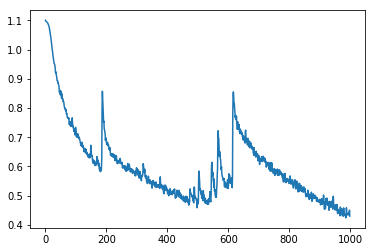

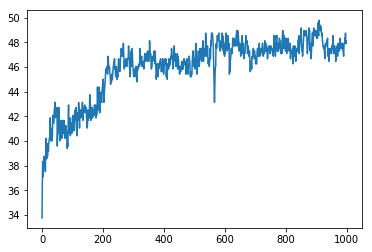

In [9]:
plt.plot(epoch_losses)
plt.show()
plt.plot(epoch_accuracies)
plt.show()

In [10]:
max(epoch_accuracies)

49.791666666666664

## Save model 

In [11]:
torch.save(model.state_dict(), "passive_mass_model.pt")

## Load model and evaluate

In [12]:
model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model.load_state_dict(torch.load("passive_mass_model.pt"))
model.eval()
model = model.cuda()

In [13]:
accuracy, predicted = evaluate(model, val_loader, return_predicted=True)

In [14]:
print(accuracy)

47.916666666666664


In [15]:
predicted = [pred.cpu() for pred in predicted]
Y_val = np.concatenate([y.cpu().numpy() for x, y in val_loader])

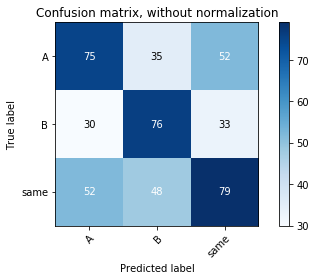

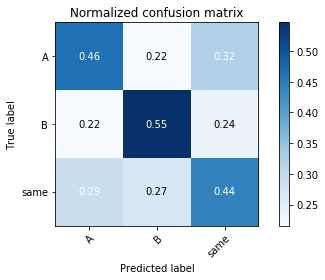

In [16]:
plot_confusion_matrix(Y_val, predicted, classes=MASS_CLASS_COLS, normalize=False)
plot_confusion_matrix(Y_val, predicted, classes=MASS_CLASS_COLS, normalize=True)

# FORCE TRAINING (50%)

## Read dataset and preprocess it

In [17]:
all_trials = read_dataset("passive_trials.h5")
train_loader, val_loader = prepare_dataset(all_trials, FORCE_CLASS_COLS, normalise=True, batch_size=128, test_size=0.3)

In [18]:
Y = []
for x,y in train_loader:
    
    Y.extend(list(y))

np.unique(Y, return_counts=True)

(array([tensor(0, device='cuda:0'), tensor(1, device='cuda:0'),
        tensor(2, device='cuda:0')], dtype=object), array([393, 376, 351]))

## Define model, loss and optimizer

In [19]:
np.random.seed(62)
torch.manual_seed(72)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

input_dim = len(BASIC_TRAINING_COLS)    # input dimension
first_hidden_dim = 12  # hidden layer dimension
second_hidden_dim = 6     # number of hidden layers
output_dim = 3   # output dimension

model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model = model.cuda()

error = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
model.train()

ComplexRNNModel(
  (lstm): LSTM(16, 12, batch_first=True)
  (dropout): Dropout(p=0.25)
  (lstm_2): LSTM(12, 6, batch_first=True)
  (fc): Linear(in_features=6, out_features=3, bias=True)
)

## Train model and plot loss and accuracy

In [21]:
epoch_losses, epoch_accuracies = training_loop(model, optimizer, error, train_loader, val_loader, num_epochs=1000)

  0%|          | 1/1000 [00:01<20:36,  1.24s/it]

1.1147649817996554 34.166666666666664


  0%|          | 2/1000 [00:02<20:02,  1.21s/it]

1.1100632747014363 34.583333333333336


  0%|          | 3/1000 [00:03<19:36,  1.18s/it]

1.1063689258363512 34.375


  0%|          | 4/1000 [00:04<19:25,  1.17s/it]

1.103172289000617 34.375


  0%|          | 5/1000 [00:05<19:15,  1.16s/it]

1.1006716754701402 35.0


  1%|          | 6/1000 [00:06<19:17,  1.16s/it]

1.0970322953330145 35.0


  1%|          | 7/1000 [00:08<19:05,  1.15s/it]

1.09341381655799 35.208333333333336


  1%|          | 8/1000 [00:09<19:04,  1.15s/it]

1.0912335448794894 35.0


  1%|          | 9/1000 [00:10<19:02,  1.15s/it]

1.0879655679066975 35.625


  1%|          | 10/1000 [00:11<19:06,  1.16s/it]

1.0849478377236261 38.75


  1%|          | 11/1000 [00:12<18:53,  1.15s/it]

1.0812311040030584 39.583333333333336


  1%|          | 12/1000 [00:13<18:38,  1.13s/it]

1.0770965814590454 38.75


  1%|▏         | 13/1000 [00:14<18:30,  1.12s/it]

1.0730395052168105 40.0


  1%|▏         | 14/1000 [00:16<18:39,  1.14s/it]

1.066409362687005 40.625


  2%|▏         | 15/1000 [00:17<18:42,  1.14s/it]

1.061205267906189 41.458333333333336


  2%|▏         | 16/1000 [00:18<18:44,  1.14s/it]

1.0536883274714153 42.083333333333336


  2%|▏         | 17/1000 [00:19<18:40,  1.14s/it]

1.041631778081258 42.916666666666664


  2%|▏         | 18/1000 [00:20<18:48,  1.15s/it]

1.0308663182788425 43.125


  2%|▏         | 19/1000 [00:21<18:39,  1.14s/it]

1.0202743013699849 43.75


  2%|▏         | 20/1000 [00:22<18:49,  1.15s/it]

1.0064678523275588 44.375


  2%|▏         | 21/1000 [00:24<18:42,  1.15s/it]

0.9933758113119338 43.541666666666664


  2%|▏         | 22/1000 [00:25<18:34,  1.14s/it]

0.9747901691330804 43.75


  2%|▏         | 23/1000 [00:26<18:43,  1.15s/it]

0.9601196381780837 43.75


  2%|▏         | 24/1000 [00:27<18:42,  1.15s/it]

0.9434327814314101 44.791666666666664


  2%|▎         | 25/1000 [00:28<18:41,  1.15s/it]

0.9325746893882751 45.833333333333336


  3%|▎         | 26/1000 [00:29<18:38,  1.15s/it]

0.9165318409601847 47.291666666666664


  3%|▎         | 27/1000 [00:30<18:40,  1.15s/it]

0.9087045391400655 48.125


  3%|▎         | 28/1000 [00:32<18:42,  1.15s/it]

0.8944999178250631 47.291666666666664


  3%|▎         | 29/1000 [00:33<18:30,  1.14s/it]

0.8807271917661031 48.958333333333336


  3%|▎         | 30/1000 [00:34<18:41,  1.16s/it]

0.8742849893040128 50.208333333333336


  3%|▎         | 31/1000 [00:35<18:41,  1.16s/it]

0.8623648815684848 51.25


  3%|▎         | 32/1000 [00:36<18:38,  1.16s/it]

0.856732620133294 51.041666666666664


  3%|▎         | 33/1000 [00:37<18:25,  1.14s/it]

0.8482429915004306 50.833333333333336


  3%|▎         | 34/1000 [00:38<18:17,  1.14s/it]

0.8418842554092407 50.416666666666664


  4%|▎         | 35/1000 [00:40<18:22,  1.14s/it]

0.8341890441046821 50.416666666666664


  4%|▎         | 36/1000 [00:41<18:17,  1.14s/it]

0.8252058095402188 50.625


  4%|▎         | 37/1000 [00:42<18:12,  1.13s/it]

0.8183104130956862 50.208333333333336


  4%|▍         | 38/1000 [00:43<18:14,  1.14s/it]

0.8174276881747775 49.583333333333336


  4%|▍         | 39/1000 [00:44<18:07,  1.13s/it]

0.8067518870035807 50.833333333333336


  4%|▍         | 40/1000 [00:45<17:59,  1.12s/it]

0.7986413836479187 50.208333333333336


  4%|▍         | 41/1000 [00:46<18:02,  1.13s/it]

0.7920550637774997 50.208333333333336


  4%|▍         | 42/1000 [00:48<18:07,  1.13s/it]

0.7922215594185723 51.25


  4%|▍         | 43/1000 [00:49<17:59,  1.13s/it]

0.7851225799984403 50.625


  4%|▍         | 44/1000 [00:50<17:57,  1.13s/it]

0.7858010795381334 50.625


  4%|▍         | 45/1000 [00:51<18:06,  1.14s/it]

0.7830218142933316 50.208333333333336


  5%|▍         | 46/1000 [00:52<18:01,  1.13s/it]

0.7795491019884745 51.041666666666664


  5%|▍         | 47/1000 [00:53<18:03,  1.14s/it]

0.7779928379588656 50.416666666666664


  5%|▍         | 48/1000 [00:54<17:58,  1.13s/it]

0.7668505642149184 51.458333333333336


  5%|▍         | 49/1000 [00:55<17:47,  1.12s/it]

0.7695782913102044 52.5


  5%|▌         | 50/1000 [00:57<17:43,  1.12s/it]

0.7601280543539259 51.875


  5%|▌         | 51/1000 [00:58<17:41,  1.12s/it]

0.7543469799889458 51.875


  5%|▌         | 52/1000 [00:59<17:33,  1.11s/it]

0.7496333122253418 51.666666666666664


  5%|▌         | 53/1000 [01:00<17:30,  1.11s/it]

0.7492687371042039 52.083333333333336


  5%|▌         | 54/1000 [01:01<17:28,  1.11s/it]

0.7494889365302192 52.083333333333336


  6%|▌         | 55/1000 [01:02<17:34,  1.12s/it]

0.7443875670433044 51.041666666666664


  6%|▌         | 56/1000 [01:03<17:42,  1.13s/it]

0.7505816486146715 51.041666666666664


  6%|▌         | 57/1000 [01:04<17:41,  1.13s/it]

0.750938249958886 51.25


  6%|▌         | 58/1000 [01:06<17:48,  1.13s/it]

0.7480920884344313 50.833333333333336


  6%|▌         | 59/1000 [01:07<17:42,  1.13s/it]

0.7488974332809448 51.25


  6%|▌         | 60/1000 [01:08<17:34,  1.12s/it]

0.7410924567116631 51.666666666666664


  6%|▌         | 61/1000 [01:09<17:27,  1.12s/it]

0.7325427929560343 52.083333333333336


  6%|▌         | 62/1000 [01:10<17:23,  1.11s/it]

0.732166588306427 51.666666666666664


  6%|▋         | 63/1000 [01:11<17:31,  1.12s/it]

0.7345225943459405 51.875


  6%|▋         | 64/1000 [01:12<17:27,  1.12s/it]

0.7293622626198663 52.083333333333336


  6%|▋         | 65/1000 [01:13<17:22,  1.12s/it]

0.7316574917899238 50.625


  7%|▋         | 66/1000 [01:14<17:24,  1.12s/it]

0.7643704679277208 50.416666666666664


  7%|▋         | 67/1000 [01:16<17:15,  1.11s/it]

0.7523343563079834 51.041666666666664


  7%|▋         | 68/1000 [01:17<17:14,  1.11s/it]

0.74765588177575 51.25


  7%|▋         | 69/1000 [01:18<17:12,  1.11s/it]

0.736206160651313 52.083333333333336


  7%|▋         | 70/1000 [01:19<17:10,  1.11s/it]

0.730471326245202 52.291666666666664


  7%|▋         | 71/1000 [01:20<17:07,  1.11s/it]

0.7231123579872979 52.083333333333336


  7%|▋         | 72/1000 [01:21<17:06,  1.11s/it]

0.726715452141232 51.875


  7%|▋         | 73/1000 [01:22<17:10,  1.11s/it]

0.7189871138996549 51.25


  7%|▋         | 74/1000 [01:23<17:20,  1.12s/it]

0.7232498659027947 52.083333333333336


  8%|▊         | 75/1000 [01:25<17:25,  1.13s/it]

0.7128380470805697 52.5


  8%|▊         | 76/1000 [01:26<17:28,  1.13s/it]

0.7087518705262078 52.083333333333336


  8%|▊         | 77/1000 [01:27<17:19,  1.13s/it]

0.7163715428776212 52.291666666666664


  8%|▊         | 78/1000 [01:28<17:20,  1.13s/it]

0.7080748081207275 52.5


  8%|▊         | 79/1000 [01:29<17:26,  1.14s/it]

0.6961697869830661 52.291666666666664


  8%|▊         | 80/1000 [01:30<17:21,  1.13s/it]

0.7013047801123725 51.875


  8%|▊         | 81/1000 [01:31<17:18,  1.13s/it]

0.7026743491490682 52.083333333333336


  8%|▊         | 82/1000 [01:32<17:19,  1.13s/it]

0.7016144394874573 52.083333333333336


  8%|▊         | 83/1000 [01:34<17:15,  1.13s/it]

0.6945368713802762 51.875


  8%|▊         | 84/1000 [01:35<17:15,  1.13s/it]

0.6961620383792453 52.291666666666664


  8%|▊         | 85/1000 [01:36<17:19,  1.14s/it]

0.6913179092937045 52.083333333333336


  9%|▊         | 86/1000 [01:37<17:12,  1.13s/it]

0.6817854046821594 52.291666666666664


  9%|▊         | 87/1000 [01:38<17:08,  1.13s/it]

0.688262422879537 52.291666666666664


  9%|▉         | 88/1000 [01:39<17:04,  1.12s/it]

0.7129616406228807 52.083333333333336


  9%|▉         | 89/1000 [01:40<17:04,  1.12s/it]

0.7021684779061211 50.833333333333336


  9%|▉         | 90/1000 [01:41<17:06,  1.13s/it]

0.7003484235869514 50.625


  9%|▉         | 91/1000 [01:43<17:09,  1.13s/it]

0.6920409070120918 50.625


  9%|▉         | 92/1000 [01:44<17:06,  1.13s/it]

0.6842804948488871 50.833333333333336


  9%|▉         | 93/1000 [01:45<17:09,  1.14s/it]

0.6778588824801974 51.041666666666664


  9%|▉         | 94/1000 [01:46<17:11,  1.14s/it]

0.6692200038168166 51.875


 10%|▉         | 95/1000 [01:47<17:14,  1.14s/it]

0.6801338063346015 52.291666666666664


 10%|▉         | 96/1000 [01:48<17:15,  1.15s/it]

0.6712325016657511 52.708333333333336


 10%|▉         | 97/1000 [01:49<17:12,  1.14s/it]

0.6722168591287401 51.875


 10%|▉         | 98/1000 [01:51<17:08,  1.14s/it]

0.6783866021368239 51.458333333333336


 10%|▉         | 99/1000 [01:52<17:17,  1.15s/it]

0.6667295959260728 52.083333333333336


 10%|█         | 100/1000 [01:53<17:13,  1.15s/it]

0.669300205177731 52.916666666666664


 10%|█         | 101/1000 [01:54<17:14,  1.15s/it]

0.670117199420929 53.125


 10%|█         | 102/1000 [01:55<17:08,  1.14s/it]

0.6585440701908536 52.916666666666664


 10%|█         | 103/1000 [01:56<17:04,  1.14s/it]

0.6644666526052687 53.333333333333336


 10%|█         | 104/1000 [01:57<17:05,  1.14s/it]

0.6511533591482375 53.333333333333336


 10%|█         | 105/1000 [01:59<16:55,  1.13s/it]

0.6643016934394836 52.5


 11%|█         | 106/1000 [02:00<16:51,  1.13s/it]

0.6661727163526747 52.5


 11%|█         | 107/1000 [02:01<16:56,  1.14s/it]

0.6500272022353278 51.25


 11%|█         | 108/1000 [02:02<16:58,  1.14s/it]

0.6659195886717902 51.666666666666664


 11%|█         | 109/1000 [02:03<16:53,  1.14s/it]

0.6668842103746202 51.041666666666664


 11%|█         | 110/1000 [02:04<16:47,  1.13s/it]

0.6775093211068047 51.666666666666664


 11%|█         | 111/1000 [02:05<16:55,  1.14s/it]

0.6663529276847839 51.875


 11%|█         | 112/1000 [02:07<16:46,  1.13s/it]

0.6661891473664178 51.041666666666664


 11%|█▏        | 113/1000 [02:08<16:43,  1.13s/it]

0.6670361426141527 51.25


 11%|█▏        | 114/1000 [02:09<16:49,  1.14s/it]

0.6628546383645799 50.416666666666664


 12%|█▏        | 115/1000 [02:10<16:46,  1.14s/it]

0.6554344892501831 50.833333333333336


 12%|█▏        | 116/1000 [02:11<16:52,  1.15s/it]

0.6462604469723172 50.416666666666664


 12%|█▏        | 117/1000 [02:12<16:50,  1.14s/it]

0.6516856220033433 51.875


 12%|█▏        | 118/1000 [02:13<16:51,  1.15s/it]

0.6469310786989 50.833333333333336


 12%|█▏        | 119/1000 [02:15<16:48,  1.15s/it]

0.6459657814767625 52.291666666666664


 12%|█▏        | 120/1000 [02:16<16:48,  1.15s/it]

0.6341655453046163 51.875


 12%|█▏        | 121/1000 [02:17<16:51,  1.15s/it]

0.6362395485242208 52.083333333333336


 12%|█▏        | 122/1000 [02:18<16:52,  1.15s/it]

0.6383868720796373 51.875


 12%|█▏        | 123/1000 [02:19<16:46,  1.15s/it]

0.638790123992496 51.25


 12%|█▏        | 124/1000 [02:20<16:55,  1.16s/it]

0.6355361209975349 51.666666666666664


 12%|█▎        | 125/1000 [02:21<16:46,  1.15s/it]

0.6287021173371209 50.833333333333336


 13%|█▎        | 126/1000 [02:23<16:43,  1.15s/it]

0.6401457455423143 51.875


 13%|█▎        | 127/1000 [02:24<16:40,  1.15s/it]

0.6319652332199944 51.666666666666664


 13%|█▎        | 128/1000 [02:25<16:42,  1.15s/it]

0.6306056049134996 51.25


 13%|█▎        | 129/1000 [02:26<16:43,  1.15s/it]

0.6399650772412618 50.833333333333336


 13%|█▎        | 130/1000 [02:27<16:41,  1.15s/it]

0.6680299441019694 52.291666666666664


 13%|█▎        | 131/1000 [02:28<16:37,  1.15s/it]

0.6526871389812894 51.875


 13%|█▎        | 132/1000 [02:30<16:31,  1.14s/it]

0.6266108817524381 51.458333333333336


 13%|█▎        | 133/1000 [02:31<16:36,  1.15s/it]

0.6318294935756259 51.875


 13%|█▎        | 134/1000 [02:32<16:31,  1.15s/it]

0.6502086056603326 50.625


 14%|█▎        | 135/1000 [02:33<16:31,  1.15s/it]

0.6541386710272895 51.875


 14%|█▎        | 136/1000 [02:34<16:32,  1.15s/it]

0.6504379378424751 50.625


 14%|█▎        | 137/1000 [02:35<16:27,  1.14s/it]

0.635762996143765 51.25


 14%|█▍        | 138/1000 [02:36<16:33,  1.15s/it]

0.6417120827568902 51.25


 14%|█▍        | 139/1000 [02:38<16:27,  1.15s/it]

0.6319195826848348 51.041666666666664


 14%|█▍        | 140/1000 [02:39<16:21,  1.14s/it]

0.6444302399953207 50.0


 14%|█▍        | 141/1000 [02:40<16:26,  1.15s/it]

0.642898248301612 49.791666666666664


 14%|█▍        | 142/1000 [02:41<16:21,  1.14s/it]

0.6373839908175998 50.208333333333336


 14%|█▍        | 143/1000 [02:42<16:16,  1.14s/it]

0.629259102874332 50.0


 14%|█▍        | 144/1000 [02:43<16:19,  1.14s/it]

0.6302866869502597 50.208333333333336


 14%|█▍        | 145/1000 [02:44<16:16,  1.14s/it]

0.6243064535988702 50.208333333333336


 15%|█▍        | 146/1000 [02:46<16:09,  1.14s/it]

0.6176059444745382 50.0


 15%|█▍        | 147/1000 [02:47<16:15,  1.14s/it]

0.6255371636814542 51.041666666666664


 15%|█▍        | 148/1000 [02:48<16:14,  1.14s/it]

0.6166175471411811 52.291666666666664


 15%|█▍        | 149/1000 [02:49<16:12,  1.14s/it]

0.6167071329222785 51.875


 15%|█▌        | 150/1000 [02:50<16:05,  1.14s/it]

0.6211374269591438 51.458333333333336


 15%|█▌        | 151/1000 [02:51<16:03,  1.13s/it]

0.6348866489198473 50.0


 15%|█▌        | 152/1000 [02:52<16:04,  1.14s/it]

0.6911287638876173 49.791666666666664


 15%|█▌        | 153/1000 [02:54<16:08,  1.14s/it]

0.6846401823891534 50.0


 15%|█▌        | 154/1000 [02:55<16:05,  1.14s/it]

0.6613441771931119 49.166666666666664


 16%|█▌        | 155/1000 [02:56<16:00,  1.14s/it]

0.6766092777252197 50.416666666666664


 16%|█▌        | 156/1000 [02:57<16:06,  1.15s/it]

0.6715302268664042 51.25


 16%|█▌        | 157/1000 [02:58<16:00,  1.14s/it]

0.6718539595603943 50.625


 16%|█▌        | 158/1000 [02:59<16:05,  1.15s/it]

0.6477668417824639 50.208333333333336


 16%|█▌        | 159/1000 [03:00<15:57,  1.14s/it]

0.6484740244017707 50.208333333333336


 16%|█▌        | 160/1000 [03:01<15:52,  1.13s/it]

0.6539657976892259 50.208333333333336


 16%|█▌        | 161/1000 [03:03<15:47,  1.13s/it]

0.6440571082962884 51.25


 16%|█▌        | 162/1000 [03:04<15:41,  1.12s/it]

0.6443180176946852 51.458333333333336


 16%|█▋        | 163/1000 [03:05<15:51,  1.14s/it]

0.6235150959756639 51.666666666666664


 16%|█▋        | 164/1000 [03:06<15:54,  1.14s/it]

0.6344431837399801 51.458333333333336


 16%|█▋        | 165/1000 [03:07<15:59,  1.15s/it]

0.62796417872111 51.458333333333336


 17%|█▋        | 166/1000 [03:08<15:51,  1.14s/it]

0.6251576807763841 51.458333333333336


 17%|█▋        | 167/1000 [03:09<15:49,  1.14s/it]

0.6298926538891263 51.25


 17%|█▋        | 168/1000 [03:11<15:49,  1.14s/it]

0.6112580365604825 51.666666666666664


 17%|█▋        | 169/1000 [03:12<15:48,  1.14s/it]

0.6219381623797946 51.25


 17%|█▋        | 170/1000 [03:13<15:41,  1.13s/it]

0.6149575975206163 50.625


 17%|█▋        | 171/1000 [03:14<15:42,  1.14s/it]

0.6120098564359877 50.625


 17%|█▋        | 172/1000 [03:15<15:46,  1.14s/it]

0.6129452983538309 50.416666666666664


 17%|█▋        | 173/1000 [03:16<15:35,  1.13s/it]

0.6000529527664185 50.625


 17%|█▋        | 174/1000 [03:17<15:30,  1.13s/it]

0.6193717850579156 51.041666666666664


 18%|█▊        | 175/1000 [03:18<15:26,  1.12s/it]

0.6050048900975121 51.458333333333336


 18%|█▊        | 176/1000 [03:20<15:33,  1.13s/it]

0.6038476427396139 51.666666666666664


 18%|█▊        | 177/1000 [03:21<15:35,  1.14s/it]

0.6053165793418884 51.875


 18%|█▊        | 178/1000 [03:22<15:45,  1.15s/it]

0.6055978536605835 51.25


 18%|█▊        | 179/1000 [03:23<15:50,  1.16s/it]

0.6085200177298652 50.625


 18%|█▊        | 180/1000 [03:24<15:39,  1.15s/it]

0.6056315203507742 49.791666666666664


 18%|█▊        | 181/1000 [03:25<15:30,  1.14s/it]

0.5956088701883951 50.625


 18%|█▊        | 182/1000 [03:27<15:28,  1.13s/it]

0.6011304789119296 49.791666666666664


 18%|█▊        | 183/1000 [03:28<15:30,  1.14s/it]

0.6066853867636787 50.833333333333336


 18%|█▊        | 184/1000 [03:29<15:22,  1.13s/it]

0.6168924901220534 51.666666666666664


 18%|█▊        | 185/1000 [03:30<15:29,  1.14s/it]

0.6130002670817905 51.041666666666664


 19%|█▊        | 186/1000 [03:31<15:35,  1.15s/it]

0.6041261023945279 51.458333333333336


 19%|█▊        | 187/1000 [03:32<15:32,  1.15s/it]

0.5861764980687035 51.041666666666664


 19%|█▉        | 188/1000 [03:33<15:30,  1.15s/it]

0.5984367032845815 51.041666666666664


 19%|█▉        | 189/1000 [03:35<15:28,  1.15s/it]

0.599199566576216 50.416666666666664


 19%|█▉        | 190/1000 [03:36<15:27,  1.15s/it]

0.6012456582652198 51.875


 19%|█▉        | 191/1000 [03:37<15:26,  1.15s/it]

0.5933503044976128 52.083333333333336


 19%|█▉        | 192/1000 [03:38<15:23,  1.14s/it]

0.5934533145692613 52.083333333333336


 19%|█▉        | 193/1000 [03:39<15:17,  1.14s/it]

0.593965619802475 51.25


 19%|█▉        | 194/1000 [03:40<15:11,  1.13s/it]

0.6011356810728709 51.25


 20%|█▉        | 195/1000 [03:41<15:10,  1.13s/it]

0.5855995780891843 50.833333333333336


 20%|█▉        | 196/1000 [03:42<15:10,  1.13s/it]

0.5807734496063657 50.833333333333336


 20%|█▉        | 197/1000 [03:44<15:03,  1.13s/it]

0.5942076146602631 51.041666666666664


 20%|█▉        | 198/1000 [03:45<15:01,  1.12s/it]

0.5779956777890524 50.416666666666664


 20%|█▉        | 199/1000 [03:46<15:09,  1.14s/it]

0.570193479458491 50.416666666666664


 20%|██        | 200/1000 [03:47<15:01,  1.13s/it]

0.5734684136178758 49.791666666666664


 20%|██        | 201/1000 [03:48<14:58,  1.12s/it]

0.5743880305025313 49.375


 20%|██        | 202/1000 [03:49<15:01,  1.13s/it]

0.5815354751216041 49.583333333333336


 20%|██        | 203/1000 [03:50<15:03,  1.13s/it]

0.5736599299642775 49.583333333333336


 20%|██        | 204/1000 [03:52<15:12,  1.15s/it]

0.5787178642219968 50.208333333333336


 20%|██        | 205/1000 [03:53<15:06,  1.14s/it]

0.5775032175911797 51.25


 21%|██        | 206/1000 [03:54<15:00,  1.13s/it]

0.5765600370036231 50.625


 21%|██        | 207/1000 [03:55<14:59,  1.13s/it]

0.5620245337486267 50.833333333333336


 21%|██        | 208/1000 [03:56<14:59,  1.14s/it]

0.5650019182099236 50.625


 21%|██        | 209/1000 [03:57<14:56,  1.13s/it]

0.5726834138234457 50.625


 21%|██        | 210/1000 [03:58<14:56,  1.14s/it]

0.5681857135560777 52.083333333333336


 21%|██        | 211/1000 [03:59<14:54,  1.13s/it]

0.5774986180994246 52.5


 21%|██        | 212/1000 [04:01<15:02,  1.15s/it]

0.5662490063243442 51.875


 21%|██▏       | 213/1000 [04:02<14:54,  1.14s/it]

0.5559299952454038 51.666666666666664


 21%|██▏       | 214/1000 [04:03<14:53,  1.14s/it]

0.6658753156661987 47.708333333333336


 22%|██▏       | 215/1000 [04:04<14:49,  1.13s/it]

0.8370860285229154 46.458333333333336


 22%|██▏       | 216/1000 [04:05<14:54,  1.14s/it]

0.8898811936378479 46.458333333333336


 22%|██▏       | 217/1000 [04:06<14:48,  1.13s/it]

0.8249460856119791 47.5


 22%|██▏       | 218/1000 [04:07<14:50,  1.14s/it]

0.779764884048038 47.083333333333336


 22%|██▏       | 219/1000 [04:09<14:48,  1.14s/it]

0.7691881193055047 47.083333333333336


 22%|██▏       | 220/1000 [04:10<14:43,  1.13s/it]

0.7407713731129965 46.875


 22%|██▏       | 221/1000 [04:11<14:46,  1.14s/it]

0.7358826398849487 47.291666666666664


 22%|██▏       | 222/1000 [04:12<14:43,  1.14s/it]

0.7184030479855008 46.875


 22%|██▏       | 223/1000 [04:13<14:45,  1.14s/it]

0.7246918280919393 47.5


 22%|██▏       | 224/1000 [04:14<14:40,  1.14s/it]

0.7132028606202867 47.291666666666664


 22%|██▎       | 225/1000 [04:15<14:37,  1.13s/it]

0.7112091448571947 47.5


 23%|██▎       | 226/1000 [04:16<14:31,  1.13s/it]

0.7041891482141283 46.666666666666664


 23%|██▎       | 227/1000 [04:18<14:29,  1.12s/it]

0.6917164325714111 47.5


 23%|██▎       | 228/1000 [04:19<14:34,  1.13s/it]

0.6993546022309197 48.125


 23%|██▎       | 229/1000 [04:20<14:33,  1.13s/it]

0.6833582454257541 47.5


 23%|██▎       | 230/1000 [04:21<14:32,  1.13s/it]

0.672363645500607 47.708333333333336


 23%|██▎       | 231/1000 [04:22<14:29,  1.13s/it]

0.6737751563390096 47.291666666666664


 23%|██▎       | 232/1000 [04:23<14:27,  1.13s/it]

0.6751787132687039 47.291666666666664


 23%|██▎       | 233/1000 [04:24<14:34,  1.14s/it]

0.6702143748601278 47.708333333333336


 23%|██▎       | 234/1000 [04:26<14:35,  1.14s/it]

0.6581113669607375 48.125


 24%|██▎       | 235/1000 [04:27<14:32,  1.14s/it]

0.6530021826426188 47.708333333333336


 24%|██▎       | 236/1000 [04:28<14:30,  1.14s/it]

0.6471697092056274 46.875


 24%|██▎       | 237/1000 [04:29<14:21,  1.13s/it]

0.6484235988722907 46.666666666666664


 24%|██▍       | 238/1000 [04:30<14:15,  1.12s/it]

0.6549509498808119 47.5


 24%|██▍       | 239/1000 [04:31<14:13,  1.12s/it]

0.6476634608374702 46.875


 24%|██▍       | 240/1000 [04:32<14:16,  1.13s/it]

0.6500016450881958 47.291666666666664


 24%|██▍       | 241/1000 [04:33<14:14,  1.13s/it]

0.644883049858941 47.291666666666664


 24%|██▍       | 242/1000 [04:35<14:10,  1.12s/it]

0.6403066317240397 47.916666666666664


 24%|██▍       | 243/1000 [04:36<14:08,  1.12s/it]

0.6442619694603814 48.125


 24%|██▍       | 244/1000 [04:37<14:02,  1.11s/it]

0.6283455755975511 48.75


 24%|██▍       | 245/1000 [04:38<14:03,  1.12s/it]

0.6190284060107337 48.125


 25%|██▍       | 246/1000 [04:39<14:08,  1.13s/it]

0.6355588204330869 47.708333333333336


 25%|██▍       | 247/1000 [04:40<14:13,  1.13s/it]

0.628817598025004 47.708333333333336


 25%|██▍       | 248/1000 [04:41<14:14,  1.14s/it]

0.6358584695392184 47.708333333333336


 25%|██▍       | 249/1000 [04:42<14:15,  1.14s/it]

0.6327449083328247 47.708333333333336


 25%|██▌       | 250/1000 [04:44<14:15,  1.14s/it]

0.6275283462471433 47.291666666666664


 25%|██▌       | 251/1000 [04:45<14:28,  1.16s/it]

0.6241276330418057 47.291666666666664


 25%|██▌       | 252/1000 [04:46<14:52,  1.19s/it]

0.6292151345147027 46.666666666666664


 25%|██▌       | 253/1000 [04:47<14:32,  1.17s/it]

0.6258101463317871 46.875


 25%|██▌       | 254/1000 [04:48<14:19,  1.15s/it]

0.6171702775690291 47.083333333333336


 26%|██▌       | 255/1000 [04:50<14:37,  1.18s/it]

0.6193069517612457 47.708333333333336


 26%|██▌       | 256/1000 [04:51<14:25,  1.16s/it]

0.5992874436908298 48.75


 26%|██▌       | 257/1000 [04:52<14:13,  1.15s/it]

0.6144240995248159 48.75


 26%|██▌       | 258/1000 [04:53<14:13,  1.15s/it]

0.6042698853545718 48.958333333333336


 26%|██▌       | 259/1000 [04:54<15:01,  1.22s/it]

0.6142214271757338 47.708333333333336


 26%|██▌       | 260/1000 [04:56<15:27,  1.25s/it]

0.6050673557652367 47.291666666666664


 26%|██▌       | 261/1000 [04:57<15:20,  1.25s/it]

0.6045825448301103 47.916666666666664


 26%|██▌       | 262/1000 [04:58<15:25,  1.25s/it]

0.6088009079297384 47.708333333333336


 26%|██▋       | 263/1000 [04:59<15:31,  1.26s/it]

0.6011409925089942 47.5


 26%|██▋       | 264/1000 [05:01<15:41,  1.28s/it]

0.6077254547013177 47.5


 26%|██▋       | 265/1000 [05:02<15:18,  1.25s/it]

0.5829068687227037 48.125


 27%|██▋       | 266/1000 [05:03<15:23,  1.26s/it]

0.5899915198485056 48.125


 27%|██▋       | 267/1000 [05:04<15:03,  1.23s/it]

0.5909807085990906 47.708333333333336


 27%|██▋       | 268/1000 [05:06<15:28,  1.27s/it]

0.5849944982263777 47.708333333333336


 27%|██▋       | 269/1000 [05:07<15:31,  1.27s/it]

0.584785133600235 47.916666666666664


 27%|██▋       | 270/1000 [05:08<15:32,  1.28s/it]

0.6004367536968656 47.916666666666664


 27%|██▋       | 271/1000 [05:10<15:24,  1.27s/it]

0.5786052511798011 48.541666666666664


 27%|██▋       | 272/1000 [05:11<15:02,  1.24s/it]

0.5876369575659434 48.75


 27%|██▋       | 273/1000 [05:12<14:31,  1.20s/it]

0.5859774318006303 48.333333333333336


 27%|██▋       | 274/1000 [05:13<14:15,  1.18s/it]

0.5923083424568176 48.125


 28%|██▊       | 275/1000 [05:14<13:47,  1.14s/it]

0.5898222029209137 48.125


 28%|██▊       | 276/1000 [05:15<13:31,  1.12s/it]

0.5849263336923387 47.708333333333336


 28%|██▊       | 277/1000 [05:16<13:30,  1.12s/it]

0.5883474250634512 48.333333333333336


 28%|██▊       | 278/1000 [05:17<13:29,  1.12s/it]

0.5865927702850766 47.916666666666664


 28%|██▊       | 279/1000 [05:18<13:26,  1.12s/it]

0.5858984258439806 47.5


 28%|██▊       | 280/1000 [05:20<13:28,  1.12s/it]

0.5876184602578481 47.916666666666664


 28%|██▊       | 281/1000 [05:21<13:25,  1.12s/it]

0.576616108417511 48.333333333333336


 28%|██▊       | 282/1000 [05:22<13:27,  1.13s/it]

0.5762428773774041 48.958333333333336


 28%|██▊       | 283/1000 [05:23<13:27,  1.13s/it]

0.5784613523218367 48.75


 28%|██▊       | 284/1000 [05:24<13:26,  1.13s/it]

0.5799723664919535 48.333333333333336


 28%|██▊       | 285/1000 [05:25<13:23,  1.12s/it]

0.577547980679406 48.75


 29%|██▊       | 286/1000 [05:26<13:17,  1.12s/it]

0.5691375931104025 48.333333333333336


 29%|██▊       | 287/1000 [05:27<13:18,  1.12s/it]

0.5747073590755463 47.916666666666664


 29%|██▉       | 288/1000 [05:29<13:13,  1.11s/it]

0.5704028771983253 48.125


 29%|██▉       | 289/1000 [05:30<13:10,  1.11s/it]

0.5775732331805759 48.333333333333336


 29%|██▉       | 290/1000 [05:31<13:08,  1.11s/it]

0.5705337756209903 47.916666666666664


 29%|██▉       | 291/1000 [05:32<13:03,  1.11s/it]

0.5714361833201514 47.708333333333336


 29%|██▉       | 292/1000 [05:33<13:04,  1.11s/it]

0.5621929433610704 47.916666666666664


 29%|██▉       | 293/1000 [05:34<13:03,  1.11s/it]

0.5716534157594045 47.916666666666664


 29%|██▉       | 294/1000 [05:35<13:01,  1.11s/it]

0.5779809355735779 47.708333333333336


 30%|██▉       | 295/1000 [05:36<13:06,  1.11s/it]

0.5779634316762289 48.541666666666664


 30%|██▉       | 296/1000 [05:37<13:04,  1.11s/it]

0.5777486264705658 48.541666666666664


 30%|██▉       | 297/1000 [05:39<13:02,  1.11s/it]

0.5702684157424502 48.75


 30%|██▉       | 298/1000 [05:40<13:02,  1.11s/it]

0.5823665857315063 48.333333333333336


 30%|██▉       | 299/1000 [05:41<13:01,  1.12s/it]

0.5680823292997148 48.541666666666664


 30%|███       | 300/1000 [05:42<12:58,  1.11s/it]

0.5656803482108645 48.958333333333336


 30%|███       | 301/1000 [05:43<12:55,  1.11s/it]

0.587715357542038 48.75


 30%|███       | 302/1000 [05:44<12:55,  1.11s/it]

0.5691103438536326 49.375


 30%|███       | 303/1000 [05:45<12:51,  1.11s/it]

0.574041571882036 48.75


 30%|███       | 304/1000 [05:46<12:49,  1.11s/it]

0.5914280480808682 49.166666666666664


 30%|███       | 305/1000 [05:47<12:52,  1.11s/it]

0.575994203488032 49.583333333333336


 31%|███       | 306/1000 [05:49<12:53,  1.11s/it]

0.5779267052809397 49.583333333333336


 31%|███       | 307/1000 [05:50<12:52,  1.11s/it]

0.5649693111578623 49.166666666666664


 31%|███       | 308/1000 [05:51<12:51,  1.11s/it]

0.5673554639021555 49.375


 31%|███       | 309/1000 [05:52<12:49,  1.11s/it]

0.5694135758611891 48.75


 31%|███       | 310/1000 [05:53<12:49,  1.12s/it]

0.5700019730461968 48.541666666666664


 31%|███       | 311/1000 [05:54<12:49,  1.12s/it]

0.5647217432657877 48.958333333333336


 31%|███       | 312/1000 [05:55<12:44,  1.11s/it]

0.563702619738049 49.583333333333336


 31%|███▏      | 313/1000 [05:56<12:44,  1.11s/it]

0.5673457682132721 48.958333333333336


 31%|███▏      | 314/1000 [05:57<12:44,  1.11s/it]

0.5697647896077898 49.375


 32%|███▏      | 315/1000 [05:59<12:46,  1.12s/it]

0.5591077970133888 49.166666666666664


 32%|███▏      | 316/1000 [06:00<12:51,  1.13s/it]

0.5561359193589952 49.583333333333336


 32%|███▏      | 317/1000 [06:01<12:46,  1.12s/it]

0.5654266178607941 49.791666666666664


 32%|███▏      | 318/1000 [06:02<12:44,  1.12s/it]

0.5517818497286903 48.75


 32%|███▏      | 319/1000 [06:03<12:42,  1.12s/it]

0.5480759839216868 48.125


 32%|███▏      | 320/1000 [06:04<12:41,  1.12s/it]

0.5846007863680521 48.125


 32%|███▏      | 321/1000 [06:05<12:40,  1.12s/it]

0.6005898283587562 48.958333333333336


 32%|███▏      | 322/1000 [06:06<12:37,  1.12s/it]

0.5784089333481259 48.75


 32%|███▏      | 323/1000 [06:08<12:36,  1.12s/it]

0.5746294491820865 48.958333333333336


 32%|███▏      | 324/1000 [06:09<12:35,  1.12s/it]

0.5660038193066915 49.166666666666664


 32%|███▎      | 325/1000 [06:10<12:35,  1.12s/it]

0.5622961885399289 48.75


 33%|███▎      | 326/1000 [06:11<12:35,  1.12s/it]

0.5998500684897105 48.333333333333336


 33%|███▎      | 327/1000 [06:12<12:35,  1.12s/it]

0.5876595245467292 47.916666666666664


 33%|███▎      | 328/1000 [06:13<12:33,  1.12s/it]

0.5916623572508494 47.708333333333336


 33%|███▎      | 329/1000 [06:14<12:31,  1.12s/it]

0.5836050742202334 47.916666666666664


 33%|███▎      | 330/1000 [06:15<12:32,  1.12s/it]

0.5825226902961731 48.333333333333336


 33%|███▎      | 331/1000 [06:17<12:27,  1.12s/it]

0.5635880397425758 48.125


 33%|███▎      | 332/1000 [06:18<12:22,  1.11s/it]

0.5793607201841142 48.541666666666664


 33%|███▎      | 333/1000 [06:19<12:24,  1.12s/it]

0.5758891304334005 48.541666666666664


 33%|███▎      | 334/1000 [06:20<12:27,  1.12s/it]

0.5679280095630221 48.333333333333336


 34%|███▎      | 335/1000 [06:21<12:21,  1.12s/it]

0.5748500890201993 48.75


 34%|███▎      | 336/1000 [06:22<12:18,  1.11s/it]

0.5530804693698883 48.333333333333336


 34%|███▎      | 337/1000 [06:23<12:16,  1.11s/it]

0.5613080461819967 48.333333333333336


 34%|███▍      | 338/1000 [06:24<12:15,  1.11s/it]

0.5500727991263071 48.541666666666664


 34%|███▍      | 339/1000 [06:25<12:15,  1.11s/it]

0.5516982972621918 48.333333333333336


 34%|███▍      | 340/1000 [06:27<12:12,  1.11s/it]

0.5585183600584666 47.916666666666664


 34%|███▍      | 341/1000 [06:28<12:13,  1.11s/it]

0.5581946207417382 47.916666666666664


 34%|███▍      | 342/1000 [06:29<12:09,  1.11s/it]

0.5525215168793997 48.125


 34%|███▍      | 343/1000 [06:30<12:07,  1.11s/it]

0.5523526204956902 48.75


 34%|███▍      | 344/1000 [06:31<12:05,  1.11s/it]

0.5565991666581895 47.708333333333336


 34%|███▍      | 345/1000 [06:32<12:03,  1.11s/it]

0.5486551456981235 47.291666666666664


 35%|███▍      | 346/1000 [06:33<12:04,  1.11s/it]

0.5471171935399374 47.083333333333336


 35%|███▍      | 347/1000 [06:34<12:04,  1.11s/it]

0.5456214845180511 47.708333333333336


 35%|███▍      | 348/1000 [06:35<12:05,  1.11s/it]

0.5444655352168613 48.125


 35%|███▍      | 349/1000 [06:37<12:03,  1.11s/it]

0.5450353291299608 47.5


 35%|███▌      | 350/1000 [06:38<12:04,  1.11s/it]

0.5555452836884393 47.708333333333336


 35%|███▌      | 351/1000 [06:39<12:05,  1.12s/it]

0.5428911116388109 48.333333333333336


 35%|███▌      | 352/1000 [06:40<12:02,  1.12s/it]

0.5467692249351077 49.166666666666664


 35%|███▌      | 353/1000 [06:41<11:59,  1.11s/it]

0.5419661667611864 49.375


 35%|███▌      | 354/1000 [06:42<11:56,  1.11s/it]

0.5479289326402876 49.166666666666664


 36%|███▌      | 355/1000 [06:43<11:55,  1.11s/it]

0.5449469784895579 49.166666666666664


 36%|███▌      | 356/1000 [06:44<11:54,  1.11s/it]

0.542017036014133 49.375


 36%|███▌      | 357/1000 [06:45<11:51,  1.11s/it]

0.5469939344459109 49.583333333333336


 36%|███▌      | 358/1000 [06:46<11:48,  1.10s/it]

0.5328786141342587 49.791666666666664


 36%|███▌      | 359/1000 [06:48<11:48,  1.10s/it]

0.5451890958680047 49.166666666666664


 36%|███▌      | 360/1000 [06:49<11:47,  1.10s/it]

0.541114072004954 49.166666666666664


 36%|███▌      | 361/1000 [06:50<11:46,  1.11s/it]

0.5440111921893226 49.166666666666664


 36%|███▌      | 362/1000 [06:51<11:46,  1.11s/it]

0.531504448917177 49.583333333333336


 36%|███▋      | 363/1000 [06:52<11:43,  1.11s/it]

0.5237216783894433 49.375


 36%|███▋      | 364/1000 [06:53<11:43,  1.11s/it]

0.5426812867323557 49.375


 36%|███▋      | 365/1000 [06:54<11:44,  1.11s/it]

0.544381899966134 49.166666666666664


 37%|███▋      | 366/1000 [06:55<11:45,  1.11s/it]

0.5386995904975467 49.166666666666664


 37%|███▋      | 367/1000 [06:56<11:42,  1.11s/it]

0.532230426867803 49.583333333333336


 37%|███▋      | 368/1000 [06:58<11:41,  1.11s/it]

0.5399565398693085 48.541666666666664


 37%|███▋      | 369/1000 [06:59<11:41,  1.11s/it]

0.5358323057492574 49.166666666666664


 37%|███▋      | 370/1000 [07:00<11:39,  1.11s/it]

0.5465400682555305 48.333333333333336


 37%|███▋      | 371/1000 [07:01<11:38,  1.11s/it]

0.5532108644644419 48.541666666666664


 37%|███▋      | 372/1000 [07:02<11:36,  1.11s/it]

0.5660945607556237 48.541666666666664


 37%|███▋      | 373/1000 [07:03<11:35,  1.11s/it]

0.5581574473116133 48.541666666666664


 37%|███▋      | 374/1000 [07:04<11:35,  1.11s/it]

0.5400179458989037 49.166666666666664


 38%|███▊      | 375/1000 [07:05<11:33,  1.11s/it]

0.5433956914477878 48.958333333333336


 38%|███▊      | 376/1000 [07:06<11:32,  1.11s/it]

0.5424393382337358 48.125


 38%|███▊      | 377/1000 [07:08<11:37,  1.12s/it]

0.5488910807503594 48.75


 38%|███▊      | 378/1000 [07:09<12:00,  1.16s/it]

0.5395955178472731 48.333333333333336


 38%|███▊      | 379/1000 [07:10<12:26,  1.20s/it]

0.5327417916721768 48.958333333333336


 38%|███▊      | 380/1000 [07:11<12:49,  1.24s/it]

0.5421321193377177 48.75


 38%|███▊      | 381/1000 [07:13<13:00,  1.26s/it]

0.536904083357917 49.375


 38%|███▊      | 382/1000 [07:14<12:59,  1.26s/it]

0.5233385894033644 48.75


 38%|███▊      | 383/1000 [07:15<13:00,  1.27s/it]

0.5405947499805026 48.75


 38%|███▊      | 384/1000 [07:17<12:57,  1.26s/it]

0.5471100409825643 48.958333333333336


 38%|███▊      | 385/1000 [07:18<12:56,  1.26s/it]

0.533099909623464 48.541666666666664


 39%|███▊      | 386/1000 [07:19<13:07,  1.28s/it]

0.5395140945911407 48.125


 39%|███▊      | 387/1000 [07:20<13:08,  1.29s/it]

0.5230118996567197 48.75


 39%|███▉      | 388/1000 [07:22<13:12,  1.29s/it]

0.5472453931967417 48.75


 39%|███▉      | 389/1000 [07:23<13:12,  1.30s/it]

0.5260724557770623 48.958333333333336


 39%|███▉      | 390/1000 [07:24<12:36,  1.24s/it]

0.5370587474770017 49.166666666666664


 39%|███▉      | 391/1000 [07:25<12:42,  1.25s/it]

0.5249249305990007 49.375


 39%|███▉      | 392/1000 [07:27<12:30,  1.23s/it]

0.5402502450678084 48.541666666666664


 39%|███▉      | 393/1000 [07:28<12:07,  1.20s/it]

0.535330593585968 49.166666666666664


 39%|███▉      | 394/1000 [07:29<11:51,  1.17s/it]

0.5366125471062131 49.375


 40%|███▉      | 395/1000 [07:30<11:40,  1.16s/it]

0.5322688519954681 49.166666666666664


 40%|███▉      | 396/1000 [07:31<11:52,  1.18s/it]

0.5357664691077338 50.208333333333336


 40%|███▉      | 397/1000 [07:32<11:39,  1.16s/it]

0.5289630393187205 50.208333333333336


 40%|███▉      | 398/1000 [07:34<12:03,  1.20s/it]

0.5147033168209924 50.0


 40%|███▉      | 399/1000 [07:35<11:45,  1.17s/it]

0.5257658958435059 48.958333333333336


 40%|████      | 400/1000 [07:36<11:34,  1.16s/it]

0.5250047279728783 49.375


 40%|████      | 401/1000 [07:37<11:29,  1.15s/it]

0.5301082730293274 49.375


 40%|████      | 402/1000 [07:38<11:26,  1.15s/it]

0.532894535197152 48.75


 40%|████      | 403/1000 [07:39<11:24,  1.15s/it]

0.524948024087482 48.958333333333336


 40%|████      | 404/1000 [07:40<11:18,  1.14s/it]

0.5247409376833174 49.166666666666664


 40%|████      | 405/1000 [07:42<11:15,  1.13s/it]

0.5173401236534119 49.166666666666664


 41%|████      | 406/1000 [07:43<11:12,  1.13s/it]

0.53533407052358 48.75


 41%|████      | 407/1000 [07:44<11:11,  1.13s/it]

0.5524595181147257 47.916666666666664


 41%|████      | 408/1000 [07:45<11:34,  1.17s/it]

0.5459511644310422 48.125


 41%|████      | 409/1000 [07:46<11:55,  1.21s/it]

0.5353097650739882 48.333333333333336


 41%|████      | 410/1000 [07:48<12:03,  1.23s/it]

0.5230885148048401 47.916666666666664


 41%|████      | 411/1000 [07:49<12:02,  1.23s/it]

0.5425476332505544 47.5


 41%|████      | 412/1000 [07:50<12:08,  1.24s/it]

0.5515088935693105 48.75


 41%|████▏     | 413/1000 [07:51<12:13,  1.25s/it]

0.5431820551554362 48.75


 41%|████▏     | 414/1000 [07:53<12:32,  1.28s/it]

0.5318199396133423 48.125


 42%|████▏     | 415/1000 [07:54<12:41,  1.30s/it]

0.5412009557088217 48.541666666666664


 42%|████▏     | 416/1000 [07:55<12:51,  1.32s/it]

0.5257082978884379 49.166666666666664


 42%|████▏     | 417/1000 [07:57<12:51,  1.32s/it]

0.5312605467107561 49.583333333333336


 42%|████▏     | 418/1000 [07:58<12:54,  1.33s/it]

0.5248256292608049 50.416666666666664


 42%|████▏     | 419/1000 [08:00<12:57,  1.34s/it]

0.5236537158489227 49.375


 42%|████▏     | 420/1000 [08:01<13:00,  1.35s/it]

0.5329864654276106 48.958333333333336


 42%|████▏     | 421/1000 [08:02<12:59,  1.35s/it]

0.532411687903934 49.375


 42%|████▏     | 422/1000 [08:04<12:51,  1.33s/it]

0.5330902768505944 49.166666666666664


 42%|████▏     | 423/1000 [08:05<12:51,  1.34s/it]

0.5267460379335616 49.583333333333336


 42%|████▏     | 424/1000 [08:06<12:50,  1.34s/it]

0.523009330034256 49.583333333333336


 42%|████▎     | 425/1000 [08:08<12:51,  1.34s/it]

0.521886580520206 50.416666666666664


 43%|████▎     | 426/1000 [08:09<12:53,  1.35s/it]

0.5197780231634775 50.208333333333336


 43%|████▎     | 427/1000 [08:10<12:55,  1.35s/it]

0.5373883412943946 50.416666666666664


 43%|████▎     | 428/1000 [08:12<12:50,  1.35s/it]

0.5115774571895599 50.208333333333336


 43%|████▎     | 429/1000 [08:13<12:51,  1.35s/it]

0.519869026210573 50.208333333333336


 43%|████▎     | 430/1000 [08:14<12:46,  1.35s/it]

0.5242763923274146 49.583333333333336


 43%|████▎     | 431/1000 [08:16<12:43,  1.34s/it]

0.5251693063312106 49.375


 43%|████▎     | 432/1000 [08:17<12:39,  1.34s/it]

0.5196629365285238 50.0


 43%|████▎     | 433/1000 [08:18<12:35,  1.33s/it]

0.5158865087562137 50.208333333333336


 43%|████▎     | 434/1000 [08:20<12:20,  1.31s/it]

0.5088514486948649 49.583333333333336


 44%|████▎     | 435/1000 [08:21<12:12,  1.30s/it]

0.5102653668986427 50.0


 44%|████▎     | 436/1000 [08:22<12:12,  1.30s/it]

0.5196842352549235 50.416666666666664


 44%|████▎     | 437/1000 [08:23<12:04,  1.29s/it]

0.5204466614458296 49.791666666666664


 44%|████▍     | 438/1000 [08:25<11:53,  1.27s/it]

0.5090702573458353 49.791666666666664


 44%|████▍     | 439/1000 [08:26<11:35,  1.24s/it]

0.5039881004227532 49.166666666666664


 44%|████▍     | 440/1000 [08:27<11:13,  1.20s/it]

0.5119185679488711 49.166666666666664


 44%|████▍     | 441/1000 [08:28<11:12,  1.20s/it]

0.5139044258329604 50.416666666666664


 44%|████▍     | 442/1000 [08:29<11:13,  1.21s/it]

0.5175545149379306 50.0


 44%|████▍     | 443/1000 [08:31<11:18,  1.22s/it]

0.5147870944605933 50.208333333333336


 44%|████▍     | 444/1000 [08:32<11:28,  1.24s/it]

0.5170733167065514 50.208333333333336


 44%|████▍     | 445/1000 [08:33<11:31,  1.25s/it]

0.5048871040344238 50.625


 45%|████▍     | 446/1000 [08:34<11:15,  1.22s/it]

0.5083731578456031 50.625


 45%|████▍     | 447/1000 [08:35<10:58,  1.19s/it]

0.5307538509368896 51.041666666666664


 45%|████▍     | 448/1000 [08:37<10:43,  1.16s/it]

0.5188494755162133 51.25


 45%|████▍     | 449/1000 [08:38<10:40,  1.16s/it]

0.5157359706030952 51.458333333333336


 45%|████▌     | 450/1000 [08:39<10:33,  1.15s/it]

0.5372508565584818 50.416666666666664


 45%|████▌     | 451/1000 [08:40<10:24,  1.14s/it]

0.5402446885903677 50.416666666666664


 45%|████▌     | 452/1000 [08:41<10:22,  1.14s/it]

0.5456408560276031 49.583333333333336


 45%|████▌     | 453/1000 [08:42<10:17,  1.13s/it]

0.5467168953683641 49.375


 45%|████▌     | 454/1000 [08:43<10:13,  1.12s/it]

0.5340524978107877 49.583333333333336


 46%|████▌     | 455/1000 [08:44<10:09,  1.12s/it]

0.5263118280304803 49.375


 46%|████▌     | 456/1000 [08:45<10:06,  1.11s/it]

0.5188683602544997 50.416666666666664


 46%|████▌     | 457/1000 [08:47<10:05,  1.12s/it]

0.5256426797972785 50.0


 46%|████▌     | 458/1000 [08:48<10:10,  1.13s/it]

0.5233633485105302 49.375


 46%|████▌     | 459/1000 [08:49<10:36,  1.18s/it]

0.5339295499854617 50.208333333333336


 46%|████▌     | 460/1000 [08:50<10:31,  1.17s/it]

0.5279130968782637 51.041666666666664


 46%|████▌     | 461/1000 [08:52<10:54,  1.21s/it]

0.5394095679124197 51.041666666666664


 46%|████▌     | 462/1000 [08:53<10:39,  1.19s/it]

0.5780373712380728 50.0


 46%|████▋     | 463/1000 [08:54<10:27,  1.17s/it]

0.5913001431359185 49.791666666666664


 46%|████▋     | 464/1000 [08:55<10:17,  1.15s/it]

0.5959032211038802 49.791666666666664


 46%|████▋     | 465/1000 [08:56<10:15,  1.15s/it]

0.5823926561408572 49.791666666666664


 47%|████▋     | 466/1000 [08:57<10:10,  1.14s/it]

0.5554413199424744 49.583333333333336


 47%|████▋     | 467/1000 [08:58<10:05,  1.14s/it]

0.5387217236889733 49.583333333333336


 47%|████▋     | 468/1000 [08:59<10:02,  1.13s/it]

0.5445936322212219 49.583333333333336


 47%|████▋     | 469/1000 [09:01<09:58,  1.13s/it]

0.53616421090232 49.583333333333336


 47%|████▋     | 470/1000 [09:02<09:53,  1.12s/it]

0.5516334970792135 50.208333333333336


 47%|████▋     | 471/1000 [09:03<09:51,  1.12s/it]

0.5339173873265585 49.583333333333336


 47%|████▋     | 472/1000 [09:04<09:50,  1.12s/it]

0.5185547272364298 49.791666666666664


 47%|████▋     | 473/1000 [09:05<09:46,  1.11s/it]

0.531975699795617 49.583333333333336


 47%|████▋     | 474/1000 [09:06<09:44,  1.11s/it]

0.5199773973888822 49.583333333333336


 48%|████▊     | 475/1000 [09:07<09:43,  1.11s/it]

0.5416788326369392 49.375


 48%|████▊     | 476/1000 [09:08<09:42,  1.11s/it]

0.5196239252885183 48.958333333333336


 48%|████▊     | 477/1000 [09:09<09:54,  1.14s/it]

0.5110336210992601 48.541666666666664


 48%|████▊     | 478/1000 [09:11<10:17,  1.18s/it]

0.5178908175892301 48.75


 48%|████▊     | 479/1000 [09:12<10:18,  1.19s/it]

0.5234248903062608 49.791666666666664


 48%|████▊     | 480/1000 [09:13<10:17,  1.19s/it]

0.5029882556862302 50.0


 48%|████▊     | 481/1000 [09:14<10:11,  1.18s/it]

0.5147586928473579 50.625


 48%|████▊     | 482/1000 [09:15<10:01,  1.16s/it]

0.4949851466549767 50.208333333333336


 48%|████▊     | 483/1000 [09:17<09:53,  1.15s/it]

0.5099217361874051 50.416666666666664


 48%|████▊     | 484/1000 [09:18<09:47,  1.14s/it]

0.5041918953259786 50.208333333333336


 48%|████▊     | 485/1000 [09:19<09:45,  1.14s/it]

0.5152861972649893 50.416666666666664


 49%|████▊     | 486/1000 [09:20<09:41,  1.13s/it]

0.5085350374380747 49.791666666666664


 49%|████▊     | 487/1000 [09:21<09:39,  1.13s/it]

0.5018394721878899 49.375


 49%|████▉     | 488/1000 [09:22<09:35,  1.12s/it]

0.5139585534731547 50.0


 49%|████▉     | 489/1000 [09:23<09:39,  1.13s/it]

0.49247118168407017 50.416666666666664


 49%|████▉     | 490/1000 [09:25<10:03,  1.18s/it]

0.497139079703225 50.416666666666664


 49%|████▉     | 491/1000 [09:26<10:24,  1.23s/it]

0.5101298093795776 50.833333333333336


 49%|████▉     | 492/1000 [09:27<10:38,  1.26s/it]

0.4911468227704366 51.25


 49%|████▉     | 493/1000 [09:29<10:47,  1.28s/it]

0.49868640634748673 51.458333333333336


 49%|████▉     | 494/1000 [09:30<10:49,  1.28s/it]

0.49253753158781266 51.041666666666664


 50%|████▉     | 495/1000 [09:31<10:46,  1.28s/it]

0.5061675442589654 51.666666666666664


 50%|████▉     | 496/1000 [09:32<10:42,  1.27s/it]

0.501221325662401 50.625


 50%|████▉     | 497/1000 [09:34<10:42,  1.28s/it]

0.5051389667722914 49.791666666666664


 50%|████▉     | 498/1000 [09:35<10:53,  1.30s/it]

0.5059755576981438 50.208333333333336


 50%|████▉     | 499/1000 [09:36<10:49,  1.30s/it]

0.5117216540707482 50.833333333333336


 50%|█████     | 500/1000 [09:38<10:52,  1.30s/it]

0.5105291538768344 50.416666666666664


 50%|█████     | 501/1000 [09:39<10:49,  1.30s/it]

0.5079238845242394 50.625


 50%|█████     | 502/1000 [09:40<10:45,  1.30s/it]

0.49549785918659633 50.416666666666664


 50%|█████     | 503/1000 [09:42<10:40,  1.29s/it]

0.4814346333344777 50.625


 50%|█████     | 504/1000 [09:43<10:38,  1.29s/it]

0.4969887998369005 50.416666666666664


 50%|█████     | 505/1000 [09:44<10:34,  1.28s/it]

0.4881717132197486 50.0


 51%|█████     | 506/1000 [09:45<10:33,  1.28s/it]

0.49396222829818726 50.0


 51%|█████     | 507/1000 [09:47<10:44,  1.31s/it]

0.492776804500156 50.208333333333336


 51%|█████     | 508/1000 [09:48<10:48,  1.32s/it]

0.48937463098102146 50.416666666666664


 51%|█████     | 509/1000 [09:49<10:47,  1.32s/it]

0.49208983447816634 50.208333333333336


 51%|█████     | 510/1000 [09:51<10:42,  1.31s/it]

0.4906185203128391 49.791666666666664


 51%|█████     | 511/1000 [09:52<10:40,  1.31s/it]

0.5042509535948435 49.791666666666664


 51%|█████     | 512/1000 [09:53<10:40,  1.31s/it]

0.4935818976826138 49.375


 51%|█████▏    | 513/1000 [09:55<10:42,  1.32s/it]

0.49808549218707615 49.583333333333336


 51%|█████▏    | 514/1000 [09:56<10:29,  1.30s/it]

0.49760944975747 50.833333333333336


 52%|█████▏    | 515/1000 [09:57<10:39,  1.32s/it]

0.4966607325606876 51.25


 52%|█████▏    | 516/1000 [09:58<10:15,  1.27s/it]

0.501867413520813 50.833333333333336


 52%|█████▏    | 517/1000 [10:00<10:06,  1.26s/it]

0.48969461189375985 50.625


 52%|█████▏    | 518/1000 [10:01<10:00,  1.24s/it]

0.49801212218072677 51.041666666666664


 52%|█████▏    | 519/1000 [10:02<09:39,  1.21s/it]

0.49300454391373527 49.791666666666664


 52%|█████▏    | 520/1000 [10:03<09:36,  1.20s/it]

0.4796752830346425 50.625


 52%|█████▏    | 521/1000 [10:04<09:47,  1.23s/it]

0.4818626277976566 50.625


 52%|█████▏    | 522/1000 [10:06<09:38,  1.21s/it]

0.5155760811434852 51.666666666666664


 52%|█████▏    | 523/1000 [10:07<09:21,  1.18s/it]

0.5285560058222877 49.375


 52%|█████▏    | 524/1000 [10:08<09:10,  1.16s/it]

0.517143683301078 50.0


 52%|█████▎    | 525/1000 [10:09<09:02,  1.14s/it]

0.5012799070941077 50.625


 53%|█████▎    | 526/1000 [10:10<08:57,  1.13s/it]

0.49399106701215106 50.416666666666664


 53%|█████▎    | 527/1000 [10:11<08:53,  1.13s/it]

0.48414380020565456 49.791666666666664


 53%|█████▎    | 528/1000 [10:12<08:53,  1.13s/it]

0.48771640327241683 49.791666666666664


 53%|█████▎    | 529/1000 [10:13<08:49,  1.12s/it]

0.47258488006061977 49.583333333333336


 53%|█████▎    | 530/1000 [10:15<08:46,  1.12s/it]

0.4750386310948266 50.0


 53%|█████▎    | 531/1000 [10:16<08:44,  1.12s/it]

0.4837187065018548 50.208333333333336


 53%|█████▎    | 532/1000 [10:17<08:45,  1.12s/it]

0.47941816846529645 49.166666666666664


 53%|█████▎    | 533/1000 [10:18<08:37,  1.11s/it]

0.47571417689323425 49.583333333333336


 53%|█████▎    | 534/1000 [10:19<08:41,  1.12s/it]

0.4700298607349396 50.416666666666664


 54%|█████▎    | 535/1000 [10:20<08:42,  1.12s/it]

0.47434014413091874 49.375


 54%|█████▎    | 536/1000 [10:21<08:42,  1.13s/it]

0.48381125926971436 50.625


 54%|█████▎    | 537/1000 [10:22<08:42,  1.13s/it]

0.47174201409022015 50.625


 54%|█████▍    | 538/1000 [10:24<08:41,  1.13s/it]

0.4804867009321849 50.0


 54%|█████▍    | 539/1000 [10:25<08:47,  1.14s/it]

0.4802361892329322 50.208333333333336


 54%|█████▍    | 540/1000 [10:26<09:08,  1.19s/it]

0.5116235216458639 50.625


 54%|█████▍    | 541/1000 [10:27<09:26,  1.23s/it]

0.5114568538135953 49.375


 54%|█████▍    | 542/1000 [10:29<09:42,  1.27s/it]

0.4960072702831692 49.583333333333336


 54%|█████▍    | 543/1000 [10:30<09:30,  1.25s/it]

0.4919093781047397 49.791666666666664


 54%|█████▍    | 544/1000 [10:31<09:12,  1.21s/it]

0.5120397640599145 49.791666666666664


 55%|█████▍    | 545/1000 [10:32<08:58,  1.18s/it]

0.49739574392636615 50.625


 55%|█████▍    | 546/1000 [10:33<08:49,  1.17s/it]

0.4952593677573734 51.666666666666664


 55%|█████▍    | 547/1000 [10:34<08:43,  1.16s/it]

0.47999635338783264 50.625


 55%|█████▍    | 548/1000 [10:36<08:49,  1.17s/it]

0.4993169373936123 49.166666666666664


 55%|█████▍    | 549/1000 [10:37<08:38,  1.15s/it]

0.5375351872709062 48.333333333333336


 55%|█████▌    | 550/1000 [10:38<08:55,  1.19s/it]

0.5235317183865441 48.75


 55%|█████▌    | 551/1000 [10:39<08:56,  1.20s/it]

0.5016374985376993 50.416666666666664


 55%|█████▌    | 552/1000 [10:40<08:54,  1.19s/it]

0.5307431750827365 50.833333333333336


 55%|█████▌    | 553/1000 [10:42<09:00,  1.21s/it]

0.5263561639520857 51.875


 55%|█████▌    | 554/1000 [10:43<08:55,  1.20s/it]

0.5164373318354288 50.833333333333336


 56%|█████▌    | 555/1000 [10:44<08:43,  1.18s/it]

0.5039864281813303 50.416666666666664


 56%|█████▌    | 556/1000 [10:45<08:34,  1.16s/it]

0.490469495455424 50.625


 56%|█████▌    | 557/1000 [10:46<08:29,  1.15s/it]

0.49040332105424667 50.0


 56%|█████▌    | 558/1000 [10:47<08:23,  1.14s/it]

0.5084913041856554 50.0


 56%|█████▌    | 559/1000 [10:48<08:20,  1.13s/it]

0.4948012630144755 50.833333333333336


 56%|█████▌    | 560/1000 [10:50<08:16,  1.13s/it]

0.5008622275458442 50.833333333333336


 56%|█████▌    | 561/1000 [10:51<08:12,  1.12s/it]

0.4964428312248654 50.416666666666664


 56%|█████▌    | 562/1000 [10:52<08:10,  1.12s/it]

0.49459492166837055 51.041666666666664


 56%|█████▋    | 563/1000 [10:53<08:19,  1.14s/it]

0.49801816211806404 50.416666666666664


 56%|█████▋    | 564/1000 [10:54<08:21,  1.15s/it]

0.47431522607803345 50.0


 56%|█████▋    | 565/1000 [10:55<08:42,  1.20s/it]

0.4998156428337097 50.0


 57%|█████▋    | 566/1000 [10:57<08:51,  1.22s/it]

0.47154926260312396 50.208333333333336


 57%|█████▋    | 567/1000 [10:58<08:58,  1.24s/it]

0.502238091495302 50.208333333333336


 57%|█████▋    | 568/1000 [10:59<09:07,  1.27s/it]

0.4949759344259898 49.166666666666664


 57%|█████▋    | 569/1000 [11:01<09:17,  1.29s/it]

0.5099442965454526 49.166666666666664


 57%|█████▋    | 570/1000 [11:02<09:14,  1.29s/it]

0.514307932721244 50.0


 57%|█████▋    | 571/1000 [11:03<09:14,  1.29s/it]

0.5078858865631951 50.0


 57%|█████▋    | 572/1000 [11:05<09:14,  1.29s/it]

0.5007111959987216 48.958333333333336


 57%|█████▋    | 573/1000 [11:06<09:00,  1.26s/it]

0.4920053448941972 49.791666666666664


 57%|█████▋    | 574/1000 [11:07<08:40,  1.22s/it]

0.4843306806352403 49.791666666666664


 57%|█████▊    | 575/1000 [11:08<08:49,  1.25s/it]

0.49156657523579067 49.166666666666664


 58%|█████▊    | 576/1000 [11:09<08:32,  1.21s/it]

0.48991210261980694 49.791666666666664


 58%|█████▊    | 577/1000 [11:10<08:19,  1.18s/it]

0.4926040967305501 49.583333333333336


 58%|█████▊    | 578/1000 [11:12<08:11,  1.16s/it]

0.4935478667418162 51.041666666666664


 58%|█████▊    | 579/1000 [11:13<08:01,  1.14s/it]

0.475805080599255 50.833333333333336


 58%|█████▊    | 580/1000 [11:14<08:05,  1.15s/it]

0.4664177828364902 49.791666666666664


 58%|█████▊    | 581/1000 [11:15<08:02,  1.15s/it]

0.4717312686973148 50.0


 58%|█████▊    | 582/1000 [11:16<07:55,  1.14s/it]

0.47677575879626805 49.583333333333336


 58%|█████▊    | 583/1000 [11:17<08:06,  1.17s/it]

0.47251801358328926 49.375


 58%|█████▊    | 584/1000 [11:19<08:26,  1.22s/it]

0.5837121572759416 49.583333333333336


 58%|█████▊    | 585/1000 [11:20<08:40,  1.26s/it]

0.7352712949117025 51.041666666666664


 59%|█████▊    | 586/1000 [11:21<08:52,  1.29s/it]

0.7546483675638834 52.083333333333336


 59%|█████▊    | 587/1000 [11:23<08:59,  1.31s/it]

0.7124341395166185 51.875


 59%|█████▉    | 588/1000 [11:24<08:52,  1.29s/it]

0.6712361441718208 51.666666666666664


 59%|█████▉    | 589/1000 [11:25<08:52,  1.30s/it]

0.6587155858675638 51.25


 59%|█████▉    | 590/1000 [11:27<08:58,  1.31s/it]

0.6363464328977797 52.291666666666664


 59%|█████▉    | 591/1000 [11:28<08:32,  1.25s/it]

0.613828010029263 52.5


 59%|█████▉    | 592/1000 [11:29<08:41,  1.28s/it]

0.6172314782937368 53.125


 59%|█████▉    | 593/1000 [11:30<08:22,  1.23s/it]

0.6206977234946357 51.041666666666664


 59%|█████▉    | 594/1000 [11:31<08:23,  1.24s/it]

0.6618262396918403 50.833333333333336


 60%|█████▉    | 595/1000 [11:33<08:20,  1.24s/it]

0.6433238122198317 50.833333333333336


 60%|█████▉    | 596/1000 [11:34<08:18,  1.23s/it]

0.6509392129050361 51.666666666666664


 60%|█████▉    | 597/1000 [11:35<08:18,  1.24s/it]

0.6366765995820364 52.083333333333336


 60%|█████▉    | 598/1000 [11:36<08:15,  1.23s/it]

0.6232146885659959 51.875


 60%|█████▉    | 599/1000 [11:38<08:08,  1.22s/it]

0.6080794864230685 51.041666666666664


 60%|██████    | 600/1000 [11:39<07:58,  1.20s/it]

0.6346442732546065 51.458333333333336


 60%|██████    | 601/1000 [11:40<07:44,  1.17s/it]

0.6093171901173062 50.833333333333336


 60%|██████    | 602/1000 [11:41<07:35,  1.15s/it]

0.6076595783233643 51.666666666666664


 60%|██████    | 603/1000 [11:42<07:30,  1.13s/it]

0.6135018832153745 51.041666666666664


 60%|██████    | 604/1000 [11:43<07:34,  1.15s/it]

0.6088116731908586 51.666666666666664


 60%|██████    | 605/1000 [11:44<07:34,  1.15s/it]

0.5989197658167945 51.25


 61%|██████    | 606/1000 [11:46<07:42,  1.17s/it]

0.6060926218827566 51.458333333333336


 61%|██████    | 607/1000 [11:47<07:54,  1.21s/it]

0.5914975073602464 51.25


 61%|██████    | 608/1000 [11:48<08:07,  1.24s/it]

0.587747636768553 51.666666666666664


 61%|██████    | 609/1000 [11:49<08:15,  1.27s/it]

0.5738503634929657 51.041666666666664


 61%|██████    | 610/1000 [11:51<08:21,  1.29s/it]

0.5852174792024825 50.625


 61%|██████    | 611/1000 [11:52<08:08,  1.26s/it]

0.5703470938735538 51.875


 61%|██████    | 612/1000 [11:53<07:51,  1.22s/it]

0.5589040120442709 52.5


 61%|██████▏   | 613/1000 [11:54<07:39,  1.19s/it]

0.5752047730816735 50.625


 61%|██████▏   | 614/1000 [11:55<07:30,  1.17s/it]

0.5642240213023292 51.041666666666664


 62%|██████▏   | 615/1000 [11:56<07:23,  1.15s/it]

0.5615383485953013 50.833333333333336


 62%|██████▏   | 616/1000 [11:58<07:18,  1.14s/it]

0.5594015849961175 51.041666666666664


 62%|██████▏   | 617/1000 [11:59<07:14,  1.13s/it]

0.5478171871768104 51.041666666666664


 62%|██████▏   | 618/1000 [12:00<07:11,  1.13s/it]

0.5463663637638092 51.458333333333336


 62%|██████▏   | 619/1000 [12:01<07:09,  1.13s/it]

0.5491396851009793 51.875


 62%|██████▏   | 620/1000 [12:02<07:06,  1.12s/it]

0.560959216621187 51.875


 62%|██████▏   | 621/1000 [12:03<07:04,  1.12s/it]

0.561804473400116 52.083333333333336


 62%|██████▏   | 622/1000 [12:04<07:03,  1.12s/it]

0.5505907734235128 52.291666666666664


 62%|██████▏   | 623/1000 [12:05<07:02,  1.12s/it]

0.5504104991753896 51.25


 62%|██████▏   | 624/1000 [12:07<06:59,  1.12s/it]

0.5457467801041074 50.416666666666664


 62%|██████▎   | 625/1000 [12:08<06:59,  1.12s/it]

0.5538067387209998 51.041666666666664


 63%|██████▎   | 626/1000 [12:09<06:57,  1.12s/it]

0.5593254797988467 51.25


 63%|██████▎   | 627/1000 [12:10<06:56,  1.12s/it]

0.5565433104832967 50.833333333333336


 63%|██████▎   | 628/1000 [12:11<06:55,  1.12s/it]

0.5552416741847992 51.666666666666664


 63%|██████▎   | 629/1000 [12:12<06:54,  1.12s/it]

0.5330626964569092 52.708333333333336


 63%|██████▎   | 630/1000 [12:13<06:52,  1.11s/it]

0.5478406680954827 52.291666666666664


 63%|██████▎   | 631/1000 [12:14<06:51,  1.11s/it]

0.5476511882411109 52.083333333333336


 63%|██████▎   | 632/1000 [12:15<06:50,  1.11s/it]

0.5442909200986227 52.291666666666664


 63%|██████▎   | 633/1000 [12:17<06:53,  1.13s/it]

0.5503300825754801 51.041666666666664


 63%|██████▎   | 634/1000 [12:18<06:46,  1.11s/it]

0.5364545219474368 51.25


 64%|██████▎   | 635/1000 [12:19<06:45,  1.11s/it]

0.5652495986885495 51.458333333333336


 64%|██████▎   | 636/1000 [12:20<06:45,  1.11s/it]

0.5886494318644205 52.083333333333336


 64%|██████▎   | 637/1000 [12:21<06:45,  1.12s/it]

0.5943023529317644 52.5


 64%|██████▍   | 638/1000 [12:22<06:43,  1.12s/it]

0.5881775385803647 51.666666666666664


 64%|██████▍   | 639/1000 [12:23<06:42,  1.12s/it]

0.566906190580792 52.5


 64%|██████▍   | 640/1000 [12:24<06:46,  1.13s/it]

0.566049294339286 52.291666666666664


 64%|██████▍   | 641/1000 [12:26<06:44,  1.13s/it]

0.5502812564373016 52.083333333333336


 64%|██████▍   | 642/1000 [12:27<06:40,  1.12s/it]

0.56810748245981 52.5


 64%|██████▍   | 643/1000 [12:28<06:37,  1.11s/it]

0.5442864067024655 52.708333333333336


 64%|██████▍   | 644/1000 [12:29<06:36,  1.11s/it]

0.547645605272717 52.083333333333336


 64%|██████▍   | 645/1000 [12:30<06:37,  1.12s/it]

0.5527538888984256 52.291666666666664


 65%|██████▍   | 646/1000 [12:31<06:38,  1.12s/it]

0.5550723274548849 52.916666666666664


 65%|██████▍   | 647/1000 [12:32<06:36,  1.12s/it]

0.5508522821797265 52.708333333333336


 65%|██████▍   | 648/1000 [12:33<06:34,  1.12s/it]

0.5444634854793549 52.083333333333336


 65%|██████▍   | 649/1000 [12:34<06:33,  1.12s/it]

0.5347114536497328 52.291666666666664


 65%|██████▌   | 650/1000 [12:36<06:32,  1.12s/it]

0.5338405602508121 52.5


 65%|██████▌   | 651/1000 [12:37<06:28,  1.11s/it]

0.529960917101966 52.5


 65%|██████▌   | 652/1000 [12:38<06:28,  1.12s/it]

0.5530980262491438 52.291666666666664


 65%|██████▌   | 653/1000 [12:39<06:27,  1.12s/it]

0.5261328584618039 51.875


 65%|██████▌   | 654/1000 [12:40<06:25,  1.11s/it]

0.5294519828425513 51.458333333333336


 66%|██████▌   | 655/1000 [12:41<06:24,  1.11s/it]

0.5289878646532694 51.041666666666664


 66%|██████▌   | 656/1000 [12:42<06:22,  1.11s/it]

0.5246682034598457 51.458333333333336


 66%|██████▌   | 657/1000 [12:43<06:20,  1.11s/it]

0.5213287737634447 51.666666666666664


 66%|██████▌   | 658/1000 [12:44<06:19,  1.11s/it]

0.5213978456126319 52.083333333333336


 66%|██████▌   | 659/1000 [12:46<06:18,  1.11s/it]

0.5299393534660339 52.5


 66%|██████▌   | 660/1000 [12:47<06:17,  1.11s/it]

0.5255296164088779 51.458333333333336


 66%|██████▌   | 661/1000 [12:48<06:17,  1.11s/it]

0.5239194532235464 51.25


 66%|██████▌   | 662/1000 [12:49<06:18,  1.12s/it]

0.5206726027859582 51.25


 66%|██████▋   | 663/1000 [12:50<06:16,  1.12s/it]

0.5071646703614129 51.458333333333336


 66%|██████▋   | 664/1000 [12:51<06:14,  1.11s/it]

0.5229504075315263 52.291666666666664


 66%|██████▋   | 665/1000 [12:52<06:11,  1.11s/it]

0.5188924902015262 52.5


 67%|██████▋   | 666/1000 [12:53<06:10,  1.11s/it]

0.5374501413769193 51.875


 67%|██████▋   | 667/1000 [12:54<06:08,  1.11s/it]

0.521395077308019 52.5


 67%|██████▋   | 668/1000 [12:56<06:08,  1.11s/it]

0.5254093209902445 52.5


 67%|██████▋   | 669/1000 [12:57<06:06,  1.11s/it]

0.5172362857394748 53.125


 67%|██████▋   | 670/1000 [12:58<06:05,  1.11s/it]

0.5142947336037954 52.708333333333336


 67%|██████▋   | 671/1000 [12:59<06:04,  1.11s/it]

0.521053178442849 52.916666666666664


 67%|██████▋   | 672/1000 [13:00<06:03,  1.11s/it]

0.5101844701502058 51.666666666666664


 67%|██████▋   | 673/1000 [13:01<06:02,  1.11s/it]

0.513333797454834 51.25


 67%|██████▋   | 674/1000 [13:02<06:01,  1.11s/it]

0.5268086923493279 51.25


 68%|██████▊   | 675/1000 [13:03<05:59,  1.11s/it]

0.5244431595007578 51.458333333333336


 68%|██████▊   | 676/1000 [13:04<05:59,  1.11s/it]

0.5242797467443678 52.5


 68%|██████▊   | 677/1000 [13:06<05:59,  1.11s/it]

0.5471262402004666 51.875


 68%|██████▊   | 678/1000 [13:07<05:57,  1.11s/it]

0.5595272878805796 50.625


 68%|██████▊   | 679/1000 [13:08<05:55,  1.11s/it]

0.5519723892211914 51.041666666666664


 68%|██████▊   | 680/1000 [13:09<05:58,  1.12s/it]

0.5449903640482161 51.666666666666664


 68%|██████▊   | 681/1000 [13:10<05:58,  1.12s/it]

0.5354543030261993 51.25


 68%|██████▊   | 682/1000 [13:11<05:56,  1.12s/it]

0.5224767294194963 51.666666666666664


 68%|██████▊   | 683/1000 [13:12<05:53,  1.12s/it]

0.512776063548194 52.291666666666664


 68%|██████▊   | 684/1000 [13:13<05:53,  1.12s/it]

0.5238513549168905 52.291666666666664


 68%|██████▊   | 685/1000 [13:15<05:51,  1.12s/it]

0.528963436683019 51.875


 69%|██████▊   | 686/1000 [13:16<05:50,  1.12s/it]

0.5015642709202237 52.291666666666664


 69%|██████▊   | 687/1000 [13:17<05:47,  1.11s/it]

0.5075159072875977 51.875


 69%|██████▉   | 688/1000 [13:18<05:45,  1.11s/it]

0.5163089036941528 51.458333333333336


 69%|██████▉   | 689/1000 [13:19<05:44,  1.11s/it]

0.5119484663009644 51.875


 69%|██████▉   | 690/1000 [13:20<05:44,  1.11s/it]

0.5151704251766205 51.25


 69%|██████▉   | 691/1000 [13:21<05:41,  1.11s/it]

0.5107864505714841 50.208333333333336


 69%|██████▉   | 692/1000 [13:22<05:41,  1.11s/it]

0.5032591289944119 51.041666666666664


 69%|██████▉   | 693/1000 [13:23<05:40,  1.11s/it]

0.5079542199770609 50.625


 69%|██████▉   | 694/1000 [13:24<05:35,  1.10s/it]

0.4966316951645745 50.625


 70%|██████▉   | 695/1000 [13:26<05:39,  1.11s/it]

0.48849212461047703 50.625


 70%|██████▉   | 696/1000 [13:27<05:39,  1.12s/it]

0.49273711774084306 51.458333333333336


 70%|██████▉   | 697/1000 [13:28<05:39,  1.12s/it]

0.4992666476302677 50.833333333333336


 70%|██████▉   | 698/1000 [13:29<05:38,  1.12s/it]

0.4903162055545383 50.833333333333336


 70%|██████▉   | 699/1000 [13:30<05:35,  1.12s/it]

0.49366021818584865 50.416666666666664


 70%|███████   | 700/1000 [13:31<05:34,  1.12s/it]

0.4892374972502391 50.625


 70%|███████   | 701/1000 [13:32<05:33,  1.11s/it]

0.4813818865352207 51.041666666666664


 70%|███████   | 702/1000 [13:33<05:32,  1.11s/it]

0.4864248600271013 51.458333333333336


 70%|███████   | 703/1000 [13:35<05:30,  1.11s/it]

0.5021065473556519 51.458333333333336


 70%|███████   | 704/1000 [13:36<05:28,  1.11s/it]

0.4981118440628052 50.833333333333336


 70%|███████   | 705/1000 [13:37<05:28,  1.11s/it]

0.496033681763543 51.041666666666664


 71%|███████   | 706/1000 [13:38<05:27,  1.11s/it]

0.501686026652654 52.5


 71%|███████   | 707/1000 [13:39<05:25,  1.11s/it]

0.4817892776595222 51.875


 71%|███████   | 708/1000 [13:40<05:24,  1.11s/it]

0.4821610185835097 51.666666666666664


 71%|███████   | 709/1000 [13:41<05:23,  1.11s/it]

0.49943264987733627 51.041666666666664


 71%|███████   | 710/1000 [13:42<05:22,  1.11s/it]

0.5005829698509641 51.458333333333336


 71%|███████   | 711/1000 [13:43<05:21,  1.11s/it]

0.48830001552899677 51.666666666666664


 71%|███████   | 712/1000 [13:45<05:20,  1.11s/it]

0.48775411976708305 52.083333333333336


 71%|███████▏  | 713/1000 [13:46<05:19,  1.11s/it]

0.4955645634068383 51.25


 71%|███████▏  | 714/1000 [13:47<05:20,  1.12s/it]

0.4894728594356113 51.041666666666664


 72%|███████▏  | 715/1000 [13:48<05:16,  1.11s/it]

0.4992466734515296 50.416666666666664


 72%|███████▏  | 716/1000 [13:49<05:10,  1.09s/it]

0.4859740932782491 51.25


 72%|███████▏  | 717/1000 [13:50<05:12,  1.10s/it]

0.49666357040405273 51.458333333333336


 72%|███████▏  | 718/1000 [13:51<05:14,  1.12s/it]

0.4752298394838969 51.666666666666664


 72%|███████▏  | 719/1000 [13:52<05:15,  1.12s/it]

0.47882334391276044 51.666666666666664


 72%|███████▏  | 720/1000 [13:54<05:17,  1.14s/it]

0.49101871583196854 51.458333333333336


 72%|███████▏  | 721/1000 [13:55<05:15,  1.13s/it]

0.48451028929816353 51.458333333333336


 72%|███████▏  | 722/1000 [13:56<05:11,  1.12s/it]

0.4852943519751231 51.875


 72%|███████▏  | 723/1000 [13:57<05:05,  1.10s/it]

0.47327792313363815 51.458333333333336


 72%|███████▏  | 724/1000 [13:58<05:00,  1.09s/it]

0.46989532974031234 51.875


 72%|███████▎  | 725/1000 [13:59<04:55,  1.07s/it]

0.4716443684366014 52.083333333333336


 73%|███████▎  | 726/1000 [14:00<04:51,  1.06s/it]

0.4745265179210239 51.666666666666664


 73%|███████▎  | 727/1000 [14:01<04:50,  1.06s/it]

0.47507863905694747 51.875


 73%|███████▎  | 728/1000 [14:02<04:47,  1.06s/it]

0.47692945930692887 51.875


 73%|███████▎  | 729/1000 [14:03<04:46,  1.06s/it]

0.4763045542769962 51.666666666666664


 73%|███████▎  | 730/1000 [14:04<04:43,  1.05s/it]

0.47429148356119794 51.458333333333336


 73%|███████▎  | 731/1000 [14:05<04:42,  1.05s/it]

0.47782963183191085 51.666666666666664


 73%|███████▎  | 732/1000 [14:06<04:40,  1.05s/it]

0.47250891394085354 51.875


 73%|███████▎  | 733/1000 [14:07<04:37,  1.04s/it]

0.47081053919262356 51.875


 73%|███████▎  | 734/1000 [14:08<04:36,  1.04s/it]

0.47566599316067165 51.458333333333336


 74%|███████▎  | 735/1000 [14:09<04:34,  1.04s/it]

0.46666889058219063 51.666666666666664


 74%|███████▎  | 736/1000 [14:10<04:33,  1.03s/it]

0.4747365646892124 51.458333333333336


 74%|███████▎  | 737/1000 [14:11<04:34,  1.04s/it]

0.4711250099870894 52.083333333333336


 74%|███████▍  | 738/1000 [14:12<04:33,  1.04s/it]

0.47526701622539097 51.875


 74%|███████▍  | 739/1000 [14:13<04:31,  1.04s/it]

0.4717281096511417 51.875


 74%|███████▍  | 740/1000 [14:14<04:29,  1.04s/it]

0.46986763013733757 51.666666666666664


 74%|███████▍  | 741/1000 [14:16<04:29,  1.04s/it]

0.4802526401148902 51.666666666666664


 74%|███████▍  | 742/1000 [14:17<04:31,  1.05s/it]

0.46908332573042977 51.25


 74%|███████▍  | 743/1000 [14:18<04:31,  1.06s/it]

0.4634127120176951 51.875


 74%|███████▍  | 744/1000 [14:19<04:31,  1.06s/it]

0.4558791153960758 51.458333333333336


 74%|███████▍  | 745/1000 [14:20<04:29,  1.06s/it]

0.4665763775507609 51.25


 75%|███████▍  | 746/1000 [14:21<04:29,  1.06s/it]

0.4533359772629208 51.666666666666664


 75%|███████▍  | 747/1000 [14:22<04:27,  1.06s/it]

0.45949089858267045 51.041666666666664


 75%|███████▍  | 748/1000 [14:23<04:26,  1.06s/it]

0.45873874094751144 51.25


 75%|███████▍  | 749/1000 [14:24<04:23,  1.05s/it]

0.46868495808707344 51.041666666666664


 75%|███████▌  | 750/1000 [14:25<04:22,  1.05s/it]

0.45444559388690525 51.041666666666664


 75%|███████▌  | 751/1000 [14:26<04:20,  1.04s/it]

0.45977412660916644 51.875


 75%|███████▌  | 752/1000 [14:27<04:20,  1.05s/it]

0.46326929661962724 52.083333333333336


 75%|███████▌  | 753/1000 [14:28<04:18,  1.05s/it]

0.4872000283665127 51.25


 75%|███████▌  | 754/1000 [14:29<04:16,  1.04s/it]

0.4549151625898149 51.458333333333336


 76%|███████▌  | 755/1000 [14:30<04:14,  1.04s/it]

0.4557459917333391 51.666666666666664


 76%|███████▌  | 756/1000 [14:31<04:14,  1.04s/it]

0.4579575757185618 51.875


 76%|███████▌  | 757/1000 [14:32<04:14,  1.05s/it]

0.459057758251826 51.25


 76%|███████▌  | 758/1000 [14:33<04:11,  1.04s/it]

0.4885942108101315 51.458333333333336


 76%|███████▌  | 759/1000 [14:34<04:11,  1.04s/it]

0.46829262375831604 51.875


 76%|███████▌  | 760/1000 [14:36<04:12,  1.05s/it]

0.46585620443026227 51.25


 76%|███████▌  | 761/1000 [14:37<04:10,  1.05s/it]

0.4624306129084693 51.041666666666664


 76%|███████▌  | 762/1000 [14:38<04:07,  1.04s/it]

0.4643198715315925 51.875


 76%|███████▋  | 763/1000 [14:39<04:09,  1.05s/it]

0.46389444337950814 51.666666666666664


 76%|███████▋  | 764/1000 [14:40<04:08,  1.05s/it]

0.46019923355844283 51.458333333333336


 76%|███████▋  | 765/1000 [14:41<04:07,  1.05s/it]

0.4579830865065257 51.25


 77%|███████▋  | 766/1000 [14:42<04:04,  1.04s/it]

0.45491161611345077 51.666666666666664


 77%|███████▋  | 767/1000 [14:43<04:03,  1.05s/it]

0.46118607454829746 51.875


 77%|███████▋  | 768/1000 [14:44<04:02,  1.05s/it]

0.4513835741413964 51.25


 77%|███████▋  | 769/1000 [14:45<03:59,  1.04s/it]

0.4585362407896254 51.041666666666664


 77%|███████▋  | 770/1000 [14:46<04:00,  1.05s/it]

0.4595815771155887 51.458333333333336


 77%|███████▋  | 771/1000 [14:47<04:05,  1.07s/it]

0.4766063590844472 52.291666666666664


 77%|███████▋  | 772/1000 [14:48<04:06,  1.08s/it]

0.4658450086911519 51.25


 77%|███████▋  | 773/1000 [14:49<04:07,  1.09s/it]

0.45465155442555744 50.416666666666664


 77%|███████▋  | 774/1000 [14:50<04:07,  1.09s/it]

0.45501405662960476 51.041666666666664


 78%|███████▊  | 775/1000 [14:52<04:06,  1.10s/it]

0.4647302097744412 51.25


 78%|███████▊  | 776/1000 [14:53<04:06,  1.10s/it]

0.44407150480482316 51.041666666666664


 78%|███████▊  | 777/1000 [14:54<04:05,  1.10s/it]

0.4482519096798367 52.083333333333336


 78%|███████▊  | 778/1000 [14:55<04:05,  1.11s/it]

0.4419048527876536 51.875


 78%|███████▊  | 779/1000 [14:56<04:04,  1.11s/it]

0.43239520986874896 52.5


 78%|███████▊  | 780/1000 [14:57<04:03,  1.11s/it]

0.43959653708669877 52.083333333333336


 78%|███████▊  | 781/1000 [14:58<04:02,  1.11s/it]

0.4367833303080665 52.083333333333336


 78%|███████▊  | 782/1000 [14:59<04:01,  1.11s/it]

0.442896799908744 52.916666666666664


 78%|███████▊  | 783/1000 [15:00<04:00,  1.11s/it]

0.4332798322041829 52.916666666666664


 78%|███████▊  | 784/1000 [15:02<03:59,  1.11s/it]

0.4485816955566406 52.083333333333336


 78%|███████▊  | 785/1000 [15:03<03:59,  1.11s/it]

0.45270709196726483 51.458333333333336


 79%|███████▊  | 786/1000 [15:04<03:58,  1.11s/it]

0.44255908330281574 52.708333333333336


 79%|███████▊  | 787/1000 [15:05<03:56,  1.11s/it]

0.4959325326813592 51.458333333333336


 79%|███████▉  | 788/1000 [15:06<03:55,  1.11s/it]

0.5371391740110185 51.25


 79%|███████▉  | 789/1000 [15:07<03:54,  1.11s/it]

0.5223807758755155 51.25


 79%|███████▉  | 790/1000 [15:08<03:54,  1.12s/it]

0.5321344435214996 50.833333333333336


 79%|███████▉  | 791/1000 [15:09<03:53,  1.12s/it]

0.5505319668187035 50.0


 79%|███████▉  | 792/1000 [15:10<03:51,  1.11s/it]

0.5427311658859253 50.208333333333336


 79%|███████▉  | 793/1000 [15:12<03:50,  1.11s/it]

0.5195429391331143 50.833333333333336


 79%|███████▉  | 794/1000 [15:13<03:49,  1.11s/it]

0.5355837378236983 50.625


 80%|███████▉  | 795/1000 [15:14<03:48,  1.11s/it]

0.5207656754387749 51.041666666666664


 80%|███████▉  | 796/1000 [15:15<03:46,  1.11s/it]

0.501859231127633 51.875


 80%|███████▉  | 797/1000 [15:16<03:45,  1.11s/it]

0.5002553429868486 52.083333333333336


 80%|███████▉  | 798/1000 [15:17<03:44,  1.11s/it]

0.4787157674630483 51.666666666666664


 80%|███████▉  | 799/1000 [15:18<03:42,  1.11s/it]

0.4933789339330461 52.083333333333336


 80%|████████  | 800/1000 [15:19<03:41,  1.11s/it]

0.48232019278738236 51.458333333333336


 80%|████████  | 801/1000 [15:20<03:39,  1.10s/it]

0.49675173891915214 51.875


 80%|████████  | 802/1000 [15:21<03:38,  1.10s/it]

0.4802725712458293 52.291666666666664


 80%|████████  | 803/1000 [15:23<03:37,  1.10s/it]

0.4818907744354672 52.5


 80%|████████  | 804/1000 [15:24<03:38,  1.11s/it]

0.4777775572405921 52.5


 80%|████████  | 805/1000 [15:25<03:37,  1.12s/it]

0.4872466524442037 52.708333333333336


 81%|████████  | 806/1000 [15:26<03:35,  1.11s/it]

0.4620112677415212 53.541666666666664


 81%|████████  | 807/1000 [15:27<03:34,  1.11s/it]

0.47694293989075554 53.125


 81%|████████  | 808/1000 [15:28<03:32,  1.11s/it]

0.4716610047552321 53.75


 81%|████████  | 809/1000 [15:29<03:33,  1.12s/it]

0.4601539671421051 53.541666666666664


 81%|████████  | 810/1000 [15:30<03:31,  1.11s/it]

0.48451880945099723 53.333333333333336


 81%|████████  | 811/1000 [15:32<03:29,  1.11s/it]

0.46662311421500313 53.125


 81%|████████  | 812/1000 [15:33<03:29,  1.11s/it]

0.4576082792547014 52.083333333333336


 81%|████████▏ | 813/1000 [15:34<03:27,  1.11s/it]

0.462013132042355 52.291666666666664


 81%|████████▏ | 814/1000 [15:35<03:26,  1.11s/it]

0.46507956915431553 52.291666666666664


 82%|████████▏ | 815/1000 [15:36<03:25,  1.11s/it]

0.46750252114401925 52.291666666666664


 82%|████████▏ | 816/1000 [15:37<03:24,  1.11s/it]

0.4715340766641829 52.083333333333336


 82%|████████▏ | 817/1000 [15:38<03:23,  1.11s/it]

0.46779923968844944 52.708333333333336


 82%|████████▏ | 818/1000 [15:39<03:22,  1.11s/it]

0.46611205736796063 52.916666666666664


 82%|████████▏ | 819/1000 [15:40<03:21,  1.11s/it]

0.4627821611033546 52.708333333333336


 82%|████████▏ | 820/1000 [15:42<03:20,  1.11s/it]

0.46745824482705856 53.125


 82%|████████▏ | 821/1000 [15:43<03:18,  1.11s/it]

0.4593227936161889 52.291666666666664


 82%|████████▏ | 822/1000 [15:44<03:18,  1.11s/it]

0.4728899498780568 51.666666666666664


 82%|████████▏ | 823/1000 [15:45<03:16,  1.11s/it]

0.45866887436972725 51.666666666666664


 82%|████████▏ | 824/1000 [15:46<03:15,  1.11s/it]

0.4357866081926558 51.458333333333336


 82%|████████▎ | 825/1000 [15:47<03:14,  1.11s/it]

0.460763865047031 51.25


 83%|████████▎ | 826/1000 [15:48<03:13,  1.11s/it]

0.49183422658178544 50.833333333333336


 83%|████████▎ | 827/1000 [15:49<03:12,  1.11s/it]

0.47769419021076626 50.416666666666664


 83%|████████▎ | 828/1000 [15:50<03:13,  1.12s/it]

0.49667555424902177 50.625


 83%|████████▎ | 829/1000 [15:52<03:11,  1.12s/it]

0.46974995070033604 51.25


 83%|████████▎ | 830/1000 [15:53<03:10,  1.12s/it]

0.4751538468731774 51.041666666666664


 83%|████████▎ | 831/1000 [15:54<03:08,  1.11s/it]

0.5447891023423936 51.25


 83%|████████▎ | 832/1000 [15:55<03:06,  1.11s/it]

0.4962768289777968 50.625


 83%|████████▎ | 833/1000 [15:56<03:07,  1.12s/it]

0.49895234571562874 50.625


 83%|████████▎ | 834/1000 [15:57<03:05,  1.12s/it]

0.5025049183103774 51.041666666666664


 84%|████████▎ | 835/1000 [15:58<03:03,  1.12s/it]

0.48561686608526444 51.458333333333336


 84%|████████▎ | 836/1000 [15:59<03:02,  1.11s/it]

0.48031479782528347 51.041666666666664


 84%|████████▎ | 837/1000 [16:01<03:02,  1.12s/it]

0.4752284818225437 50.833333333333336


 84%|████████▍ | 838/1000 [16:02<03:10,  1.18s/it]

0.46018828286064994 51.041666666666664


 84%|████████▍ | 839/1000 [16:03<03:17,  1.23s/it]

0.4681197603543599 51.458333333333336


 84%|████████▍ | 840/1000 [16:05<03:23,  1.27s/it]

0.45702634586228263 51.666666666666664


 84%|████████▍ | 841/1000 [16:06<03:21,  1.27s/it]

0.44885637362798053 51.25


 84%|████████▍ | 842/1000 [16:07<03:20,  1.27s/it]

0.46119657158851624 50.625


 84%|████████▍ | 843/1000 [16:08<03:18,  1.27s/it]

0.44309821393754745 51.458333333333336


 84%|████████▍ | 844/1000 [16:09<03:10,  1.22s/it]

0.44322116176287335 51.875


 84%|████████▍ | 845/1000 [16:11<03:10,  1.23s/it]

0.45247308413187665 51.875


 85%|████████▍ | 846/1000 [16:12<03:06,  1.21s/it]

0.4521226684252421 51.041666666666664


 85%|████████▍ | 847/1000 [16:13<03:08,  1.23s/it]

0.4578983618153466 51.25


 85%|████████▍ | 848/1000 [16:15<03:12,  1.27s/it]

0.4396047393480937 51.25


 85%|████████▍ | 849/1000 [16:16<03:06,  1.24s/it]

0.44865521126323277 51.25


 85%|████████▌ | 850/1000 [16:17<02:57,  1.18s/it]

0.44099124272664386 51.666666666666664


 85%|████████▌ | 851/1000 [16:18<02:51,  1.15s/it]

0.43529929055107963 51.666666666666664


 85%|████████▌ | 852/1000 [16:19<02:47,  1.13s/it]

0.46370170844925773 52.291666666666664


 85%|████████▌ | 853/1000 [16:20<02:42,  1.11s/it]

0.4407084948486752 52.5


 85%|████████▌ | 854/1000 [16:21<02:41,  1.11s/it]

0.4263787137137519 52.083333333333336


 86%|████████▌ | 855/1000 [16:22<02:42,  1.12s/it]

0.44339170389705235 51.875


 86%|████████▌ | 856/1000 [16:23<02:48,  1.17s/it]

0.4384787943628099 51.458333333333336


 86%|████████▌ | 857/1000 [16:25<02:49,  1.18s/it]

0.4550711711247762 51.875


 86%|████████▌ | 858/1000 [16:26<02:49,  1.20s/it]

0.4467018743356069 51.666666666666664


 86%|████████▌ | 859/1000 [16:27<02:48,  1.19s/it]

0.46651269992192584 51.25


 86%|████████▌ | 860/1000 [16:28<02:43,  1.17s/it]

0.4581085741519928 52.083333333333336


 86%|████████▌ | 861/1000 [16:29<02:40,  1.15s/it]

0.44220663772688973 51.25


 86%|████████▌ | 862/1000 [16:30<02:38,  1.15s/it]

0.4430866771274143 52.708333333333336


 86%|████████▋ | 863/1000 [16:32<02:39,  1.16s/it]

0.4291065302160051 52.083333333333336


 86%|████████▋ | 864/1000 [16:33<02:38,  1.17s/it]

0.4469326403405931 52.291666666666664


 86%|████████▋ | 865/1000 [16:34<02:37,  1.17s/it]

0.4365335139963362 52.083333333333336


 87%|████████▋ | 866/1000 [16:35<02:33,  1.15s/it]

0.43588365117708844 52.291666666666664


 87%|████████▋ | 867/1000 [16:36<02:30,  1.13s/it]

0.44006773498323226 51.458333333333336


 87%|████████▋ | 868/1000 [16:37<02:29,  1.14s/it]

0.44585977660285103 51.875


 87%|████████▋ | 869/1000 [16:38<02:28,  1.13s/it]

0.4329110582669576 51.666666666666664


 87%|████████▋ | 870/1000 [16:40<02:26,  1.13s/it]

0.43730753991338944 51.458333333333336


 87%|████████▋ | 871/1000 [16:41<02:24,  1.12s/it]

0.43404878510369194 51.458333333333336


 87%|████████▋ | 872/1000 [16:42<02:23,  1.12s/it]

0.4374026325013902 52.083333333333336


 87%|████████▋ | 873/1000 [16:43<02:22,  1.12s/it]

0.43475749757554794 52.083333333333336


 87%|████████▋ | 874/1000 [16:44<02:22,  1.13s/it]

0.42476575242148507 52.291666666666664


 88%|████████▊ | 875/1000 [16:45<02:23,  1.15s/it]

0.43250365058581036 52.083333333333336


 88%|████████▊ | 876/1000 [16:47<02:27,  1.19s/it]

0.4420629276169671 51.458333333333336


 88%|████████▊ | 877/1000 [16:48<02:26,  1.19s/it]

0.421131905582216 51.875


 88%|████████▊ | 878/1000 [16:49<02:22,  1.17s/it]

0.42972611718707615 51.458333333333336


 88%|████████▊ | 879/1000 [16:50<02:19,  1.15s/it]

0.4447140528096093 51.875


 88%|████████▊ | 880/1000 [16:51<02:23,  1.20s/it]

0.43161745535002816 52.291666666666664


 88%|████████▊ | 881/1000 [16:53<02:22,  1.20s/it]

0.43642763627900016 51.875


 88%|████████▊ | 882/1000 [16:54<02:24,  1.22s/it]

0.42519010768996346 52.5


 88%|████████▊ | 883/1000 [16:55<02:21,  1.21s/it]

0.46497243642807007 51.875


 88%|████████▊ | 884/1000 [16:56<02:16,  1.18s/it]

0.4898943536811405 50.208333333333336


 88%|████████▊ | 885/1000 [16:57<02:13,  1.16s/it]

0.4989433421028985 50.625


 89%|████████▊ | 886/1000 [16:58<02:10,  1.15s/it]

0.4854405124982198 50.833333333333336


 89%|████████▊ | 887/1000 [17:00<02:11,  1.17s/it]

0.4768308566676246 50.625


 89%|████████▉ | 888/1000 [17:01<02:10,  1.17s/it]

0.4626171522670322 50.833333333333336


 89%|████████▉ | 889/1000 [17:02<02:08,  1.16s/it]

0.47590235537952846 50.833333333333336


 89%|████████▉ | 890/1000 [17:03<02:07,  1.16s/it]

0.448832200633155 50.416666666666664


 89%|████████▉ | 891/1000 [17:04<02:10,  1.20s/it]

0.46358782715267605 51.041666666666664


 89%|████████▉ | 892/1000 [17:06<02:11,  1.22s/it]

0.4563082820839352 51.458333333333336


 89%|████████▉ | 893/1000 [17:07<02:12,  1.23s/it]

0.45321430762608844 51.666666666666664


 89%|████████▉ | 894/1000 [17:08<02:07,  1.21s/it]

0.44512004322475857 51.666666666666664


 90%|████████▉ | 895/1000 [17:09<02:09,  1.23s/it]

0.45180047551790875 51.666666666666664


 90%|████████▉ | 896/1000 [17:10<02:06,  1.22s/it]

0.45542877581384444 51.666666666666664


 90%|████████▉ | 897/1000 [17:11<02:00,  1.17s/it]

0.44378894236352706 51.458333333333336


 90%|████████▉ | 898/1000 [17:13<01:55,  1.13s/it]

0.45483288831180996 50.833333333333336


 90%|████████▉ | 899/1000 [17:14<01:51,  1.10s/it]

0.443371723095576 50.0


 90%|█████████ | 900/1000 [17:15<01:48,  1.09s/it]

0.45340482393900555 49.791666666666664


 90%|█████████ | 901/1000 [17:16<01:50,  1.11s/it]

0.43945613834593034 50.625


 90%|█████████ | 902/1000 [17:17<01:52,  1.15s/it]

0.4548519021934933 50.833333333333336


 90%|█████████ | 903/1000 [17:18<01:54,  1.18s/it]

0.44968146416876054 50.625


 90%|█████████ | 904/1000 [17:19<01:53,  1.18s/it]

0.44879861341582405 50.416666666666664


 90%|█████████ | 905/1000 [17:21<01:54,  1.21s/it]

0.4587661756409539 50.625


 91%|█████████ | 906/1000 [17:22<01:56,  1.24s/it]

0.453611327542199 50.625


 91%|█████████ | 907/1000 [17:23<01:57,  1.26s/it]

0.4451822307374742 51.25


 91%|█████████ | 908/1000 [17:25<01:56,  1.27s/it]

0.4421684741973877 51.041666666666664


 91%|█████████ | 909/1000 [17:26<01:55,  1.27s/it]

0.447740289900038 50.833333333333336


 91%|█████████ | 910/1000 [17:27<01:55,  1.28s/it]

0.44146982497639126 50.416666666666664


 91%|█████████ | 911/1000 [17:29<01:54,  1.28s/it]

0.4366734094089932 50.208333333333336


 91%|█████████ | 912/1000 [17:30<01:52,  1.28s/it]

0.43002523647414315 51.041666666666664


 91%|█████████▏| 913/1000 [17:31<01:51,  1.28s/it]

0.4411312970850203 50.625


 91%|█████████▏| 914/1000 [17:32<01:51,  1.30s/it]

0.439433475335439 50.833333333333336


 92%|█████████▏| 915/1000 [17:34<01:51,  1.31s/it]

0.43851235177781844 51.875


 92%|█████████▏| 916/1000 [17:35<01:50,  1.32s/it]

0.44717319475279915 51.875


 92%|█████████▏| 917/1000 [17:36<01:49,  1.32s/it]

0.4382437765598297 51.666666666666664


 92%|█████████▏| 918/1000 [17:38<01:48,  1.32s/it]

0.4337570137447781 51.25


 92%|█████████▏| 919/1000 [17:39<01:46,  1.31s/it]

0.4287782178984748 52.5


 92%|█████████▏| 920/1000 [17:40<01:45,  1.31s/it]

0.42489123344421387 52.916666666666664


 92%|█████████▏| 921/1000 [17:42<01:43,  1.31s/it]

0.4330758551756541 52.708333333333336


 92%|█████████▏| 922/1000 [17:43<01:42,  1.32s/it]

0.42719515164693195 51.666666666666664


 92%|█████████▏| 923/1000 [17:44<01:41,  1.32s/it]

0.43401387002733016 51.458333333333336


 92%|█████████▏| 924/1000 [17:46<01:40,  1.32s/it]

0.4302014377382066 51.666666666666664


 92%|█████████▎| 925/1000 [17:47<01:38,  1.32s/it]

0.43226592077149284 51.041666666666664


 93%|█████████▎| 926/1000 [17:48<01:37,  1.32s/it]

0.4347018433941735 51.041666666666664


 93%|█████████▎| 927/1000 [17:50<01:37,  1.33s/it]

0.42701167199346757 51.458333333333336


 93%|█████████▎| 928/1000 [17:51<01:35,  1.33s/it]

0.4221726755301158 51.458333333333336


 93%|█████████▎| 929/1000 [17:52<01:35,  1.34s/it]

0.40828847885131836 52.083333333333336


 93%|█████████▎| 930/1000 [17:53<01:28,  1.27s/it]

0.41060792406400043 52.083333333333336


 93%|█████████▎| 931/1000 [17:54<01:23,  1.21s/it]

0.41334663497077095 51.458333333333336


 93%|█████████▎| 932/1000 [17:56<01:18,  1.16s/it]

0.40757985247506034 51.25


 93%|█████████▎| 933/1000 [17:57<01:14,  1.12s/it]

0.41794255044725204 51.875


 93%|█████████▎| 934/1000 [17:58<01:12,  1.09s/it]

0.4214369985792372 52.291666666666664


 94%|█████████▎| 935/1000 [17:59<01:14,  1.14s/it]

0.4159667193889618 51.666666666666664


 94%|█████████▎| 936/1000 [18:00<01:16,  1.19s/it]

0.4245019786887699 52.291666666666664


 94%|█████████▎| 937/1000 [18:01<01:15,  1.20s/it]

0.40751752588484025 51.666666666666664


 94%|█████████▍| 938/1000 [18:03<01:15,  1.22s/it]

0.4181083208984799 51.25


 94%|█████████▍| 939/1000 [18:04<01:13,  1.21s/it]

0.4142627583609687 51.458333333333336


 94%|█████████▍| 940/1000 [18:05<01:10,  1.18s/it]

0.4057041373517778 51.458333333333336


 94%|█████████▍| 941/1000 [18:06<01:09,  1.17s/it]

0.42703667283058167 51.458333333333336


 94%|█████████▍| 942/1000 [18:07<01:06,  1.15s/it]

0.4204743670092689 52.083333333333336


 94%|█████████▍| 943/1000 [18:08<01:05,  1.14s/it]

0.42281822363535565 51.458333333333336


 94%|█████████▍| 944/1000 [18:10<01:07,  1.20s/it]

0.41159550348917645 52.291666666666664


 94%|█████████▍| 945/1000 [18:11<01:05,  1.19s/it]

0.43200957775115967 52.083333333333336


 95%|█████████▍| 946/1000 [18:12<01:03,  1.18s/it]

0.4145067698425717 51.666666666666664


 95%|█████████▍| 947/1000 [18:13<01:01,  1.16s/it]

0.41686421301629806 51.875


 95%|█████████▍| 948/1000 [18:14<00:59,  1.15s/it]

0.4121285875638326 51.458333333333336


 95%|█████████▍| 949/1000 [18:15<00:57,  1.13s/it]

0.4107580946551429 51.25


 95%|█████████▌| 950/1000 [18:16<00:56,  1.13s/it]

0.40884993142551845 51.041666666666664


 95%|█████████▌| 951/1000 [18:18<00:55,  1.13s/it]

0.420424179898368 52.083333333333336


 95%|█████████▌| 952/1000 [18:19<00:53,  1.12s/it]

0.413989136616389 52.291666666666664


 95%|█████████▌| 953/1000 [18:20<00:52,  1.11s/it]

0.4216240776909722 52.291666666666664


 95%|█████████▌| 954/1000 [18:21<00:51,  1.12s/it]

0.41102055046293473 51.458333333333336


 96%|█████████▌| 955/1000 [18:22<00:50,  1.12s/it]

0.4104304413000743 51.25


 96%|█████████▌| 956/1000 [18:23<00:49,  1.12s/it]

0.40822336077690125 50.625


 96%|█████████▌| 957/1000 [18:24<00:48,  1.13s/it]

0.4079735941357083 51.041666666666664


 96%|█████████▌| 958/1000 [18:25<00:48,  1.16s/it]

0.408257136742274 52.083333333333336


 96%|█████████▌| 959/1000 [18:27<00:48,  1.19s/it]

0.4149521390597026 51.875


 96%|█████████▌| 960/1000 [18:28<00:49,  1.24s/it]

0.4120420018831889 52.291666666666664


 96%|█████████▌| 961/1000 [18:29<00:48,  1.25s/it]

0.4156663947635227 51.875


 96%|█████████▌| 962/1000 [18:31<00:47,  1.25s/it]

0.405373752117157 51.25


 96%|█████████▋| 963/1000 [18:32<00:45,  1.23s/it]

0.4081893927521176 52.5


 96%|█████████▋| 964/1000 [18:33<00:43,  1.22s/it]

0.408207678132587 51.875


 96%|█████████▋| 965/1000 [18:34<00:42,  1.20s/it]

0.41012853384017944 53.75


 97%|█████████▋| 966/1000 [18:35<00:41,  1.21s/it]

0.40989291336801315 52.291666666666664


 97%|█████████▋| 967/1000 [18:37<00:40,  1.22s/it]

0.41719088951746625 52.708333333333336


 97%|█████████▋| 968/1000 [18:38<00:39,  1.23s/it]

0.416686968670951 52.708333333333336


 97%|█████████▋| 969/1000 [18:39<00:37,  1.23s/it]

0.41313274370299446 52.916666666666664


 97%|█████████▋| 970/1000 [18:40<00:35,  1.18s/it]

0.41732372840245563 52.083333333333336


 97%|█████████▋| 971/1000 [18:41<00:33,  1.14s/it]

0.4140952527523041 52.5


 97%|█████████▋| 972/1000 [18:42<00:31,  1.12s/it]

0.4156315227349599 51.875


 97%|█████████▋| 973/1000 [18:43<00:29,  1.11s/it]

0.42167820533116657 52.083333333333336


 97%|█████████▋| 974/1000 [18:44<00:28,  1.10s/it]

0.42012398110495675 51.666666666666664


 98%|█████████▊| 975/1000 [18:46<00:28,  1.15s/it]

0.3991681966516707 51.666666666666664


 98%|█████████▊| 976/1000 [18:47<00:26,  1.12s/it]

0.4153904484377967 52.5


 98%|█████████▊| 977/1000 [18:48<00:25,  1.11s/it]

0.409995910194185 52.291666666666664


 98%|█████████▊| 978/1000 [18:49<00:24,  1.12s/it]

0.4162239233652751 52.5


 98%|█████████▊| 979/1000 [18:50<00:22,  1.09s/it]

0.4057048526075151 52.708333333333336


 98%|█████████▊| 980/1000 [18:51<00:21,  1.08s/it]

0.4156297246615092 53.125


 98%|█████████▊| 981/1000 [18:52<00:20,  1.09s/it]

0.4147554768456353 52.916666666666664


 98%|█████████▊| 982/1000 [18:53<00:20,  1.12s/it]

0.40751344958941144 52.5


 98%|█████████▊| 983/1000 [18:55<00:19,  1.16s/it]

0.4098153081205156 51.875


 98%|█████████▊| 984/1000 [18:56<00:18,  1.14s/it]

0.40962479843033683 51.875


 98%|█████████▊| 985/1000 [18:57<00:17,  1.15s/it]

0.4089367555247413 51.458333333333336


 99%|█████████▊| 986/1000 [18:58<00:16,  1.16s/it]

0.41018861201074386 51.458333333333336


 99%|█████████▊| 987/1000 [18:59<00:15,  1.18s/it]

0.39842483070161605 52.291666666666664


 99%|█████████▉| 988/1000 [19:01<00:14,  1.19s/it]

0.4053384131855435 52.291666666666664


 99%|█████████▉| 989/1000 [19:02<00:13,  1.19s/it]

0.4109477400779724 52.083333333333336


 99%|█████████▉| 990/1000 [19:03<00:11,  1.17s/it]

0.41094082593917847 51.458333333333336


 99%|█████████▉| 991/1000 [19:04<00:10,  1.16s/it]

0.3996012541982863 52.083333333333336


 99%|█████████▉| 992/1000 [19:05<00:09,  1.14s/it]

0.40164714720514083 51.458333333333336


 99%|█████████▉| 993/1000 [19:06<00:07,  1.14s/it]

0.4021050035953522 51.458333333333336


 99%|█████████▉| 994/1000 [19:07<00:06,  1.14s/it]

0.38604874081081814 51.875


100%|█████████▉| 995/1000 [19:08<00:05,  1.14s/it]

0.3996176520983378 51.25


100%|█████████▉| 996/1000 [19:10<00:04,  1.13s/it]

0.3895603683259752 51.041666666666664


100%|█████████▉| 997/1000 [19:11<00:03,  1.14s/it]

0.38347282343440586 51.041666666666664


100%|█████████▉| 998/1000 [19:12<00:02,  1.13s/it]

0.3951368000772264 51.25


100%|█████████▉| 999/1000 [19:13<00:01,  1.14s/it]

0.3936523066626655 51.25


100%|██████████| 1000/1000 [19:14<00:00,  1.14s/it]

0.39079412817955017 51.041666666666664


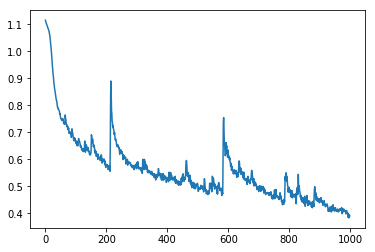

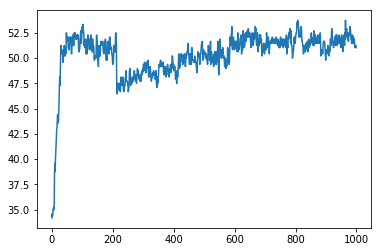

In [22]:
plt.plot(epoch_losses)
plt.show()
plt.plot(epoch_accuracies)
plt.show()

In [23]:
max(epoch_accuracies)

53.75

## Save model 

In [24]:
torch.save(model.state_dict(), "passive_force_model.pt")

## Load model and evaluate

In [25]:
model = ComplexRNNModel(input_dim, first_hidden_dim, second_hidden_dim, output_dim)
model.load_state_dict(torch.load("passive_force_model.pt"))
model.eval()
model = model.cuda()

In [26]:
accuracy, predicted = evaluate(model, val_loader, return_predicted=True)

In [27]:
print(accuracy)

51.041666666666664


In [28]:
predicted = [pred.cpu() for pred in predicted]
Y_val = np.concatenate([y.cpu().numpy() for x, y in val_loader])

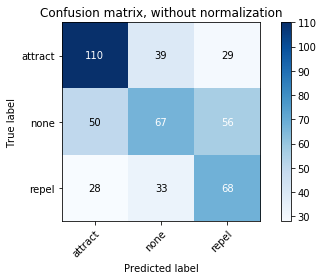

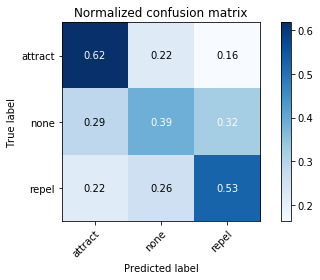

In [29]:
plot_confusion_matrix(Y_val, predicted, classes=FORCE_CLASS_COLS, normalize=False)
plot_confusion_matrix(Y_val, predicted, classes=FORCE_CLASS_COLS, normalize=True)